In [2]:
import GI_parser as GIP
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import NullFormatter
import glob
import time
import pandas as pd

In [3]:
path = "/mnt/e/Google_Drive_Backup_E/Data/Beamline_Data/Wire_2hr_Run/csv files/"

In [4]:
# file1 ="E:/Google_Drive_Backup_E/Data/Beamline_Data/Beamline_Cycles-2hr_W0028_H07-210806-121346-4.csv"
file1 = "/mnt/e/Google_Drive_Backup_E/Data/Beamline_Data/Wire_2hr_Run/csv files/Beamline_Cycles-2hr_W0028_H07-210806-140732-0.csv"
# file1 = "/home/andrei/Data/TPX3/CHIP0/Test/Beamline_Cycles-2hr_W0028_H07-210806-121346-4.csv"

print (file1, time.ctime())

data1 = pd.read_csv(file1) 
print(pd.read_csv(file1, nrows=5))
print(time.ctime())

# print(time.ctime())
# data1 = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
# print(data1.head(5))
# print(time.ctime())

/mnt/e/Google_Drive_Backup_E/Data/Beamline_Data/Wire_2hr_Run/csv files/Beamline_Cycles-2hr_W0028_H07-210806-140732-0.csv Tue Oct  5 10:56:31 2021
   #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
0   176   144  158990821888         50              50         NaN
1   176   144  161678586880         50              50         NaN
2   176   144  162722835968         50              50         NaN
3   176   144  163322622976         50              50         NaN
4   176   144  166230584064         25              25         NaN
Tue Oct  5 10:57:23 2021


In [5]:
data1.shape

(62500000, 6)

In [6]:
file = file1[:-4]
print(file)

/mnt/e/Google_Drive_Backup_E/Data/Beamline_Data/Wire_2hr_Run/csv files/Beamline_Cycles-2hr_W0028_H07-210806-140732-0


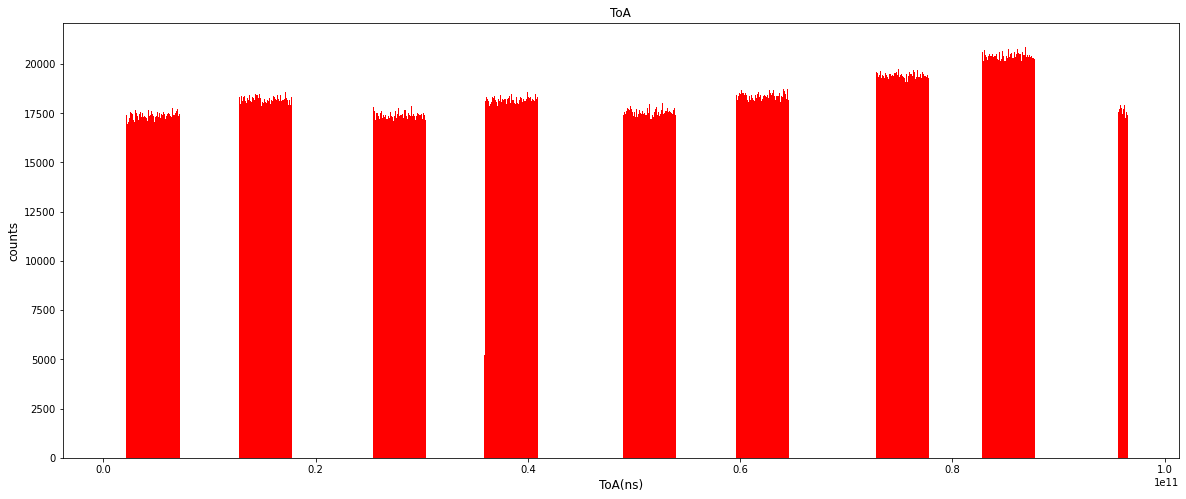

In [7]:
fig, ax1 = plt.subplots(ncols=1, figsize=(20, 8), facecolor='w')

nbins = int((data1['#ToA'].shape[0])**(1/2))

n, bins, pathces = plt.hist(data1['#ToA']/4096.*25., bins= nbins, color = 'r')
# ,range=(72.795e9,72.805e9))
#,range=(6e11,9e11)
plt.title("ToA", fontsize = 12) # change the title
plt.xlabel('ToA(ns)',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
# plt.hist(Pt1_df['#ToT[arb]'], bins= nbins, range = [0, 20000], lw=3, histtype='step', label = 'file 2', color = 'red')

# plt.xlabel('ToT, ns')
# plt.legend()
plt.show()
fig.tight_layout()
# fig.savefig(file+'_ToA.png', bbox_inches='tight')

In [8]:
diff = []

for i in range(1, len(n)):
    diff.append(n[i]-n[i-1])
    


In [9]:
diff_copy = diff.copy()

In [10]:
diff_copy.sort()
rising_edge_derivatives = diff_copy[-9:]
falling_edge_derivatives = diff_copy[:8]

rising_edge_derivatives, falling_edge_derivatives

([9112.0,
  11242.0,
  11462.0,
  11931.0,
  12950.0,
  13208.0,
  13540.0,
  13945.0,
  16596.0],
 [-19493.0,
  -17478.0,
  -16538.0,
  -15558.0,
  -12293.0,
  -11743.0,
  -11367.0,
  -9837.0])

In [11]:
rising_edge_indexes = []
falling_edge_indexes = []

for i in range(len(diff)):
    for el in rising_edge_derivatives:
        if diff[i] == el:
            rising_edge_indexes.append(i)
    for el in falling_edge_derivatives:
        if diff[i] == el:
            falling_edge_indexes.append(i)
            
rising_edge_indexes, falling_edge_indexes

([98, 977, 2020, 2890, 3969, 4848, 5940, 6765, 7828],
 [514, 1393, 2436, 3305, 4384, 5264, 6355, 7181])

In [12]:
rising_edge_bins = []
falling_edge_bins = []

for i in range(len(diff)):
    for el in rising_edge_indexes:
        if el == i:
            rising_edge_bins.append(n[i+1])
    for el in falling_edge_indexes:
        if el == i:
            falling_edge_bins.append(n[i])
            
rising_edge_bins, falling_edge_bins

([17081.0,
  18492.0,
  11933.0,
  18164.0,
  17664.0,
  13219.0,
  19121.0,
  13548.0,
  17691.0],
 [9841.0, 12294.0, 16541.0, 17995.0, 17255.0, 17483.0, 19430.0, 20440.0])

In [13]:
rising_edge_bin_edges = []
falling_edge_bin_edges = []

for el in rising_edge_indexes:
    rising_edge_bin_edges.append(bins[el+1])
    
for el in falling_edge_indexes:
    falling_edge_bin_edges.append(bins[el+1])
    
rising_edge_bin_edges, falling_edge_bin_edges

([2167450338.1439753,
  12795780039.600332,
  25407097307.653778,
  35926604520.69932,
  48973211742.39603,
  59601541443.85239,
  72805336704.36472,
  82780731475.35619,
  95633876495.43367],
 [7197467580.243912,
  17825797281.700268,
  30437114549.753716,
  40944530375.19805,
  53991137596.89477,
  64631558685.952324,
  77823262558.86345,
  87810748717.45612])

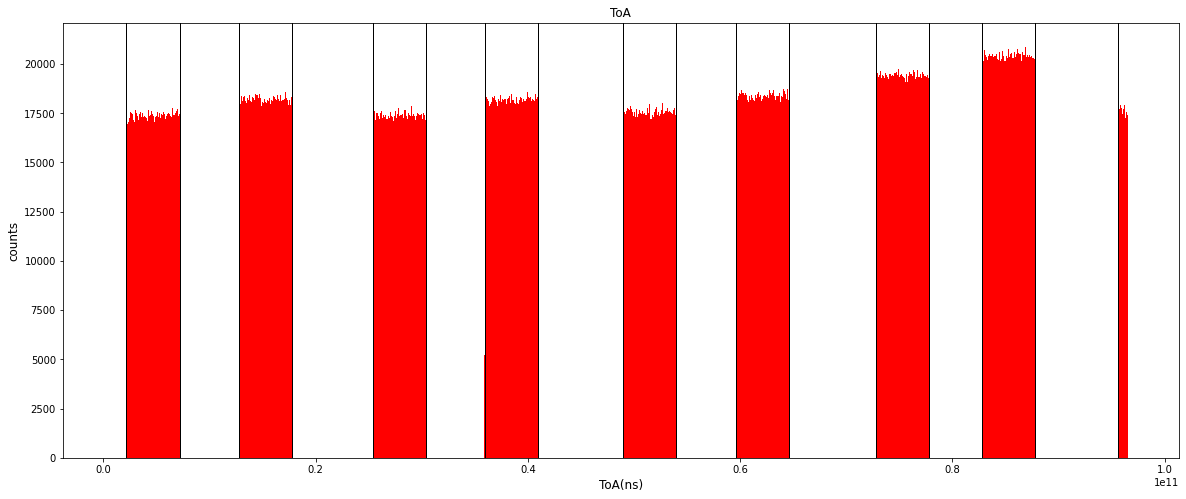

In [15]:
fig, ax1 = plt.subplots(ncols=1, figsize=(20, 8), facecolor='w')

nbins = int((data1['#ToA'].shape[0])**(1/2))

plt.hist(data1['#ToA']/4096.*25., bins= nbins, color = 'r')
# ,range=(72.795e9,72.805e9)),range=(59.5e9,59.7e9),range=(40.8e9,41e9),range=(40.9445e9,40.945e9)
#,range=(6e11,9e11)
plt.title("ToA", fontsize = 12) # change the title
plt.xlabel('ToA(ns)',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
# plt.hist(Pt1_df['#ToT[arb]'], bins= nbins, range = [0, 20000], lw=3, histtype='step', label = 'file 2', color = 'red')
for el in rising_edge_bin_edges:      
    plt.axvline(el, color='k', linewidth=1)
for el in falling_edge_bin_edges:      
    plt.axvline(el, color='k', linewidth=1)
# plt.xlabel('ToT, ns')
# plt.legend()
plt.show()
fig.tight_layout()
# fig.savefig(file+'_ToA.png', bbox_inches='tight')

In [16]:
pulses_zip = zip(rising_edge_bin_edges, falling_edge_bin_edges)
pulses = list(pulses_zip)
pulses

[(2167450338.1439753, 7197467580.243912),
 (12795780039.600332, 17825797281.700268),
 (25407097307.653778, 30437114549.753716),
 (35926604520.69932, 40944530375.19805),
 (48973211742.39603, 53991137596.89477),
 (59601541443.85239, 64631558685.952324),
 (72805336704.36472, 77823262558.86345),
 (82780731475.35619, 87810748717.45612)]

In [17]:
def toa_section(data, toa_min, toa_max):
    return data[(data['#ToA'] > toa_min*4096./25.) & (data['#ToA'] < toa_max*4096./25.)]

In [124]:
last_pulse_df = toa_section(data1, max(rising_edge_bin_edges), data1['#ToA'].max()/4096.*25.)

In [126]:
data2 = pd.concat([last_pulse_df, pd.read_csv(file1)], ignore_index=True)
data2.head(5)

,#Col,#Row,#ToA,#ToT[arb],#ToTtotal[arb],Unnamed: 5
0,206,38,15668654446336,325,325,NaN
1,193,254,15668654448384,425,425,NaN
2,46,43,15668654545920,375,375,NaN
3,134,152,15668654549248,275,275,NaN
4,134,151,15668654559232,50,50,NaN


In [127]:
last_pulse_df.to_csv(path+"last_pulse_df.csv")

In [78]:
for pulse in range(0,len(pulses)-1,2):
    globals()['obj_data_pulse'+str(pulse)] = toa_section(data1, pulses[pulse][0], pulses[pulse][1])
    globals()['no_obj_data_pulse'+str(pulse+1)] = toa_section(data1, pulses[pulse+1][0], pulses[pulse+1][1])

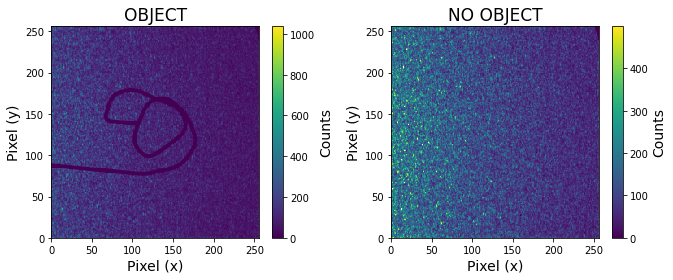

In [113]:
#File 1 grid
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')

z = ax0.hist2d(globals()['obj_data_pulse'+str(0)]['#Row'], globals()['obj_data_pulse'+str(0)]['#Col'], bins = 256, range = [(0, 256), (0, 256)])
cbar1 = fig.colorbar(z[3], ax = ax0)
cbar1.set_label('Counts', fontsize=14)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)
ax0.set_title('OBJECT', fontsize=17)

z = ax1.hist2d(globals()['no_obj_data_pulse'+str(0+1)]['#Row'], globals()['no_obj_data_pulse'+str(0+1)]['#Col'], bins = 256, range = [(0, 256), (0, 256)], cmax=500)
cbar2 = fig.colorbar(z[3], ax = ax1)
cbar2.set_label('Counts', fontsize=14)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)
ax1.set_title('NO OBJECT', fontsize=17)

fig.tight_layout()
fig.savefig(file+'_256x256_pair1.png', bbox_inches='tight')
plt.show()

In [90]:
for pulse in range(0,len(pulses)-1,2):
            obj_data = globals()['obj_data_pulse'+str(pulse)]
            no_obj_data = globals()['no_obj_data_pulse'+str(pulse+1)]
            obj_length = obj_data['#Col'].shape[0]
            no_obj_length = no_obj_data['#Col'].shape[0]
            print('','obj pulse #:', pulse, 'obj length:',obj_length,'\n', 'obj pulse #:', pulse+1, 'no_obj length:',no_obj_length)

            globals()['img_obj'+str(pulse)] = np.zeros([256,256])
            globals()['img_no_obj'+str(pulse+1)] = np.zeros([256,256])

            x_obj = obj_data['#Row'].to_numpy()
            y_obj = obj_data['#Col'].to_numpy()
            tot_obj = obj_data['#ToT[arb]'].to_numpy()

            for k in range(obj_length):
                i = x_obj[k]
                j = y_obj[k]
                globals()['img_obj'+str(pulse)][i][j] = globals()['img_obj'+str(pulse)][i][j] + tot_obj[k]


            x_no_obj = no_obj_data['#Row'].to_numpy()
            y_no_obj = no_obj_data['#Col'].to_numpy()
            tot_no_obj = no_obj_data['#ToT[arb]'].to_numpy()

            for k in range(no_obj_length):
                i = x_no_obj[k]
                j = y_no_obj[k]
                globals()['img_no_obj'+str(pulse+1)][i][j] = globals()['img_no_obj'+str(pulse+1)][i][j] + tot_no_obj[k]  

            globals()['obj_data_sum'+str(pulse)] = np.sum(globals()['img_obj'+str(pulse)])
            globals()['no_obj_data_sum'+str(pulse+1)] =np.sum(globals()['img_no_obj'+str(pulse+1)])

 obj pulse #: 0 obj length: 7229582 
 obj pulse #: 1 no_obj length: 7565041
 obj pulse #: 2 obj length: 7236935 
 obj pulse #: 3 no_obj length: 7557335
 obj pulse #: 4 obj length: 7290813 
 obj pulse #: 5 no_obj length: 7647563
 obj pulse #: 6 obj length: 8073192 
 obj pulse #: 7 no_obj length: 8494154


In [100]:
import math

In [101]:
def mean2(x):
    y = np.sum(x) / np.size(x);
    return y

def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / math.sqrt((a*a).sum() * (b*b).sum());
    return r

In [109]:
for pulse in range(0,len(pulses)-1,2):
    print('Corr for pulse pair','[',pulse,',',pulse+1,']',':',corr2(globals()['img_obj'+str(pulse)],globals()['img_no_obj'+str(pulse+1)]))

Corr for pulse pair [ 0 , 1 ] : 0.8940814263087531
Corr for pulse pair [ 2 , 3 ] : 0.8989700672206703
Corr for pulse pair [ 4 , 5 ] : 0.8955084012546966
Corr for pulse pair [ 6 , 7 ] : 0.8978206421638678


[i,j]: [ 0 , 0 ]
[i,j]: [ 0 , 1 ]
[i,j]: [ 0 , 2 ]
[i,j]: [ 0 , 3 ]
[i,j]: [ 0 , 4 ]
[i,j]: [ 0 , 5 ]
[i,j]: [ 0 , 6 ]
[i,j]: [ 0 , 7 ]
[i,j]: [ 0 , 8 ]
[i,j]: [ 0 , 9 ]
[i,j]: [ 0 , 10 ]
[i,j]: [ 0 , 11 ]
[i,j]: [ 0 , 12 ]
[i,j]: [ 0 , 13 ]
[i,j]: [ 0 , 14 ]
[i,j]: [ 0 , 15 ]
[i,j]: [ 0 , 16 ]
[i,j]: [ 0 , 17 ]
[i,j]: [ 0 , 18 ]
[i,j]: [ 0 , 19 ]
[i,j]: [ 0 , 20 ]
[i,j]: [ 0 , 21 ]
[i,j]: [ 0 , 22 ]
[i,j]: [ 0 , 23 ]
[i,j]: [ 0 , 24 ]
[i,j]: [ 0 , 25 ]
[i,j]: [ 0 , 26 ]
[i,j]: [ 0 , 27 ]
[i,j]: [ 0 , 28 ]
[i,j]: [ 0 , 29 ]
[i,j]: [ 0 , 30 ]
[i,j]: [ 0 , 31 ]
[i,j]: [ 0 , 32 ]
[i,j]: [ 0 , 33 ]
[i,j]: [ 0 , 34 ]
[i,j]: [ 0 , 35 ]
[i,j]: [ 0 , 36 ]
[i,j]: [ 0 , 37 ]
[i,j]: [ 0 , 38 ]
[i,j]: [ 0 , 39 ]
[i,j]: [ 0 , 40 ]
[i,j]: [ 0 , 41 ]
[i,j]: [ 0 , 42 ]
[i,j]: [ 0 , 43 ]
[i,j]: [ 0 , 44 ]
[i,j]: [ 0 , 45 ]
[i,j]: [ 0 , 46 ]
[i,j]: [ 0 , 47 ]
[i,j]: [ 0 , 48 ]
[i,j]: [ 0 , 49 ]
[i,j]: [ 0 , 50 ]
[i,j]: [ 0 , 51 ]
[i,j]: [ 0 , 52 ]
[i,j]: [ 0 , 53 ]
[i,j]: [ 0 , 54 ]
[i,j]: [ 0 , 55 ]
[i

[i,j]: [ 2 , 44 ]
[i,j]: [ 2 , 45 ]
[i,j]: [ 2 , 46 ]
[i,j]: [ 2 , 47 ]
[i,j]: [ 2 , 48 ]
[i,j]: [ 2 , 49 ]
[i,j]: [ 2 , 50 ]
[i,j]: [ 2 , 51 ]
[i,j]: [ 2 , 52 ]
[i,j]: [ 2 , 53 ]
[i,j]: [ 2 , 54 ]
[i,j]: [ 2 , 55 ]
[i,j]: [ 2 , 56 ]
[i,j]: [ 2 , 57 ]
[i,j]: [ 2 , 58 ]
[i,j]: [ 2 , 59 ]
[i,j]: [ 2 , 60 ]
[i,j]: [ 2 , 61 ]
[i,j]: [ 2 , 62 ]
[i,j]: [ 2 , 63 ]
[i,j]: [ 2 , 64 ]
[i,j]: [ 2 , 65 ]
[i,j]: [ 2 , 66 ]
[i,j]: [ 2 , 67 ]
[i,j]: [ 2 , 68 ]
[i,j]: [ 2 , 69 ]
[i,j]: [ 2 , 70 ]
[i,j]: [ 2 , 71 ]
[i,j]: [ 2 , 72 ]
[i,j]: [ 2 , 73 ]
[i,j]: [ 2 , 74 ]
[i,j]: [ 2 , 75 ]
[i,j]: [ 2 , 76 ]
[i,j]: [ 2 , 77 ]
[i,j]: [ 2 , 78 ]
[i,j]: [ 2 , 79 ]
[i,j]: [ 2 , 80 ]
[i,j]: [ 2 , 81 ]
[i,j]: [ 2 , 82 ]
[i,j]: [ 2 , 83 ]
[i,j]: [ 2 , 84 ]
[i,j]: [ 2 , 85 ]
[i,j]: [ 2 , 86 ]
[i,j]: [ 2 , 87 ]
[i,j]: [ 2 , 88 ]
[i,j]: [ 2 , 89 ]
[i,j]: [ 2 , 90 ]
[i,j]: [ 2 , 91 ]
[i,j]: [ 2 , 92 ]
[i,j]: [ 2 , 93 ]
[i,j]: [ 2 , 94 ]
[i,j]: [ 2 , 95 ]
[i,j]: [ 2 , 96 ]
[i,j]: [ 2 , 97 ]
[i,j]: [ 2 , 98 ]
[i,j]: [ 2

[i,j]: [ 4 , 10 ]
[i,j]: [ 4 , 11 ]
[i,j]: [ 4 , 12 ]
[i,j]: [ 4 , 13 ]
[i,j]: [ 4 , 14 ]
[i,j]: [ 4 , 15 ]
[i,j]: [ 4 , 16 ]
[i,j]: [ 4 , 17 ]
[i,j]: [ 4 , 18 ]
[i,j]: [ 4 , 19 ]
[i,j]: [ 4 , 20 ]
[i,j]: [ 4 , 21 ]
[i,j]: [ 4 , 22 ]
[i,j]: [ 4 , 23 ]
[i,j]: [ 4 , 24 ]
[i,j]: [ 4 , 25 ]
[i,j]: [ 4 , 26 ]
[i,j]: [ 4 , 27 ]
[i,j]: [ 4 , 28 ]
[i,j]: [ 4 , 29 ]
[i,j]: [ 4 , 30 ]
[i,j]: [ 4 , 31 ]
[i,j]: [ 4 , 32 ]
[i,j]: [ 4 , 33 ]
[i,j]: [ 4 , 34 ]
[i,j]: [ 4 , 35 ]
[i,j]: [ 4 , 36 ]
[i,j]: [ 4 , 37 ]
[i,j]: [ 4 , 38 ]
[i,j]: [ 4 , 39 ]
[i,j]: [ 4 , 40 ]
[i,j]: [ 4 , 41 ]
[i,j]: [ 4 , 42 ]
[i,j]: [ 4 , 43 ]
[i,j]: [ 4 , 44 ]
[i,j]: [ 4 , 45 ]
[i,j]: [ 4 , 46 ]
[i,j]: [ 4 , 47 ]
[i,j]: [ 4 , 48 ]
[i,j]: [ 4 , 49 ]
[i,j]: [ 4 , 50 ]
[i,j]: [ 4 , 51 ]
[i,j]: [ 4 , 52 ]
[i,j]: [ 4 , 53 ]
[i,j]: [ 4 , 54 ]
[i,j]: [ 4 , 55 ]
[i,j]: [ 4 , 56 ]
[i,j]: [ 4 , 57 ]
[i,j]: [ 4 , 58 ]
[i,j]: [ 4 , 59 ]
[i,j]: [ 4 , 60 ]
[i,j]: [ 4 , 61 ]
[i,j]: [ 4 , 62 ]
[i,j]: [ 4 , 63 ]
[i,j]: [ 4 , 64 ]
[i,j]: [ 4

[i,j]: [ 6 , 23 ]
[i,j]: [ 6 , 24 ]
[i,j]: [ 6 , 25 ]
[i,j]: [ 6 , 26 ]
[i,j]: [ 6 , 27 ]
[i,j]: [ 6 , 28 ]
[i,j]: [ 6 , 29 ]
[i,j]: [ 6 , 30 ]
[i,j]: [ 6 , 31 ]
[i,j]: [ 6 , 32 ]
[i,j]: [ 6 , 33 ]
[i,j]: [ 6 , 34 ]
[i,j]: [ 6 , 35 ]
[i,j]: [ 6 , 36 ]
[i,j]: [ 6 , 37 ]
[i,j]: [ 6 , 38 ]
[i,j]: [ 6 , 39 ]
[i,j]: [ 6 , 40 ]
[i,j]: [ 6 , 41 ]
[i,j]: [ 6 , 42 ]
[i,j]: [ 6 , 43 ]
[i,j]: [ 6 , 44 ]
[i,j]: [ 6 , 45 ]
[i,j]: [ 6 , 46 ]
[i,j]: [ 6 , 47 ]
[i,j]: [ 6 , 48 ]
[i,j]: [ 6 , 49 ]
[i,j]: [ 6 , 50 ]
[i,j]: [ 6 , 51 ]
[i,j]: [ 6 , 52 ]
[i,j]: [ 6 , 53 ]
[i,j]: [ 6 , 54 ]
[i,j]: [ 6 , 55 ]
[i,j]: [ 6 , 56 ]
[i,j]: [ 6 , 57 ]
[i,j]: [ 6 , 58 ]
[i,j]: [ 6 , 59 ]
[i,j]: [ 6 , 60 ]
[i,j]: [ 6 , 61 ]
[i,j]: [ 6 , 62 ]
[i,j]: [ 6 , 63 ]
[i,j]: [ 6 , 64 ]
[i,j]: [ 6 , 65 ]
[i,j]: [ 6 , 66 ]
[i,j]: [ 6 , 67 ]
[i,j]: [ 6 , 68 ]
[i,j]: [ 6 , 69 ]
[i,j]: [ 6 , 70 ]
[i,j]: [ 6 , 71 ]
[i,j]: [ 6 , 72 ]
[i,j]: [ 6 , 73 ]
[i,j]: [ 6 , 74 ]
[i,j]: [ 6 , 75 ]
[i,j]: [ 6 , 76 ]
[i,j]: [ 6 , 77 ]
[i,j]: [ 6

[i,j]: [ 8 , 36 ]
[i,j]: [ 8 , 37 ]
[i,j]: [ 8 , 38 ]
[i,j]: [ 8 , 39 ]
[i,j]: [ 8 , 40 ]
[i,j]: [ 8 , 41 ]
[i,j]: [ 8 , 42 ]
[i,j]: [ 8 , 43 ]
[i,j]: [ 8 , 44 ]
[i,j]: [ 8 , 45 ]
[i,j]: [ 8 , 46 ]
[i,j]: [ 8 , 47 ]
[i,j]: [ 8 , 48 ]
[i,j]: [ 8 , 49 ]
[i,j]: [ 8 , 50 ]
[i,j]: [ 8 , 51 ]
[i,j]: [ 8 , 52 ]
[i,j]: [ 8 , 53 ]
[i,j]: [ 8 , 54 ]
[i,j]: [ 8 , 55 ]
[i,j]: [ 8 , 56 ]
[i,j]: [ 8 , 57 ]
[i,j]: [ 8 , 58 ]
[i,j]: [ 8 , 59 ]
[i,j]: [ 8 , 60 ]
[i,j]: [ 8 , 61 ]
[i,j]: [ 8 , 62 ]
[i,j]: [ 8 , 63 ]
[i,j]: [ 8 , 64 ]
[i,j]: [ 8 , 65 ]
[i,j]: [ 8 , 66 ]
[i,j]: [ 8 , 67 ]
[i,j]: [ 8 , 68 ]
[i,j]: [ 8 , 69 ]
[i,j]: [ 8 , 70 ]
[i,j]: [ 8 , 71 ]
[i,j]: [ 8 , 72 ]
[i,j]: [ 8 , 73 ]
[i,j]: [ 8 , 74 ]
[i,j]: [ 8 , 75 ]
[i,j]: [ 8 , 76 ]
[i,j]: [ 8 , 77 ]
[i,j]: [ 8 , 78 ]
[i,j]: [ 8 , 79 ]
[i,j]: [ 8 , 80 ]
[i,j]: [ 8 , 81 ]
[i,j]: [ 8 , 82 ]
[i,j]: [ 8 , 83 ]
[i,j]: [ 8 , 84 ]
[i,j]: [ 8 , 85 ]
[i,j]: [ 8 , 86 ]
[i,j]: [ 8 , 87 ]
[i,j]: [ 8 , 88 ]
[i,j]: [ 8 , 89 ]
[i,j]: [ 8 , 90 ]
[i,j]: [ 8

[i,j]: [ 10 , 29 ]
[i,j]: [ 10 , 30 ]
[i,j]: [ 10 , 31 ]
[i,j]: [ 10 , 32 ]
[i,j]: [ 10 , 33 ]
[i,j]: [ 10 , 34 ]
[i,j]: [ 10 , 35 ]
[i,j]: [ 10 , 36 ]
[i,j]: [ 10 , 37 ]
[i,j]: [ 10 , 38 ]
[i,j]: [ 10 , 39 ]
[i,j]: [ 10 , 40 ]
[i,j]: [ 10 , 41 ]
[i,j]: [ 10 , 42 ]
[i,j]: [ 10 , 43 ]
[i,j]: [ 10 , 44 ]
[i,j]: [ 10 , 45 ]
[i,j]: [ 10 , 46 ]
[i,j]: [ 10 , 47 ]
[i,j]: [ 10 , 48 ]
[i,j]: [ 10 , 49 ]
[i,j]: [ 10 , 50 ]
[i,j]: [ 10 , 51 ]
[i,j]: [ 10 , 52 ]
[i,j]: [ 10 , 53 ]
[i,j]: [ 10 , 54 ]
[i,j]: [ 10 , 55 ]
[i,j]: [ 10 , 56 ]
[i,j]: [ 10 , 57 ]
[i,j]: [ 10 , 58 ]
[i,j]: [ 10 , 59 ]
[i,j]: [ 10 , 60 ]
[i,j]: [ 10 , 61 ]
[i,j]: [ 10 , 62 ]
[i,j]: [ 10 , 63 ]
[i,j]: [ 10 , 64 ]
[i,j]: [ 10 , 65 ]
[i,j]: [ 10 , 66 ]
[i,j]: [ 10 , 67 ]
[i,j]: [ 10 , 68 ]
[i,j]: [ 10 , 69 ]
[i,j]: [ 10 , 70 ]
[i,j]: [ 10 , 71 ]
[i,j]: [ 10 , 72 ]
[i,j]: [ 10 , 73 ]
[i,j]: [ 10 , 74 ]
[i,j]: [ 10 , 75 ]
[i,j]: [ 10 , 76 ]
[i,j]: [ 10 , 77 ]
[i,j]: [ 10 , 78 ]
[i,j]: [ 10 , 79 ]
[i,j]: [ 10 , 80 ]
[i,j]: [ 10 

[i,j]: [ 11 , 247 ]
[i,j]: [ 11 , 248 ]
[i,j]: [ 11 , 249 ]
[i,j]: [ 11 , 250 ]
[i,j]: [ 11 , 251 ]
[i,j]: [ 11 , 252 ]
[i,j]: [ 11 , 253 ]
[i,j]: [ 11 , 254 ]
[i,j]: [ 11 , 255 ]
[i,j]: [ 12 , 0 ]
[i,j]: [ 12 , 1 ]
[i,j]: [ 12 , 2 ]
[i,j]: [ 12 , 3 ]
[i,j]: [ 12 , 4 ]
[i,j]: [ 12 , 5 ]
[i,j]: [ 12 , 6 ]
[i,j]: [ 12 , 7 ]
[i,j]: [ 12 , 8 ]
[i,j]: [ 12 , 9 ]
[i,j]: [ 12 , 10 ]
[i,j]: [ 12 , 11 ]
[i,j]: [ 12 , 12 ]
[i,j]: [ 12 , 13 ]
[i,j]: [ 12 , 14 ]
[i,j]: [ 12 , 15 ]
[i,j]: [ 12 , 16 ]
[i,j]: [ 12 , 17 ]
[i,j]: [ 12 , 18 ]
[i,j]: [ 12 , 19 ]
[i,j]: [ 12 , 20 ]
[i,j]: [ 12 , 21 ]
[i,j]: [ 12 , 22 ]
[i,j]: [ 12 , 23 ]
[i,j]: [ 12 , 24 ]
[i,j]: [ 12 , 25 ]
[i,j]: [ 12 , 26 ]
[i,j]: [ 12 , 27 ]
[i,j]: [ 12 , 28 ]
[i,j]: [ 12 , 29 ]
[i,j]: [ 12 , 30 ]
[i,j]: [ 12 , 31 ]
[i,j]: [ 12 , 32 ]
[i,j]: [ 12 , 33 ]
[i,j]: [ 12 , 34 ]
[i,j]: [ 12 , 35 ]
[i,j]: [ 12 , 36 ]
[i,j]: [ 12 , 37 ]
[i,j]: [ 12 , 38 ]
[i,j]: [ 12 , 39 ]
[i,j]: [ 12 , 40 ]
[i,j]: [ 12 , 41 ]
[i,j]: [ 12 , 42 ]
[i,j]: [ 12 ,

[i,j]: [ 13 , 238 ]
[i,j]: [ 13 , 239 ]
[i,j]: [ 13 , 240 ]
[i,j]: [ 13 , 241 ]
[i,j]: [ 13 , 242 ]
[i,j]: [ 13 , 243 ]
[i,j]: [ 13 , 244 ]
[i,j]: [ 13 , 245 ]
[i,j]: [ 13 , 246 ]
[i,j]: [ 13 , 247 ]
[i,j]: [ 13 , 248 ]
[i,j]: [ 13 , 249 ]
[i,j]: [ 13 , 250 ]
[i,j]: [ 13 , 251 ]
[i,j]: [ 13 , 252 ]
[i,j]: [ 13 , 253 ]
[i,j]: [ 13 , 254 ]
[i,j]: [ 13 , 255 ]
[i,j]: [ 14 , 0 ]
[i,j]: [ 14 , 1 ]
[i,j]: [ 14 , 2 ]
[i,j]: [ 14 , 3 ]
[i,j]: [ 14 , 4 ]
[i,j]: [ 14 , 5 ]
[i,j]: [ 14 , 6 ]
[i,j]: [ 14 , 7 ]
[i,j]: [ 14 , 8 ]
[i,j]: [ 14 , 9 ]
[i,j]: [ 14 , 10 ]
[i,j]: [ 14 , 11 ]
[i,j]: [ 14 , 12 ]
[i,j]: [ 14 , 13 ]
[i,j]: [ 14 , 14 ]
[i,j]: [ 14 , 15 ]
[i,j]: [ 14 , 16 ]
[i,j]: [ 14 , 17 ]
[i,j]: [ 14 , 18 ]
[i,j]: [ 14 , 19 ]
[i,j]: [ 14 , 20 ]
[i,j]: [ 14 , 21 ]
[i,j]: [ 14 , 22 ]
[i,j]: [ 14 , 23 ]
[i,j]: [ 14 , 24 ]
[i,j]: [ 14 , 25 ]
[i,j]: [ 14 , 26 ]
[i,j]: [ 14 , 27 ]
[i,j]: [ 14 , 28 ]
[i,j]: [ 14 , 29 ]
[i,j]: [ 14 , 30 ]
[i,j]: [ 14 , 31 ]
[i,j]: [ 14 , 32 ]
[i,j]: [ 14 , 33 ]
[i,j

[i,j]: [ 15 , 226 ]
[i,j]: [ 15 , 227 ]
[i,j]: [ 15 , 228 ]
[i,j]: [ 15 , 229 ]
[i,j]: [ 15 , 230 ]
[i,j]: [ 15 , 231 ]
[i,j]: [ 15 , 232 ]
[i,j]: [ 15 , 233 ]
[i,j]: [ 15 , 234 ]
[i,j]: [ 15 , 235 ]
[i,j]: [ 15 , 236 ]
[i,j]: [ 15 , 237 ]
[i,j]: [ 15 , 238 ]
[i,j]: [ 15 , 239 ]
[i,j]: [ 15 , 240 ]
[i,j]: [ 15 , 241 ]
[i,j]: [ 15 , 242 ]
[i,j]: [ 15 , 243 ]
[i,j]: [ 15 , 244 ]
[i,j]: [ 15 , 245 ]
[i,j]: [ 15 , 246 ]
[i,j]: [ 15 , 247 ]
[i,j]: [ 15 , 248 ]
[i,j]: [ 15 , 249 ]
[i,j]: [ 15 , 250 ]
[i,j]: [ 15 , 251 ]
[i,j]: [ 15 , 252 ]
[i,j]: [ 15 , 253 ]
[i,j]: [ 15 , 254 ]
[i,j]: [ 15 , 255 ]
[i,j]: [ 16 , 0 ]
[i,j]: [ 16 , 1 ]
[i,j]: [ 16 , 2 ]
[i,j]: [ 16 , 3 ]
[i,j]: [ 16 , 4 ]
[i,j]: [ 16 , 5 ]
[i,j]: [ 16 , 6 ]
[i,j]: [ 16 , 7 ]
[i,j]: [ 16 , 8 ]
[i,j]: [ 16 , 9 ]
[i,j]: [ 16 , 10 ]
[i,j]: [ 16 , 11 ]
[i,j]: [ 16 , 12 ]
[i,j]: [ 16 , 13 ]
[i,j]: [ 16 , 14 ]
[i,j]: [ 16 , 15 ]
[i,j]: [ 16 , 16 ]
[i,j]: [ 16 , 17 ]
[i,j]: [ 16 , 18 ]
[i,j]: [ 16 , 19 ]
[i,j]: [ 16 , 20 ]
[i,j]: [ 16

[i,j]: [ 17 , 152 ]
[i,j]: [ 17 , 153 ]
[i,j]: [ 17 , 154 ]
[i,j]: [ 17 , 155 ]
[i,j]: [ 17 , 156 ]
[i,j]: [ 17 , 157 ]
[i,j]: [ 17 , 158 ]
[i,j]: [ 17 , 159 ]
[i,j]: [ 17 , 160 ]
[i,j]: [ 17 , 161 ]
[i,j]: [ 17 , 162 ]
[i,j]: [ 17 , 163 ]
[i,j]: [ 17 , 164 ]
[i,j]: [ 17 , 165 ]
[i,j]: [ 17 , 166 ]
[i,j]: [ 17 , 167 ]
[i,j]: [ 17 , 168 ]
[i,j]: [ 17 , 169 ]
[i,j]: [ 17 , 170 ]
[i,j]: [ 17 , 171 ]
[i,j]: [ 17 , 172 ]
[i,j]: [ 17 , 173 ]
[i,j]: [ 17 , 174 ]
[i,j]: [ 17 , 175 ]
[i,j]: [ 17 , 176 ]
[i,j]: [ 17 , 177 ]
[i,j]: [ 17 , 178 ]
[i,j]: [ 17 , 179 ]
[i,j]: [ 17 , 180 ]
[i,j]: [ 17 , 181 ]
[i,j]: [ 17 , 182 ]
[i,j]: [ 17 , 183 ]
[i,j]: [ 17 , 184 ]
[i,j]: [ 17 , 185 ]
[i,j]: [ 17 , 186 ]
[i,j]: [ 17 , 187 ]
[i,j]: [ 17 , 188 ]
[i,j]: [ 17 , 189 ]
[i,j]: [ 17 , 190 ]
[i,j]: [ 17 , 191 ]
[i,j]: [ 17 , 192 ]
[i,j]: [ 17 , 193 ]
[i,j]: [ 17 , 194 ]
[i,j]: [ 17 , 195 ]
[i,j]: [ 17 , 196 ]
[i,j]: [ 17 , 197 ]
[i,j]: [ 17 , 198 ]
[i,j]: [ 17 , 199 ]
[i,j]: [ 17 , 200 ]
[i,j]: [ 17 , 201 ]


[i,j]: [ 19 , 97 ]
[i,j]: [ 19 , 98 ]
[i,j]: [ 19 , 99 ]
[i,j]: [ 19 , 100 ]
[i,j]: [ 19 , 101 ]
[i,j]: [ 19 , 102 ]
[i,j]: [ 19 , 103 ]
[i,j]: [ 19 , 104 ]
[i,j]: [ 19 , 105 ]
[i,j]: [ 19 , 106 ]
[i,j]: [ 19 , 107 ]
[i,j]: [ 19 , 108 ]
[i,j]: [ 19 , 109 ]
[i,j]: [ 19 , 110 ]
[i,j]: [ 19 , 111 ]
[i,j]: [ 19 , 112 ]
[i,j]: [ 19 , 113 ]
[i,j]: [ 19 , 114 ]
[i,j]: [ 19 , 115 ]
[i,j]: [ 19 , 116 ]
[i,j]: [ 19 , 117 ]
[i,j]: [ 19 , 118 ]
[i,j]: [ 19 , 119 ]
[i,j]: [ 19 , 120 ]
[i,j]: [ 19 , 121 ]
[i,j]: [ 19 , 122 ]
[i,j]: [ 19 , 123 ]
[i,j]: [ 19 , 124 ]
[i,j]: [ 19 , 125 ]
[i,j]: [ 19 , 126 ]
[i,j]: [ 19 , 127 ]
[i,j]: [ 19 , 128 ]
[i,j]: [ 19 , 129 ]
[i,j]: [ 19 , 130 ]
[i,j]: [ 19 , 131 ]
[i,j]: [ 19 , 132 ]
[i,j]: [ 19 , 133 ]
[i,j]: [ 19 , 134 ]
[i,j]: [ 19 , 135 ]
[i,j]: [ 19 , 136 ]
[i,j]: [ 19 , 137 ]
[i,j]: [ 19 , 138 ]
[i,j]: [ 19 , 139 ]
[i,j]: [ 19 , 140 ]
[i,j]: [ 19 , 141 ]
[i,j]: [ 19 , 142 ]
[i,j]: [ 19 , 143 ]
[i,j]: [ 19 , 144 ]
[i,j]: [ 19 , 145 ]
[i,j]: [ 19 , 146 ]
[i,

[i,j]: [ 21 , 94 ]
[i,j]: [ 21 , 95 ]
[i,j]: [ 21 , 96 ]
[i,j]: [ 21 , 97 ]
[i,j]: [ 21 , 98 ]
[i,j]: [ 21 , 99 ]
[i,j]: [ 21 , 100 ]
[i,j]: [ 21 , 101 ]
[i,j]: [ 21 , 102 ]
[i,j]: [ 21 , 103 ]
[i,j]: [ 21 , 104 ]
[i,j]: [ 21 , 105 ]
[i,j]: [ 21 , 106 ]
[i,j]: [ 21 , 107 ]
[i,j]: [ 21 , 108 ]
[i,j]: [ 21 , 109 ]
[i,j]: [ 21 , 110 ]
[i,j]: [ 21 , 111 ]
[i,j]: [ 21 , 112 ]
[i,j]: [ 21 , 113 ]
[i,j]: [ 21 , 114 ]
[i,j]: [ 21 , 115 ]
[i,j]: [ 21 , 116 ]
[i,j]: [ 21 , 117 ]
[i,j]: [ 21 , 118 ]
[i,j]: [ 21 , 119 ]
[i,j]: [ 21 , 120 ]
[i,j]: [ 21 , 121 ]
[i,j]: [ 21 , 122 ]
[i,j]: [ 21 , 123 ]
[i,j]: [ 21 , 124 ]
[i,j]: [ 21 , 125 ]
[i,j]: [ 21 , 126 ]
[i,j]: [ 21 , 127 ]
[i,j]: [ 21 , 128 ]
[i,j]: [ 21 , 129 ]
[i,j]: [ 21 , 130 ]
[i,j]: [ 21 , 131 ]
[i,j]: [ 21 , 132 ]
[i,j]: [ 21 , 133 ]
[i,j]: [ 21 , 134 ]
[i,j]: [ 21 , 135 ]
[i,j]: [ 21 , 136 ]
[i,j]: [ 21 , 137 ]
[i,j]: [ 21 , 138 ]
[i,j]: [ 21 , 139 ]
[i,j]: [ 21 , 140 ]
[i,j]: [ 21 , 141 ]
[i,j]: [ 21 , 142 ]
[i,j]: [ 21 , 143 ]
[i,j]:

[i,j]: [ 23 , 108 ]
[i,j]: [ 23 , 109 ]
[i,j]: [ 23 , 110 ]
[i,j]: [ 23 , 111 ]
[i,j]: [ 23 , 112 ]
[i,j]: [ 23 , 113 ]
[i,j]: [ 23 , 114 ]
[i,j]: [ 23 , 115 ]
[i,j]: [ 23 , 116 ]
[i,j]: [ 23 , 117 ]
[i,j]: [ 23 , 118 ]
[i,j]: [ 23 , 119 ]
[i,j]: [ 23 , 120 ]
[i,j]: [ 23 , 121 ]
[i,j]: [ 23 , 122 ]
[i,j]: [ 23 , 123 ]
[i,j]: [ 23 , 124 ]
[i,j]: [ 23 , 125 ]
[i,j]: [ 23 , 126 ]
[i,j]: [ 23 , 127 ]
[i,j]: [ 23 , 128 ]
[i,j]: [ 23 , 129 ]
[i,j]: [ 23 , 130 ]
[i,j]: [ 23 , 131 ]
[i,j]: [ 23 , 132 ]
[i,j]: [ 23 , 133 ]
[i,j]: [ 23 , 134 ]
[i,j]: [ 23 , 135 ]
[i,j]: [ 23 , 136 ]
[i,j]: [ 23 , 137 ]
[i,j]: [ 23 , 138 ]
[i,j]: [ 23 , 139 ]
[i,j]: [ 23 , 140 ]
[i,j]: [ 23 , 141 ]
[i,j]: [ 23 , 142 ]
[i,j]: [ 23 , 143 ]
[i,j]: [ 23 , 144 ]
[i,j]: [ 23 , 145 ]
[i,j]: [ 23 , 146 ]
[i,j]: [ 23 , 147 ]
[i,j]: [ 23 , 148 ]
[i,j]: [ 23 , 149 ]
[i,j]: [ 23 , 150 ]
[i,j]: [ 23 , 151 ]
[i,j]: [ 23 , 152 ]
[i,j]: [ 23 , 153 ]
[i,j]: [ 23 , 154 ]
[i,j]: [ 23 , 155 ]
[i,j]: [ 23 , 156 ]
[i,j]: [ 23 , 157 ]


[i,j]: [ 25 , 75 ]
[i,j]: [ 25 , 76 ]
[i,j]: [ 25 , 77 ]
[i,j]: [ 25 , 78 ]
[i,j]: [ 25 , 79 ]
[i,j]: [ 25 , 80 ]
[i,j]: [ 25 , 81 ]
[i,j]: [ 25 , 82 ]
[i,j]: [ 25 , 83 ]
[i,j]: [ 25 , 84 ]
[i,j]: [ 25 , 85 ]
[i,j]: [ 25 , 86 ]
[i,j]: [ 25 , 87 ]
[i,j]: [ 25 , 88 ]
[i,j]: [ 25 , 89 ]
[i,j]: [ 25 , 90 ]
[i,j]: [ 25 , 91 ]
[i,j]: [ 25 , 92 ]
[i,j]: [ 25 , 93 ]
[i,j]: [ 25 , 94 ]
[i,j]: [ 25 , 95 ]
[i,j]: [ 25 , 96 ]
[i,j]: [ 25 , 97 ]
[i,j]: [ 25 , 98 ]
[i,j]: [ 25 , 99 ]
[i,j]: [ 25 , 100 ]
[i,j]: [ 25 , 101 ]
[i,j]: [ 25 , 102 ]
[i,j]: [ 25 , 103 ]
[i,j]: [ 25 , 104 ]
[i,j]: [ 25 , 105 ]
[i,j]: [ 25 , 106 ]
[i,j]: [ 25 , 107 ]
[i,j]: [ 25 , 108 ]
[i,j]: [ 25 , 109 ]
[i,j]: [ 25 , 110 ]
[i,j]: [ 25 , 111 ]
[i,j]: [ 25 , 112 ]
[i,j]: [ 25 , 113 ]
[i,j]: [ 25 , 114 ]
[i,j]: [ 25 , 115 ]
[i,j]: [ 25 , 116 ]
[i,j]: [ 25 , 117 ]
[i,j]: [ 25 , 118 ]
[i,j]: [ 25 , 119 ]
[i,j]: [ 25 , 120 ]
[i,j]: [ 25 , 121 ]
[i,j]: [ 25 , 122 ]
[i,j]: [ 25 , 123 ]
[i,j]: [ 25 , 124 ]
[i,j]: [ 25 , 125 ]
[i,j]

[i,j]: [ 26 , 235 ]
[i,j]: [ 26 , 236 ]
[i,j]: [ 26 , 237 ]
[i,j]: [ 26 , 238 ]
[i,j]: [ 26 , 239 ]
[i,j]: [ 26 , 240 ]
[i,j]: [ 26 , 241 ]
[i,j]: [ 26 , 242 ]
[i,j]: [ 26 , 243 ]
[i,j]: [ 26 , 244 ]
[i,j]: [ 26 , 245 ]
[i,j]: [ 26 , 246 ]
[i,j]: [ 26 , 247 ]
[i,j]: [ 26 , 248 ]
[i,j]: [ 26 , 249 ]
[i,j]: [ 26 , 250 ]
[i,j]: [ 26 , 251 ]
[i,j]: [ 26 , 252 ]
[i,j]: [ 26 , 253 ]
[i,j]: [ 26 , 254 ]
[i,j]: [ 26 , 255 ]
[i,j]: [ 27 , 0 ]
[i,j]: [ 27 , 1 ]
[i,j]: [ 27 , 2 ]
[i,j]: [ 27 , 3 ]
[i,j]: [ 27 , 4 ]
[i,j]: [ 27 , 5 ]
[i,j]: [ 27 , 6 ]
[i,j]: [ 27 , 7 ]
[i,j]: [ 27 , 8 ]
[i,j]: [ 27 , 9 ]
[i,j]: [ 27 , 10 ]
[i,j]: [ 27 , 11 ]
[i,j]: [ 27 , 12 ]
[i,j]: [ 27 , 13 ]
[i,j]: [ 27 , 14 ]
[i,j]: [ 27 , 15 ]
[i,j]: [ 27 , 16 ]
[i,j]: [ 27 , 17 ]
[i,j]: [ 27 , 18 ]
[i,j]: [ 27 , 19 ]
[i,j]: [ 27 , 20 ]
[i,j]: [ 27 , 21 ]
[i,j]: [ 27 , 22 ]
[i,j]: [ 27 , 23 ]
[i,j]: [ 27 , 24 ]
[i,j]: [ 27 , 25 ]
[i,j]: [ 27 , 26 ]
[i,j]: [ 27 , 27 ]
[i,j]: [ 27 , 28 ]
[i,j]: [ 27 , 29 ]
[i,j]: [ 27 , 30 ]
[

[i,j]: [ 28 , 175 ]
[i,j]: [ 28 , 176 ]
[i,j]: [ 28 , 177 ]
[i,j]: [ 28 , 178 ]
[i,j]: [ 28 , 179 ]
[i,j]: [ 28 , 180 ]
[i,j]: [ 28 , 181 ]
[i,j]: [ 28 , 182 ]
[i,j]: [ 28 , 183 ]
[i,j]: [ 28 , 184 ]
[i,j]: [ 28 , 185 ]
[i,j]: [ 28 , 186 ]
[i,j]: [ 28 , 187 ]
[i,j]: [ 28 , 188 ]
[i,j]: [ 28 , 189 ]
[i,j]: [ 28 , 190 ]
[i,j]: [ 28 , 191 ]
[i,j]: [ 28 , 192 ]
[i,j]: [ 28 , 193 ]
[i,j]: [ 28 , 194 ]
[i,j]: [ 28 , 195 ]
[i,j]: [ 28 , 196 ]
[i,j]: [ 28 , 197 ]
[i,j]: [ 28 , 198 ]
[i,j]: [ 28 , 199 ]
[i,j]: [ 28 , 200 ]
[i,j]: [ 28 , 201 ]
[i,j]: [ 28 , 202 ]
[i,j]: [ 28 , 203 ]
[i,j]: [ 28 , 204 ]
[i,j]: [ 28 , 205 ]
[i,j]: [ 28 , 206 ]
[i,j]: [ 28 , 207 ]
[i,j]: [ 28 , 208 ]
[i,j]: [ 28 , 209 ]
[i,j]: [ 28 , 210 ]
[i,j]: [ 28 , 211 ]
[i,j]: [ 28 , 212 ]
[i,j]: [ 28 , 213 ]
[i,j]: [ 28 , 214 ]
[i,j]: [ 28 , 215 ]
[i,j]: [ 28 , 216 ]
[i,j]: [ 28 , 217 ]
[i,j]: [ 28 , 218 ]
[i,j]: [ 28 , 219 ]
[i,j]: [ 28 , 220 ]
[i,j]: [ 28 , 221 ]
[i,j]: [ 28 , 222 ]
[i,j]: [ 28 , 223 ]
[i,j]: [ 28 , 224 ]


[i,j]: [ 30 , 106 ]
[i,j]: [ 30 , 107 ]
[i,j]: [ 30 , 108 ]
[i,j]: [ 30 , 109 ]
[i,j]: [ 30 , 110 ]
[i,j]: [ 30 , 111 ]
[i,j]: [ 30 , 112 ]
[i,j]: [ 30 , 113 ]
[i,j]: [ 30 , 114 ]
[i,j]: [ 30 , 115 ]
[i,j]: [ 30 , 116 ]
[i,j]: [ 30 , 117 ]
[i,j]: [ 30 , 118 ]
[i,j]: [ 30 , 119 ]
[i,j]: [ 30 , 120 ]
[i,j]: [ 30 , 121 ]
[i,j]: [ 30 , 122 ]
[i,j]: [ 30 , 123 ]
[i,j]: [ 30 , 124 ]
[i,j]: [ 30 , 125 ]
[i,j]: [ 30 , 126 ]
[i,j]: [ 30 , 127 ]
[i,j]: [ 30 , 128 ]
[i,j]: [ 30 , 129 ]
[i,j]: [ 30 , 130 ]
[i,j]: [ 30 , 131 ]
[i,j]: [ 30 , 132 ]
[i,j]: [ 30 , 133 ]
[i,j]: [ 30 , 134 ]
[i,j]: [ 30 , 135 ]
[i,j]: [ 30 , 136 ]
[i,j]: [ 30 , 137 ]
[i,j]: [ 30 , 138 ]
[i,j]: [ 30 , 139 ]
[i,j]: [ 30 , 140 ]
[i,j]: [ 30 , 141 ]
[i,j]: [ 30 , 142 ]
[i,j]: [ 30 , 143 ]
[i,j]: [ 30 , 144 ]
[i,j]: [ 30 , 145 ]
[i,j]: [ 30 , 146 ]
[i,j]: [ 30 , 147 ]
[i,j]: [ 30 , 148 ]
[i,j]: [ 30 , 149 ]
[i,j]: [ 30 , 150 ]
[i,j]: [ 30 , 151 ]
[i,j]: [ 30 , 152 ]
[i,j]: [ 30 , 153 ]
[i,j]: [ 30 , 154 ]
[i,j]: [ 30 , 155 ]


[i,j]: [ 32 , 122 ]
[i,j]: [ 32 , 123 ]
[i,j]: [ 32 , 124 ]
[i,j]: [ 32 , 125 ]
[i,j]: [ 32 , 126 ]
[i,j]: [ 32 , 127 ]
[i,j]: [ 32 , 128 ]
[i,j]: [ 32 , 129 ]
[i,j]: [ 32 , 130 ]
[i,j]: [ 32 , 131 ]
[i,j]: [ 32 , 132 ]
[i,j]: [ 32 , 133 ]
[i,j]: [ 32 , 134 ]
[i,j]: [ 32 , 135 ]
[i,j]: [ 32 , 136 ]
[i,j]: [ 32 , 137 ]
[i,j]: [ 32 , 138 ]
[i,j]: [ 32 , 139 ]
[i,j]: [ 32 , 140 ]
[i,j]: [ 32 , 141 ]
[i,j]: [ 32 , 142 ]
[i,j]: [ 32 , 143 ]
[i,j]: [ 32 , 144 ]
[i,j]: [ 32 , 145 ]
[i,j]: [ 32 , 146 ]
[i,j]: [ 32 , 147 ]
[i,j]: [ 32 , 148 ]
[i,j]: [ 32 , 149 ]
[i,j]: [ 32 , 150 ]
[i,j]: [ 32 , 151 ]
[i,j]: [ 32 , 152 ]
[i,j]: [ 32 , 153 ]
[i,j]: [ 32 , 154 ]
[i,j]: [ 32 , 155 ]
[i,j]: [ 32 , 156 ]
[i,j]: [ 32 , 157 ]
[i,j]: [ 32 , 158 ]
[i,j]: [ 32 , 159 ]
[i,j]: [ 32 , 160 ]
[i,j]: [ 32 , 161 ]
[i,j]: [ 32 , 162 ]
[i,j]: [ 32 , 163 ]
[i,j]: [ 32 , 164 ]
[i,j]: [ 32 , 165 ]
[i,j]: [ 32 , 166 ]
[i,j]: [ 32 , 167 ]
[i,j]: [ 32 , 168 ]
[i,j]: [ 32 , 169 ]
[i,j]: [ 32 , 170 ]
[i,j]: [ 32 , 171 ]


[i,j]: [ 34 , 79 ]
[i,j]: [ 34 , 80 ]
[i,j]: [ 34 , 81 ]
[i,j]: [ 34 , 82 ]
[i,j]: [ 34 , 83 ]
[i,j]: [ 34 , 84 ]
[i,j]: [ 34 , 85 ]
[i,j]: [ 34 , 86 ]
[i,j]: [ 34 , 87 ]
[i,j]: [ 34 , 88 ]
[i,j]: [ 34 , 89 ]
[i,j]: [ 34 , 90 ]
[i,j]: [ 34 , 91 ]
[i,j]: [ 34 , 92 ]
[i,j]: [ 34 , 93 ]
[i,j]: [ 34 , 94 ]
[i,j]: [ 34 , 95 ]
[i,j]: [ 34 , 96 ]
[i,j]: [ 34 , 97 ]
[i,j]: [ 34 , 98 ]
[i,j]: [ 34 , 99 ]
[i,j]: [ 34 , 100 ]
[i,j]: [ 34 , 101 ]
[i,j]: [ 34 , 102 ]
[i,j]: [ 34 , 103 ]
[i,j]: [ 34 , 104 ]
[i,j]: [ 34 , 105 ]
[i,j]: [ 34 , 106 ]
[i,j]: [ 34 , 107 ]
[i,j]: [ 34 , 108 ]
[i,j]: [ 34 , 109 ]
[i,j]: [ 34 , 110 ]
[i,j]: [ 34 , 111 ]
[i,j]: [ 34 , 112 ]
[i,j]: [ 34 , 113 ]
[i,j]: [ 34 , 114 ]
[i,j]: [ 34 , 115 ]
[i,j]: [ 34 , 116 ]
[i,j]: [ 34 , 117 ]
[i,j]: [ 34 , 118 ]
[i,j]: [ 34 , 119 ]
[i,j]: [ 34 , 120 ]
[i,j]: [ 34 , 121 ]
[i,j]: [ 34 , 122 ]
[i,j]: [ 34 , 123 ]
[i,j]: [ 34 , 124 ]
[i,j]: [ 34 , 125 ]
[i,j]: [ 34 , 126 ]
[i,j]: [ 34 , 127 ]
[i,j]: [ 34 , 128 ]
[i,j]: [ 34 , 129 ]
[

[i,j]: [ 36 , 22 ]
[i,j]: [ 36 , 23 ]
[i,j]: [ 36 , 24 ]
[i,j]: [ 36 , 25 ]
[i,j]: [ 36 , 26 ]
[i,j]: [ 36 , 27 ]
[i,j]: [ 36 , 28 ]
[i,j]: [ 36 , 29 ]
[i,j]: [ 36 , 30 ]
[i,j]: [ 36 , 31 ]
[i,j]: [ 36 , 32 ]
[i,j]: [ 36 , 33 ]
[i,j]: [ 36 , 34 ]
[i,j]: [ 36 , 35 ]
[i,j]: [ 36 , 36 ]
[i,j]: [ 36 , 37 ]
[i,j]: [ 36 , 38 ]
[i,j]: [ 36 , 39 ]
[i,j]: [ 36 , 40 ]
[i,j]: [ 36 , 41 ]
[i,j]: [ 36 , 42 ]
[i,j]: [ 36 , 43 ]
[i,j]: [ 36 , 44 ]
[i,j]: [ 36 , 45 ]
[i,j]: [ 36 , 46 ]
[i,j]: [ 36 , 47 ]
[i,j]: [ 36 , 48 ]
[i,j]: [ 36 , 49 ]
[i,j]: [ 36 , 50 ]
[i,j]: [ 36 , 51 ]
[i,j]: [ 36 , 52 ]
[i,j]: [ 36 , 53 ]
[i,j]: [ 36 , 54 ]
[i,j]: [ 36 , 55 ]
[i,j]: [ 36 , 56 ]
[i,j]: [ 36 , 57 ]
[i,j]: [ 36 , 58 ]
[i,j]: [ 36 , 59 ]
[i,j]: [ 36 , 60 ]
[i,j]: [ 36 , 61 ]
[i,j]: [ 36 , 62 ]
[i,j]: [ 36 , 63 ]
[i,j]: [ 36 , 64 ]
[i,j]: [ 36 , 65 ]
[i,j]: [ 36 , 66 ]
[i,j]: [ 36 , 67 ]
[i,j]: [ 36 , 68 ]
[i,j]: [ 36 , 69 ]
[i,j]: [ 36 , 70 ]
[i,j]: [ 36 , 71 ]
[i,j]: [ 36 , 72 ]
[i,j]: [ 36 , 73 ]
[i,j]: [ 36 

[i,j]: [ 37 , 254 ]
[i,j]: [ 37 , 255 ]
[i,j]: [ 38 , 0 ]
[i,j]: [ 38 , 1 ]
[i,j]: [ 38 , 2 ]
[i,j]: [ 38 , 3 ]
[i,j]: [ 38 , 4 ]
[i,j]: [ 38 , 5 ]
[i,j]: [ 38 , 6 ]
[i,j]: [ 38 , 7 ]
[i,j]: [ 38 , 8 ]
[i,j]: [ 38 , 9 ]
[i,j]: [ 38 , 10 ]
[i,j]: [ 38 , 11 ]
[i,j]: [ 38 , 12 ]
[i,j]: [ 38 , 13 ]
[i,j]: [ 38 , 14 ]
[i,j]: [ 38 , 15 ]
[i,j]: [ 38 , 16 ]
[i,j]: [ 38 , 17 ]
[i,j]: [ 38 , 18 ]
[i,j]: [ 38 , 19 ]
[i,j]: [ 38 , 20 ]
[i,j]: [ 38 , 21 ]
[i,j]: [ 38 , 22 ]
[i,j]: [ 38 , 23 ]
[i,j]: [ 38 , 24 ]
[i,j]: [ 38 , 25 ]
[i,j]: [ 38 , 26 ]
[i,j]: [ 38 , 27 ]
[i,j]: [ 38 , 28 ]
[i,j]: [ 38 , 29 ]
[i,j]: [ 38 , 30 ]
[i,j]: [ 38 , 31 ]
[i,j]: [ 38 , 32 ]
[i,j]: [ 38 , 33 ]
[i,j]: [ 38 , 34 ]
[i,j]: [ 38 , 35 ]
[i,j]: [ 38 , 36 ]
[i,j]: [ 38 , 37 ]
[i,j]: [ 38 , 38 ]
[i,j]: [ 38 , 39 ]
[i,j]: [ 38 , 40 ]
[i,j]: [ 38 , 41 ]
[i,j]: [ 38 , 42 ]
[i,j]: [ 38 , 43 ]
[i,j]: [ 38 , 44 ]
[i,j]: [ 38 , 45 ]
[i,j]: [ 38 , 46 ]
[i,j]: [ 38 , 47 ]
[i,j]: [ 38 , 48 ]
[i,j]: [ 38 , 49 ]
[i,j]: [ 38 , 50 ]
[

[i,j]: [ 39 , 224 ]
[i,j]: [ 39 , 225 ]
[i,j]: [ 39 , 226 ]
[i,j]: [ 39 , 227 ]
[i,j]: [ 39 , 228 ]
[i,j]: [ 39 , 229 ]
[i,j]: [ 39 , 230 ]
[i,j]: [ 39 , 231 ]
[i,j]: [ 39 , 232 ]
[i,j]: [ 39 , 233 ]
[i,j]: [ 39 , 234 ]
[i,j]: [ 39 , 235 ]
[i,j]: [ 39 , 236 ]
[i,j]: [ 39 , 237 ]
[i,j]: [ 39 , 238 ]
[i,j]: [ 39 , 239 ]
[i,j]: [ 39 , 240 ]
[i,j]: [ 39 , 241 ]
[i,j]: [ 39 , 242 ]
[i,j]: [ 39 , 243 ]
[i,j]: [ 39 , 244 ]
[i,j]: [ 39 , 245 ]
[i,j]: [ 39 , 246 ]
[i,j]: [ 39 , 247 ]
[i,j]: [ 39 , 248 ]
[i,j]: [ 39 , 249 ]
[i,j]: [ 39 , 250 ]
[i,j]: [ 39 , 251 ]
[i,j]: [ 39 , 252 ]
[i,j]: [ 39 , 253 ]
[i,j]: [ 39 , 254 ]
[i,j]: [ 39 , 255 ]
[i,j]: [ 40 , 0 ]
[i,j]: [ 40 , 1 ]
[i,j]: [ 40 , 2 ]
[i,j]: [ 40 , 3 ]
[i,j]: [ 40 , 4 ]
[i,j]: [ 40 , 5 ]
[i,j]: [ 40 , 6 ]
[i,j]: [ 40 , 7 ]
[i,j]: [ 40 , 8 ]
[i,j]: [ 40 , 9 ]
[i,j]: [ 40 , 10 ]
[i,j]: [ 40 , 11 ]
[i,j]: [ 40 , 12 ]
[i,j]: [ 40 , 13 ]
[i,j]: [ 40 , 14 ]
[i,j]: [ 40 , 15 ]
[i,j]: [ 40 , 16 ]
[i,j]: [ 40 , 17 ]
[i,j]: [ 40 , 18 ]
[i,j]: [ 

[i,j]: [ 42 , 15 ]
[i,j]: [ 42 , 16 ]
[i,j]: [ 42 , 17 ]
[i,j]: [ 42 , 18 ]
[i,j]: [ 42 , 19 ]
[i,j]: [ 42 , 20 ]
[i,j]: [ 42 , 21 ]
[i,j]: [ 42 , 22 ]
[i,j]: [ 42 , 23 ]
[i,j]: [ 42 , 24 ]
[i,j]: [ 42 , 25 ]
[i,j]: [ 42 , 26 ]
[i,j]: [ 42 , 27 ]
[i,j]: [ 42 , 28 ]
[i,j]: [ 42 , 29 ]
[i,j]: [ 42 , 30 ]
[i,j]: [ 42 , 31 ]
[i,j]: [ 42 , 32 ]
[i,j]: [ 42 , 33 ]
[i,j]: [ 42 , 34 ]
[i,j]: [ 42 , 35 ]
[i,j]: [ 42 , 36 ]
[i,j]: [ 42 , 37 ]
[i,j]: [ 42 , 38 ]
[i,j]: [ 42 , 39 ]
[i,j]: [ 42 , 40 ]
[i,j]: [ 42 , 41 ]
[i,j]: [ 42 , 42 ]
[i,j]: [ 42 , 43 ]
[i,j]: [ 42 , 44 ]
[i,j]: [ 42 , 45 ]
[i,j]: [ 42 , 46 ]
[i,j]: [ 42 , 47 ]
[i,j]: [ 42 , 48 ]
[i,j]: [ 42 , 49 ]
[i,j]: [ 42 , 50 ]
[i,j]: [ 42 , 51 ]
[i,j]: [ 42 , 52 ]
[i,j]: [ 42 , 53 ]
[i,j]: [ 42 , 54 ]
[i,j]: [ 42 , 55 ]
[i,j]: [ 42 , 56 ]
[i,j]: [ 42 , 57 ]
[i,j]: [ 42 , 58 ]
[i,j]: [ 42 , 59 ]
[i,j]: [ 42 , 60 ]
[i,j]: [ 42 , 61 ]
[i,j]: [ 42 , 62 ]
[i,j]: [ 42 , 63 ]
[i,j]: [ 42 , 64 ]
[i,j]: [ 42 , 65 ]
[i,j]: [ 42 , 66 ]
[i,j]: [ 42 

[i,j]: [ 44 , 9 ]
[i,j]: [ 44 , 10 ]
[i,j]: [ 44 , 11 ]
[i,j]: [ 44 , 12 ]
[i,j]: [ 44 , 13 ]
[i,j]: [ 44 , 14 ]
[i,j]: [ 44 , 15 ]
[i,j]: [ 44 , 16 ]
[i,j]: [ 44 , 17 ]
[i,j]: [ 44 , 18 ]
[i,j]: [ 44 , 19 ]
[i,j]: [ 44 , 20 ]
[i,j]: [ 44 , 21 ]
[i,j]: [ 44 , 22 ]
[i,j]: [ 44 , 23 ]
[i,j]: [ 44 , 24 ]
[i,j]: [ 44 , 25 ]
[i,j]: [ 44 , 26 ]
[i,j]: [ 44 , 27 ]
[i,j]: [ 44 , 28 ]
[i,j]: [ 44 , 29 ]
[i,j]: [ 44 , 30 ]
[i,j]: [ 44 , 31 ]
[i,j]: [ 44 , 32 ]
[i,j]: [ 44 , 33 ]
[i,j]: [ 44 , 34 ]
[i,j]: [ 44 , 35 ]
[i,j]: [ 44 , 36 ]
[i,j]: [ 44 , 37 ]
[i,j]: [ 44 , 38 ]
[i,j]: [ 44 , 39 ]
[i,j]: [ 44 , 40 ]
[i,j]: [ 44 , 41 ]
[i,j]: [ 44 , 42 ]
[i,j]: [ 44 , 43 ]
[i,j]: [ 44 , 44 ]
[i,j]: [ 44 , 45 ]
[i,j]: [ 44 , 46 ]
[i,j]: [ 44 , 47 ]
[i,j]: [ 44 , 48 ]
[i,j]: [ 44 , 49 ]
[i,j]: [ 44 , 50 ]
[i,j]: [ 44 , 51 ]
[i,j]: [ 44 , 52 ]
[i,j]: [ 44 , 53 ]
[i,j]: [ 44 , 54 ]
[i,j]: [ 44 , 55 ]
[i,j]: [ 44 , 56 ]
[i,j]: [ 44 , 57 ]
[i,j]: [ 44 , 58 ]
[i,j]: [ 44 , 59 ]
[i,j]: [ 44 , 60 ]
[i,j]: [ 44 ,

[i,j]: [ 45 , 246 ]
[i,j]: [ 45 , 247 ]
[i,j]: [ 45 , 248 ]
[i,j]: [ 45 , 249 ]
[i,j]: [ 45 , 250 ]
[i,j]: [ 45 , 251 ]
[i,j]: [ 45 , 252 ]
[i,j]: [ 45 , 253 ]
[i,j]: [ 45 , 254 ]
[i,j]: [ 45 , 255 ]
[i,j]: [ 46 , 0 ]
[i,j]: [ 46 , 1 ]
[i,j]: [ 46 , 2 ]
[i,j]: [ 46 , 3 ]
[i,j]: [ 46 , 4 ]
[i,j]: [ 46 , 5 ]
[i,j]: [ 46 , 6 ]
[i,j]: [ 46 , 7 ]
[i,j]: [ 46 , 8 ]
[i,j]: [ 46 , 9 ]
[i,j]: [ 46 , 10 ]
[i,j]: [ 46 , 11 ]
[i,j]: [ 46 , 12 ]
[i,j]: [ 46 , 13 ]
[i,j]: [ 46 , 14 ]
[i,j]: [ 46 , 15 ]
[i,j]: [ 46 , 16 ]
[i,j]: [ 46 , 17 ]
[i,j]: [ 46 , 18 ]
[i,j]: [ 46 , 19 ]
[i,j]: [ 46 , 20 ]
[i,j]: [ 46 , 21 ]
[i,j]: [ 46 , 22 ]
[i,j]: [ 46 , 23 ]
[i,j]: [ 46 , 24 ]
[i,j]: [ 46 , 25 ]
[i,j]: [ 46 , 26 ]
[i,j]: [ 46 , 27 ]
[i,j]: [ 46 , 28 ]
[i,j]: [ 46 , 29 ]
[i,j]: [ 46 , 30 ]
[i,j]: [ 46 , 31 ]
[i,j]: [ 46 , 32 ]
[i,j]: [ 46 , 33 ]
[i,j]: [ 46 , 34 ]
[i,j]: [ 46 , 35 ]
[i,j]: [ 46 , 36 ]
[i,j]: [ 46 , 37 ]
[i,j]: [ 46 , 38 ]
[i,j]: [ 46 , 39 ]
[i,j]: [ 46 , 40 ]
[i,j]: [ 46 , 41 ]
[i,j]: [ 46 

[i,j]: [ 47 , 239 ]
[i,j]: [ 47 , 240 ]
[i,j]: [ 47 , 241 ]
[i,j]: [ 47 , 242 ]
[i,j]: [ 47 , 243 ]
[i,j]: [ 47 , 244 ]
[i,j]: [ 47 , 245 ]
[i,j]: [ 47 , 246 ]
[i,j]: [ 47 , 247 ]
[i,j]: [ 47 , 248 ]
[i,j]: [ 47 , 249 ]
[i,j]: [ 47 , 250 ]
[i,j]: [ 47 , 251 ]
[i,j]: [ 47 , 252 ]
[i,j]: [ 47 , 253 ]
[i,j]: [ 47 , 254 ]
[i,j]: [ 47 , 255 ]
[i,j]: [ 48 , 0 ]
[i,j]: [ 48 , 1 ]
[i,j]: [ 48 , 2 ]
[i,j]: [ 48 , 3 ]
[i,j]: [ 48 , 4 ]
[i,j]: [ 48 , 5 ]
[i,j]: [ 48 , 6 ]
[i,j]: [ 48 , 7 ]
[i,j]: [ 48 , 8 ]
[i,j]: [ 48 , 9 ]
[i,j]: [ 48 , 10 ]
[i,j]: [ 48 , 11 ]
[i,j]: [ 48 , 12 ]
[i,j]: [ 48 , 13 ]
[i,j]: [ 48 , 14 ]
[i,j]: [ 48 , 15 ]
[i,j]: [ 48 , 16 ]
[i,j]: [ 48 , 17 ]
[i,j]: [ 48 , 18 ]
[i,j]: [ 48 , 19 ]
[i,j]: [ 48 , 20 ]
[i,j]: [ 48 , 21 ]
[i,j]: [ 48 , 22 ]
[i,j]: [ 48 , 23 ]
[i,j]: [ 48 , 24 ]
[i,j]: [ 48 , 25 ]
[i,j]: [ 48 , 26 ]
[i,j]: [ 48 , 27 ]
[i,j]: [ 48 , 28 ]
[i,j]: [ 48 , 29 ]
[i,j]: [ 48 , 30 ]
[i,j]: [ 48 , 31 ]
[i,j]: [ 48 , 32 ]
[i,j]: [ 48 , 33 ]
[i,j]: [ 48 , 34 ]
[i,j]

[i,j]: [ 50 , 65 ]
[i,j]: [ 50 , 66 ]
[i,j]: [ 50 , 67 ]
[i,j]: [ 50 , 68 ]
[i,j]: [ 50 , 69 ]
[i,j]: [ 50 , 70 ]
[i,j]: [ 50 , 71 ]
[i,j]: [ 50 , 72 ]
[i,j]: [ 50 , 73 ]
[i,j]: [ 50 , 74 ]
[i,j]: [ 50 , 75 ]
[i,j]: [ 50 , 76 ]
[i,j]: [ 50 , 77 ]
[i,j]: [ 50 , 78 ]
[i,j]: [ 50 , 79 ]
[i,j]: [ 50 , 80 ]
[i,j]: [ 50 , 81 ]
[i,j]: [ 50 , 82 ]
[i,j]: [ 50 , 83 ]
[i,j]: [ 50 , 84 ]
[i,j]: [ 50 , 85 ]
[i,j]: [ 50 , 86 ]
[i,j]: [ 50 , 87 ]
[i,j]: [ 50 , 88 ]
[i,j]: [ 50 , 89 ]
[i,j]: [ 50 , 90 ]
[i,j]: [ 50 , 91 ]
[i,j]: [ 50 , 92 ]
[i,j]: [ 50 , 93 ]
[i,j]: [ 50 , 94 ]
[i,j]: [ 50 , 95 ]
[i,j]: [ 50 , 96 ]
[i,j]: [ 50 , 97 ]
[i,j]: [ 50 , 98 ]
[i,j]: [ 50 , 99 ]
[i,j]: [ 50 , 100 ]
[i,j]: [ 50 , 101 ]
[i,j]: [ 50 , 102 ]
[i,j]: [ 50 , 103 ]
[i,j]: [ 50 , 104 ]
[i,j]: [ 50 , 105 ]
[i,j]: [ 50 , 106 ]
[i,j]: [ 50 , 107 ]
[i,j]: [ 50 , 108 ]
[i,j]: [ 50 , 109 ]
[i,j]: [ 50 , 110 ]
[i,j]: [ 50 , 111 ]
[i,j]: [ 50 , 112 ]
[i,j]: [ 50 , 113 ]
[i,j]: [ 50 , 114 ]
[i,j]: [ 50 , 115 ]
[i,j]: [ 50 , 1

[i,j]: [ 52 , 36 ]
[i,j]: [ 52 , 37 ]
[i,j]: [ 52 , 38 ]
[i,j]: [ 52 , 39 ]
[i,j]: [ 52 , 40 ]
[i,j]: [ 52 , 41 ]
[i,j]: [ 52 , 42 ]
[i,j]: [ 52 , 43 ]
[i,j]: [ 52 , 44 ]
[i,j]: [ 52 , 45 ]
[i,j]: [ 52 , 46 ]
[i,j]: [ 52 , 47 ]
[i,j]: [ 52 , 48 ]
[i,j]: [ 52 , 49 ]
[i,j]: [ 52 , 50 ]
[i,j]: [ 52 , 51 ]
[i,j]: [ 52 , 52 ]
[i,j]: [ 52 , 53 ]
[i,j]: [ 52 , 54 ]
[i,j]: [ 52 , 55 ]
[i,j]: [ 52 , 56 ]
[i,j]: [ 52 , 57 ]
[i,j]: [ 52 , 58 ]
[i,j]: [ 52 , 59 ]
[i,j]: [ 52 , 60 ]
[i,j]: [ 52 , 61 ]
[i,j]: [ 52 , 62 ]
[i,j]: [ 52 , 63 ]
[i,j]: [ 52 , 64 ]
[i,j]: [ 52 , 65 ]
[i,j]: [ 52 , 66 ]
[i,j]: [ 52 , 67 ]
[i,j]: [ 52 , 68 ]
[i,j]: [ 52 , 69 ]
[i,j]: [ 52 , 70 ]
[i,j]: [ 52 , 71 ]
[i,j]: [ 52 , 72 ]
[i,j]: [ 52 , 73 ]
[i,j]: [ 52 , 74 ]
[i,j]: [ 52 , 75 ]
[i,j]: [ 52 , 76 ]
[i,j]: [ 52 , 77 ]
[i,j]: [ 52 , 78 ]
[i,j]: [ 52 , 79 ]
[i,j]: [ 52 , 80 ]
[i,j]: [ 52 , 81 ]
[i,j]: [ 52 , 82 ]
[i,j]: [ 52 , 83 ]
[i,j]: [ 52 , 84 ]
[i,j]: [ 52 , 85 ]
[i,j]: [ 52 , 86 ]
[i,j]: [ 52 , 87 ]
[i,j]: [ 52 

[i,j]: [ 53 , 210 ]
[i,j]: [ 53 , 211 ]
[i,j]: [ 53 , 212 ]
[i,j]: [ 53 , 213 ]
[i,j]: [ 53 , 214 ]
[i,j]: [ 53 , 215 ]
[i,j]: [ 53 , 216 ]
[i,j]: [ 53 , 217 ]
[i,j]: [ 53 , 218 ]
[i,j]: [ 53 , 219 ]
[i,j]: [ 53 , 220 ]
[i,j]: [ 53 , 221 ]
[i,j]: [ 53 , 222 ]
[i,j]: [ 53 , 223 ]
[i,j]: [ 53 , 224 ]
[i,j]: [ 53 , 225 ]
[i,j]: [ 53 , 226 ]
[i,j]: [ 53 , 227 ]
[i,j]: [ 53 , 228 ]
[i,j]: [ 53 , 229 ]
[i,j]: [ 53 , 230 ]
[i,j]: [ 53 , 231 ]
[i,j]: [ 53 , 232 ]
[i,j]: [ 53 , 233 ]
[i,j]: [ 53 , 234 ]
[i,j]: [ 53 , 235 ]
[i,j]: [ 53 , 236 ]
[i,j]: [ 53 , 237 ]
[i,j]: [ 53 , 238 ]
[i,j]: [ 53 , 239 ]
[i,j]: [ 53 , 240 ]
[i,j]: [ 53 , 241 ]
[i,j]: [ 53 , 242 ]
[i,j]: [ 53 , 243 ]
[i,j]: [ 53 , 244 ]
[i,j]: [ 53 , 245 ]
[i,j]: [ 53 , 246 ]
[i,j]: [ 53 , 247 ]
[i,j]: [ 53 , 248 ]
[i,j]: [ 53 , 249 ]
[i,j]: [ 53 , 250 ]
[i,j]: [ 53 , 251 ]
[i,j]: [ 53 , 252 ]
[i,j]: [ 53 , 253 ]
[i,j]: [ 53 , 254 ]
[i,j]: [ 53 , 255 ]
[i,j]: [ 54 , 0 ]
[i,j]: [ 54 , 1 ]
[i,j]: [ 54 , 2 ]
[i,j]: [ 54 , 3 ]
[i,j]: [

[i,j]: [ 55 , 208 ]
[i,j]: [ 55 , 209 ]
[i,j]: [ 55 , 210 ]
[i,j]: [ 55 , 211 ]
[i,j]: [ 55 , 212 ]
[i,j]: [ 55 , 213 ]
[i,j]: [ 55 , 214 ]
[i,j]: [ 55 , 215 ]
[i,j]: [ 55 , 216 ]
[i,j]: [ 55 , 217 ]
[i,j]: [ 55 , 218 ]
[i,j]: [ 55 , 219 ]
[i,j]: [ 55 , 220 ]
[i,j]: [ 55 , 221 ]
[i,j]: [ 55 , 222 ]
[i,j]: [ 55 , 223 ]
[i,j]: [ 55 , 224 ]
[i,j]: [ 55 , 225 ]
[i,j]: [ 55 , 226 ]
[i,j]: [ 55 , 227 ]
[i,j]: [ 55 , 228 ]
[i,j]: [ 55 , 229 ]
[i,j]: [ 55 , 230 ]
[i,j]: [ 55 , 231 ]
[i,j]: [ 55 , 232 ]
[i,j]: [ 55 , 233 ]
[i,j]: [ 55 , 234 ]
[i,j]: [ 55 , 235 ]
[i,j]: [ 55 , 236 ]
[i,j]: [ 55 , 237 ]
[i,j]: [ 55 , 238 ]
[i,j]: [ 55 , 239 ]
[i,j]: [ 55 , 240 ]
[i,j]: [ 55 , 241 ]
[i,j]: [ 55 , 242 ]
[i,j]: [ 55 , 243 ]
[i,j]: [ 55 , 244 ]
[i,j]: [ 55 , 245 ]
[i,j]: [ 55 , 246 ]
[i,j]: [ 55 , 247 ]
[i,j]: [ 55 , 248 ]
[i,j]: [ 55 , 249 ]
[i,j]: [ 55 , 250 ]
[i,j]: [ 55 , 251 ]
[i,j]: [ 55 , 252 ]
[i,j]: [ 55 , 253 ]
[i,j]: [ 55 , 254 ]
[i,j]: [ 55 , 255 ]
[i,j]: [ 56 , 0 ]
[i,j]: [ 56 , 1 ]
[i,j

[i,j]: [ 57 , 129 ]
[i,j]: [ 57 , 130 ]
[i,j]: [ 57 , 131 ]
[i,j]: [ 57 , 132 ]
[i,j]: [ 57 , 133 ]
[i,j]: [ 57 , 134 ]
[i,j]: [ 57 , 135 ]
[i,j]: [ 57 , 136 ]
[i,j]: [ 57 , 137 ]
[i,j]: [ 57 , 138 ]
[i,j]: [ 57 , 139 ]
[i,j]: [ 57 , 140 ]
[i,j]: [ 57 , 141 ]
[i,j]: [ 57 , 142 ]
[i,j]: [ 57 , 143 ]
[i,j]: [ 57 , 144 ]
[i,j]: [ 57 , 145 ]
[i,j]: [ 57 , 146 ]
[i,j]: [ 57 , 147 ]
[i,j]: [ 57 , 148 ]
[i,j]: [ 57 , 149 ]
[i,j]: [ 57 , 150 ]
[i,j]: [ 57 , 151 ]
[i,j]: [ 57 , 152 ]
[i,j]: [ 57 , 153 ]
[i,j]: [ 57 , 154 ]
[i,j]: [ 57 , 155 ]
[i,j]: [ 57 , 156 ]
[i,j]: [ 57 , 157 ]
[i,j]: [ 57 , 158 ]
[i,j]: [ 57 , 159 ]
[i,j]: [ 57 , 160 ]
[i,j]: [ 57 , 161 ]
[i,j]: [ 57 , 162 ]
[i,j]: [ 57 , 163 ]
[i,j]: [ 57 , 164 ]
[i,j]: [ 57 , 165 ]
[i,j]: [ 57 , 166 ]
[i,j]: [ 57 , 167 ]
[i,j]: [ 57 , 168 ]
[i,j]: [ 57 , 169 ]
[i,j]: [ 57 , 170 ]
[i,j]: [ 57 , 171 ]
[i,j]: [ 57 , 172 ]
[i,j]: [ 57 , 173 ]
[i,j]: [ 57 , 174 ]
[i,j]: [ 57 , 175 ]
[i,j]: [ 57 , 176 ]
[i,j]: [ 57 , 177 ]
[i,j]: [ 57 , 178 ]


[i,j]: [ 59 , 154 ]
[i,j]: [ 59 , 155 ]
[i,j]: [ 59 , 156 ]
[i,j]: [ 59 , 157 ]
[i,j]: [ 59 , 158 ]
[i,j]: [ 59 , 159 ]
[i,j]: [ 59 , 160 ]
[i,j]: [ 59 , 161 ]
[i,j]: [ 59 , 162 ]
[i,j]: [ 59 , 163 ]
[i,j]: [ 59 , 164 ]
[i,j]: [ 59 , 165 ]
[i,j]: [ 59 , 166 ]
[i,j]: [ 59 , 167 ]
[i,j]: [ 59 , 168 ]
[i,j]: [ 59 , 169 ]
[i,j]: [ 59 , 170 ]
[i,j]: [ 59 , 171 ]
[i,j]: [ 59 , 172 ]
[i,j]: [ 59 , 173 ]
[i,j]: [ 59 , 174 ]
[i,j]: [ 59 , 175 ]
[i,j]: [ 59 , 176 ]
[i,j]: [ 59 , 177 ]
[i,j]: [ 59 , 178 ]
[i,j]: [ 59 , 179 ]
[i,j]: [ 59 , 180 ]
[i,j]: [ 59 , 181 ]
[i,j]: [ 59 , 182 ]
[i,j]: [ 59 , 183 ]
[i,j]: [ 59 , 184 ]
[i,j]: [ 59 , 185 ]
[i,j]: [ 59 , 186 ]
[i,j]: [ 59 , 187 ]
[i,j]: [ 59 , 188 ]
[i,j]: [ 59 , 189 ]
[i,j]: [ 59 , 190 ]
[i,j]: [ 59 , 191 ]
[i,j]: [ 59 , 192 ]
[i,j]: [ 59 , 193 ]
[i,j]: [ 59 , 194 ]
[i,j]: [ 59 , 195 ]
[i,j]: [ 59 , 196 ]
[i,j]: [ 59 , 197 ]
[i,j]: [ 59 , 198 ]
[i,j]: [ 59 , 199 ]
[i,j]: [ 59 , 200 ]
[i,j]: [ 59 , 201 ]
[i,j]: [ 59 , 202 ]
[i,j]: [ 59 , 203 ]


[i,j]: [ 61 , 147 ]
[i,j]: [ 61 , 148 ]
[i,j]: [ 61 , 149 ]
[i,j]: [ 61 , 150 ]
[i,j]: [ 61 , 151 ]
[i,j]: [ 61 , 152 ]
[i,j]: [ 61 , 153 ]
[i,j]: [ 61 , 154 ]
[i,j]: [ 61 , 155 ]
[i,j]: [ 61 , 156 ]
[i,j]: [ 61 , 157 ]
[i,j]: [ 61 , 158 ]
[i,j]: [ 61 , 159 ]
[i,j]: [ 61 , 160 ]
[i,j]: [ 61 , 161 ]
[i,j]: [ 61 , 162 ]
[i,j]: [ 61 , 163 ]
[i,j]: [ 61 , 164 ]
[i,j]: [ 61 , 165 ]
[i,j]: [ 61 , 166 ]
[i,j]: [ 61 , 167 ]
[i,j]: [ 61 , 168 ]
[i,j]: [ 61 , 169 ]
[i,j]: [ 61 , 170 ]
[i,j]: [ 61 , 171 ]
[i,j]: [ 61 , 172 ]
[i,j]: [ 61 , 173 ]
[i,j]: [ 61 , 174 ]
[i,j]: [ 61 , 175 ]
[i,j]: [ 61 , 176 ]
[i,j]: [ 61 , 177 ]
[i,j]: [ 61 , 178 ]
[i,j]: [ 61 , 179 ]
[i,j]: [ 61 , 180 ]
[i,j]: [ 61 , 181 ]
[i,j]: [ 61 , 182 ]
[i,j]: [ 61 , 183 ]
[i,j]: [ 61 , 184 ]
[i,j]: [ 61 , 185 ]
[i,j]: [ 61 , 186 ]
[i,j]: [ 61 , 187 ]
[i,j]: [ 61 , 188 ]
[i,j]: [ 61 , 189 ]
[i,j]: [ 61 , 190 ]
[i,j]: [ 61 , 191 ]
[i,j]: [ 61 , 192 ]
[i,j]: [ 61 , 193 ]
[i,j]: [ 61 , 194 ]
[i,j]: [ 61 , 195 ]
[i,j]: [ 61 , 196 ]


[i,j]: [ 63 , 65 ]
[i,j]: [ 63 , 66 ]
[i,j]: [ 63 , 67 ]
[i,j]: [ 63 , 68 ]
[i,j]: [ 63 , 69 ]
[i,j]: [ 63 , 70 ]
[i,j]: [ 63 , 71 ]
[i,j]: [ 63 , 72 ]
[i,j]: [ 63 , 73 ]
[i,j]: [ 63 , 74 ]
[i,j]: [ 63 , 75 ]
[i,j]: [ 63 , 76 ]
[i,j]: [ 63 , 77 ]
[i,j]: [ 63 , 78 ]
[i,j]: [ 63 , 79 ]
[i,j]: [ 63 , 80 ]
[i,j]: [ 63 , 81 ]
[i,j]: [ 63 , 82 ]
[i,j]: [ 63 , 83 ]
[i,j]: [ 63 , 84 ]
[i,j]: [ 63 , 85 ]
[i,j]: [ 63 , 86 ]
[i,j]: [ 63 , 87 ]
[i,j]: [ 63 , 88 ]
[i,j]: [ 63 , 89 ]
[i,j]: [ 63 , 90 ]
[i,j]: [ 63 , 91 ]
[i,j]: [ 63 , 92 ]
[i,j]: [ 63 , 93 ]
[i,j]: [ 63 , 94 ]
[i,j]: [ 63 , 95 ]
[i,j]: [ 63 , 96 ]
[i,j]: [ 63 , 97 ]
[i,j]: [ 63 , 98 ]
[i,j]: [ 63 , 99 ]
[i,j]: [ 63 , 100 ]
[i,j]: [ 63 , 101 ]
[i,j]: [ 63 , 102 ]
[i,j]: [ 63 , 103 ]
[i,j]: [ 63 , 104 ]
[i,j]: [ 63 , 105 ]
[i,j]: [ 63 , 106 ]
[i,j]: [ 63 , 107 ]
[i,j]: [ 63 , 108 ]
[i,j]: [ 63 , 109 ]
[i,j]: [ 63 , 110 ]
[i,j]: [ 63 , 111 ]
[i,j]: [ 63 , 112 ]
[i,j]: [ 63 , 113 ]
[i,j]: [ 63 , 114 ]
[i,j]: [ 63 , 115 ]
[i,j]: [ 63 , 1

[i,j]: [ 65 , 67 ]
[i,j]: [ 65 , 68 ]
[i,j]: [ 65 , 69 ]
[i,j]: [ 65 , 70 ]
[i,j]: [ 65 , 71 ]
[i,j]: [ 65 , 72 ]
[i,j]: [ 65 , 73 ]
[i,j]: [ 65 , 74 ]
[i,j]: [ 65 , 75 ]
[i,j]: [ 65 , 76 ]
[i,j]: [ 65 , 77 ]
[i,j]: [ 65 , 78 ]
[i,j]: [ 65 , 79 ]
[i,j]: [ 65 , 80 ]
[i,j]: [ 65 , 81 ]
[i,j]: [ 65 , 82 ]
[i,j]: [ 65 , 83 ]
[i,j]: [ 65 , 84 ]
[i,j]: [ 65 , 85 ]
[i,j]: [ 65 , 86 ]
[i,j]: [ 65 , 87 ]
[i,j]: [ 65 , 88 ]
[i,j]: [ 65 , 89 ]
[i,j]: [ 65 , 90 ]
[i,j]: [ 65 , 91 ]
[i,j]: [ 65 , 92 ]
[i,j]: [ 65 , 93 ]
[i,j]: [ 65 , 94 ]
[i,j]: [ 65 , 95 ]
[i,j]: [ 65 , 96 ]
[i,j]: [ 65 , 97 ]
[i,j]: [ 65 , 98 ]
[i,j]: [ 65 , 99 ]
[i,j]: [ 65 , 100 ]
[i,j]: [ 65 , 101 ]
[i,j]: [ 65 , 102 ]
[i,j]: [ 65 , 103 ]
[i,j]: [ 65 , 104 ]
[i,j]: [ 65 , 105 ]
[i,j]: [ 65 , 106 ]
[i,j]: [ 65 , 107 ]
[i,j]: [ 65 , 108 ]
[i,j]: [ 65 , 109 ]
[i,j]: [ 65 , 110 ]
[i,j]: [ 65 , 111 ]
[i,j]: [ 65 , 112 ]
[i,j]: [ 65 , 113 ]
[i,j]: [ 65 , 114 ]
[i,j]: [ 65 , 115 ]
[i,j]: [ 65 , 116 ]
[i,j]: [ 65 , 117 ]
[i,j]: [ 65 ,

[i,j]: [ 66 , 234 ]
[i,j]: [ 66 , 235 ]
[i,j]: [ 66 , 236 ]
[i,j]: [ 66 , 237 ]
[i,j]: [ 66 , 238 ]
[i,j]: [ 66 , 239 ]
[i,j]: [ 66 , 240 ]
[i,j]: [ 66 , 241 ]
[i,j]: [ 66 , 242 ]
[i,j]: [ 66 , 243 ]
[i,j]: [ 66 , 244 ]
[i,j]: [ 66 , 245 ]
[i,j]: [ 66 , 246 ]
[i,j]: [ 66 , 247 ]
[i,j]: [ 66 , 248 ]
[i,j]: [ 66 , 249 ]
[i,j]: [ 66 , 250 ]
[i,j]: [ 66 , 251 ]
[i,j]: [ 66 , 252 ]
[i,j]: [ 66 , 253 ]
[i,j]: [ 66 , 254 ]
[i,j]: [ 66 , 255 ]
[i,j]: [ 67 , 0 ]
[i,j]: [ 67 , 1 ]
[i,j]: [ 67 , 2 ]
[i,j]: [ 67 , 3 ]
[i,j]: [ 67 , 4 ]
[i,j]: [ 67 , 5 ]
[i,j]: [ 67 , 6 ]
[i,j]: [ 67 , 7 ]
[i,j]: [ 67 , 8 ]
[i,j]: [ 67 , 9 ]
[i,j]: [ 67 , 10 ]
[i,j]: [ 67 , 11 ]
[i,j]: [ 67 , 12 ]
[i,j]: [ 67 , 13 ]
[i,j]: [ 67 , 14 ]
[i,j]: [ 67 , 15 ]
[i,j]: [ 67 , 16 ]
[i,j]: [ 67 , 17 ]
[i,j]: [ 67 , 18 ]
[i,j]: [ 67 , 19 ]
[i,j]: [ 67 , 20 ]
[i,j]: [ 67 , 21 ]
[i,j]: [ 67 , 22 ]
[i,j]: [ 67 , 23 ]
[i,j]: [ 67 , 24 ]
[i,j]: [ 67 , 25 ]
[i,j]: [ 67 , 26 ]
[i,j]: [ 67 , 27 ]
[i,j]: [ 67 , 28 ]
[i,j]: [ 67 , 29 ]


[i,j]: [ 68 , 239 ]
[i,j]: [ 68 , 240 ]
[i,j]: [ 68 , 241 ]
[i,j]: [ 68 , 242 ]
[i,j]: [ 68 , 243 ]
[i,j]: [ 68 , 244 ]
[i,j]: [ 68 , 245 ]
[i,j]: [ 68 , 246 ]
[i,j]: [ 68 , 247 ]
[i,j]: [ 68 , 248 ]
[i,j]: [ 68 , 249 ]
[i,j]: [ 68 , 250 ]
[i,j]: [ 68 , 251 ]
[i,j]: [ 68 , 252 ]
[i,j]: [ 68 , 253 ]
[i,j]: [ 68 , 254 ]
[i,j]: [ 68 , 255 ]
[i,j]: [ 69 , 0 ]
[i,j]: [ 69 , 1 ]
[i,j]: [ 69 , 2 ]
[i,j]: [ 69 , 3 ]
[i,j]: [ 69 , 4 ]
[i,j]: [ 69 , 5 ]
[i,j]: [ 69 , 6 ]
[i,j]: [ 69 , 7 ]
[i,j]: [ 69 , 8 ]
[i,j]: [ 69 , 9 ]
[i,j]: [ 69 , 10 ]
[i,j]: [ 69 , 11 ]
[i,j]: [ 69 , 12 ]
[i,j]: [ 69 , 13 ]
[i,j]: [ 69 , 14 ]
[i,j]: [ 69 , 15 ]
[i,j]: [ 69 , 16 ]
[i,j]: [ 69 , 17 ]
[i,j]: [ 69 , 18 ]
[i,j]: [ 69 , 19 ]
[i,j]: [ 69 , 20 ]
[i,j]: [ 69 , 21 ]
[i,j]: [ 69 , 22 ]
[i,j]: [ 69 , 23 ]
[i,j]: [ 69 , 24 ]
[i,j]: [ 69 , 25 ]
[i,j]: [ 69 , 26 ]
[i,j]: [ 69 , 27 ]
[i,j]: [ 69 , 28 ]
[i,j]: [ 69 , 29 ]
[i,j]: [ 69 , 30 ]
[i,j]: [ 69 , 31 ]
[i,j]: [ 69 , 32 ]
[i,j]: [ 69 , 33 ]
[i,j]: [ 69 , 34 ]
[i,j]

[i,j]: [ 70 , 180 ]
[i,j]: [ 70 , 181 ]
[i,j]: [ 70 , 182 ]
[i,j]: [ 70 , 183 ]
[i,j]: [ 70 , 184 ]
[i,j]: [ 70 , 185 ]
[i,j]: [ 70 , 186 ]
[i,j]: [ 70 , 187 ]
[i,j]: [ 70 , 188 ]
[i,j]: [ 70 , 189 ]
[i,j]: [ 70 , 190 ]
[i,j]: [ 70 , 191 ]
[i,j]: [ 70 , 192 ]
[i,j]: [ 70 , 193 ]
[i,j]: [ 70 , 194 ]
[i,j]: [ 70 , 195 ]
[i,j]: [ 70 , 196 ]
[i,j]: [ 70 , 197 ]
[i,j]: [ 70 , 198 ]
[i,j]: [ 70 , 199 ]
[i,j]: [ 70 , 200 ]
[i,j]: [ 70 , 201 ]
[i,j]: [ 70 , 202 ]
[i,j]: [ 70 , 203 ]
[i,j]: [ 70 , 204 ]
[i,j]: [ 70 , 205 ]
[i,j]: [ 70 , 206 ]
[i,j]: [ 70 , 207 ]
[i,j]: [ 70 , 208 ]
[i,j]: [ 70 , 209 ]
[i,j]: [ 70 , 210 ]
[i,j]: [ 70 , 211 ]
[i,j]: [ 70 , 212 ]
[i,j]: [ 70 , 213 ]
[i,j]: [ 70 , 214 ]
[i,j]: [ 70 , 215 ]
[i,j]: [ 70 , 216 ]
[i,j]: [ 70 , 217 ]
[i,j]: [ 70 , 218 ]
[i,j]: [ 70 , 219 ]
[i,j]: [ 70 , 220 ]
[i,j]: [ 70 , 221 ]
[i,j]: [ 70 , 222 ]
[i,j]: [ 70 , 223 ]
[i,j]: [ 70 , 224 ]
[i,j]: [ 70 , 225 ]
[i,j]: [ 70 , 226 ]
[i,j]: [ 70 , 227 ]
[i,j]: [ 70 , 228 ]
[i,j]: [ 70 , 229 ]


[i,j]: [ 72 , 148 ]
[i,j]: [ 72 , 149 ]
[i,j]: [ 72 , 150 ]
[i,j]: [ 72 , 151 ]
[i,j]: [ 72 , 152 ]
[i,j]: [ 72 , 153 ]
[i,j]: [ 72 , 154 ]
[i,j]: [ 72 , 155 ]
[i,j]: [ 72 , 156 ]
[i,j]: [ 72 , 157 ]
[i,j]: [ 72 , 158 ]
[i,j]: [ 72 , 159 ]
[i,j]: [ 72 , 160 ]
[i,j]: [ 72 , 161 ]
[i,j]: [ 72 , 162 ]
[i,j]: [ 72 , 163 ]
[i,j]: [ 72 , 164 ]
[i,j]: [ 72 , 165 ]
[i,j]: [ 72 , 166 ]
[i,j]: [ 72 , 167 ]
[i,j]: [ 72 , 168 ]
[i,j]: [ 72 , 169 ]
[i,j]: [ 72 , 170 ]
[i,j]: [ 72 , 171 ]
[i,j]: [ 72 , 172 ]
[i,j]: [ 72 , 173 ]
[i,j]: [ 72 , 174 ]
[i,j]: [ 72 , 175 ]
[i,j]: [ 72 , 176 ]
[i,j]: [ 72 , 177 ]
[i,j]: [ 72 , 178 ]
[i,j]: [ 72 , 179 ]
[i,j]: [ 72 , 180 ]
[i,j]: [ 72 , 181 ]
[i,j]: [ 72 , 182 ]
[i,j]: [ 72 , 183 ]
[i,j]: [ 72 , 184 ]
[i,j]: [ 72 , 185 ]
[i,j]: [ 72 , 186 ]
[i,j]: [ 72 , 187 ]
[i,j]: [ 72 , 188 ]
[i,j]: [ 72 , 189 ]
[i,j]: [ 72 , 190 ]
[i,j]: [ 72 , 191 ]
[i,j]: [ 72 , 192 ]
[i,j]: [ 72 , 193 ]
[i,j]: [ 72 , 194 ]
[i,j]: [ 72 , 195 ]
[i,j]: [ 72 , 196 ]
[i,j]: [ 72 , 197 ]


[i,j]: [ 74 , 95 ]
[i,j]: [ 74 , 96 ]
[i,j]: [ 74 , 97 ]
[i,j]: [ 74 , 98 ]
[i,j]: [ 74 , 99 ]
[i,j]: [ 74 , 100 ]
[i,j]: [ 74 , 101 ]
[i,j]: [ 74 , 102 ]
[i,j]: [ 74 , 103 ]
[i,j]: [ 74 , 104 ]
[i,j]: [ 74 , 105 ]
[i,j]: [ 74 , 106 ]
[i,j]: [ 74 , 107 ]
[i,j]: [ 74 , 108 ]
[i,j]: [ 74 , 109 ]
[i,j]: [ 74 , 110 ]
[i,j]: [ 74 , 111 ]
[i,j]: [ 74 , 112 ]
[i,j]: [ 74 , 113 ]
[i,j]: [ 74 , 114 ]
[i,j]: [ 74 , 115 ]
[i,j]: [ 74 , 116 ]
[i,j]: [ 74 , 117 ]
[i,j]: [ 74 , 118 ]
[i,j]: [ 74 , 119 ]
[i,j]: [ 74 , 120 ]
[i,j]: [ 74 , 121 ]
[i,j]: [ 74 , 122 ]
[i,j]: [ 74 , 123 ]
[i,j]: [ 74 , 124 ]
[i,j]: [ 74 , 125 ]
[i,j]: [ 74 , 126 ]
[i,j]: [ 74 , 127 ]
[i,j]: [ 74 , 128 ]
[i,j]: [ 74 , 129 ]
[i,j]: [ 74 , 130 ]
[i,j]: [ 74 , 131 ]
[i,j]: [ 74 , 132 ]
[i,j]: [ 74 , 133 ]
[i,j]: [ 74 , 134 ]
[i,j]: [ 74 , 135 ]
[i,j]: [ 74 , 136 ]
[i,j]: [ 74 , 137 ]
[i,j]: [ 74 , 138 ]
[i,j]: [ 74 , 139 ]
[i,j]: [ 74 , 140 ]
[i,j]: [ 74 , 141 ]
[i,j]: [ 74 , 142 ]
[i,j]: [ 74 , 143 ]
[i,j]: [ 74 , 144 ]
[i,j]

[i,j]: [ 76 , 92 ]
[i,j]: [ 76 , 93 ]
[i,j]: [ 76 , 94 ]
[i,j]: [ 76 , 95 ]
[i,j]: [ 76 , 96 ]
[i,j]: [ 76 , 97 ]
[i,j]: [ 76 , 98 ]
[i,j]: [ 76 , 99 ]
[i,j]: [ 76 , 100 ]
[i,j]: [ 76 , 101 ]
[i,j]: [ 76 , 102 ]
[i,j]: [ 76 , 103 ]
[i,j]: [ 76 , 104 ]
[i,j]: [ 76 , 105 ]
[i,j]: [ 76 , 106 ]
[i,j]: [ 76 , 107 ]
[i,j]: [ 76 , 108 ]
[i,j]: [ 76 , 109 ]
[i,j]: [ 76 , 110 ]
[i,j]: [ 76 , 111 ]
[i,j]: [ 76 , 112 ]
[i,j]: [ 76 , 113 ]
[i,j]: [ 76 , 114 ]
[i,j]: [ 76 , 115 ]
[i,j]: [ 76 , 116 ]
[i,j]: [ 76 , 117 ]
[i,j]: [ 76 , 118 ]
[i,j]: [ 76 , 119 ]
[i,j]: [ 76 , 120 ]
[i,j]: [ 76 , 121 ]
[i,j]: [ 76 , 122 ]
[i,j]: [ 76 , 123 ]
[i,j]: [ 76 , 124 ]
[i,j]: [ 76 , 125 ]
[i,j]: [ 76 , 126 ]
[i,j]: [ 76 , 127 ]
[i,j]: [ 76 , 128 ]
[i,j]: [ 76 , 129 ]
[i,j]: [ 76 , 130 ]
[i,j]: [ 76 , 131 ]
[i,j]: [ 76 , 132 ]
[i,j]: [ 76 , 133 ]
[i,j]: [ 76 , 134 ]
[i,j]: [ 76 , 135 ]
[i,j]: [ 76 , 136 ]
[i,j]: [ 76 , 137 ]
[i,j]: [ 76 , 138 ]
[i,j]: [ 76 , 139 ]
[i,j]: [ 76 , 140 ]
[i,j]: [ 76 , 141 ]
[i,j]: [

[i,j]: [ 78 , 108 ]
[i,j]: [ 78 , 109 ]
[i,j]: [ 78 , 110 ]
[i,j]: [ 78 , 111 ]
[i,j]: [ 78 , 112 ]
[i,j]: [ 78 , 113 ]
[i,j]: [ 78 , 114 ]
[i,j]: [ 78 , 115 ]
[i,j]: [ 78 , 116 ]
[i,j]: [ 78 , 117 ]
[i,j]: [ 78 , 118 ]
[i,j]: [ 78 , 119 ]
[i,j]: [ 78 , 120 ]
[i,j]: [ 78 , 121 ]
[i,j]: [ 78 , 122 ]
[i,j]: [ 78 , 123 ]
[i,j]: [ 78 , 124 ]
[i,j]: [ 78 , 125 ]
[i,j]: [ 78 , 126 ]
[i,j]: [ 78 , 127 ]
[i,j]: [ 78 , 128 ]
[i,j]: [ 78 , 129 ]
[i,j]: [ 78 , 130 ]
[i,j]: [ 78 , 131 ]
[i,j]: [ 78 , 132 ]
[i,j]: [ 78 , 133 ]
[i,j]: [ 78 , 134 ]
[i,j]: [ 78 , 135 ]
[i,j]: [ 78 , 136 ]
[i,j]: [ 78 , 137 ]
[i,j]: [ 78 , 138 ]
[i,j]: [ 78 , 139 ]
[i,j]: [ 78 , 140 ]
[i,j]: [ 78 , 141 ]
[i,j]: [ 78 , 142 ]
[i,j]: [ 78 , 143 ]
[i,j]: [ 78 , 144 ]
[i,j]: [ 78 , 145 ]
[i,j]: [ 78 , 146 ]
[i,j]: [ 78 , 147 ]
[i,j]: [ 78 , 148 ]
[i,j]: [ 78 , 149 ]
[i,j]: [ 78 , 150 ]
[i,j]: [ 78 , 151 ]
[i,j]: [ 78 , 152 ]
[i,j]: [ 78 , 153 ]
[i,j]: [ 78 , 154 ]
[i,j]: [ 78 , 155 ]
[i,j]: [ 78 , 156 ]
[i,j]: [ 78 , 157 ]


[i,j]: [ 80 , 114 ]
[i,j]: [ 80 , 115 ]
[i,j]: [ 80 , 116 ]
[i,j]: [ 80 , 117 ]
[i,j]: [ 80 , 118 ]
[i,j]: [ 80 , 119 ]
[i,j]: [ 80 , 120 ]
[i,j]: [ 80 , 121 ]
[i,j]: [ 80 , 122 ]
[i,j]: [ 80 , 123 ]
[i,j]: [ 80 , 124 ]
[i,j]: [ 80 , 125 ]
[i,j]: [ 80 , 126 ]
[i,j]: [ 80 , 127 ]
[i,j]: [ 80 , 128 ]
[i,j]: [ 80 , 129 ]
[i,j]: [ 80 , 130 ]
[i,j]: [ 80 , 131 ]
[i,j]: [ 80 , 132 ]
[i,j]: [ 80 , 133 ]
[i,j]: [ 80 , 134 ]
[i,j]: [ 80 , 135 ]
[i,j]: [ 80 , 136 ]
[i,j]: [ 80 , 137 ]
[i,j]: [ 80 , 138 ]
[i,j]: [ 80 , 139 ]
[i,j]: [ 80 , 140 ]
[i,j]: [ 80 , 141 ]
[i,j]: [ 80 , 142 ]
[i,j]: [ 80 , 143 ]
[i,j]: [ 80 , 144 ]
[i,j]: [ 80 , 145 ]
[i,j]: [ 80 , 146 ]
[i,j]: [ 80 , 147 ]
[i,j]: [ 80 , 148 ]
[i,j]: [ 80 , 149 ]
[i,j]: [ 80 , 150 ]
[i,j]: [ 80 , 151 ]
[i,j]: [ 80 , 152 ]
[i,j]: [ 80 , 153 ]
[i,j]: [ 80 , 154 ]
[i,j]: [ 80 , 155 ]
[i,j]: [ 80 , 156 ]
[i,j]: [ 80 , 157 ]
[i,j]: [ 80 , 158 ]
[i,j]: [ 80 , 159 ]
[i,j]: [ 80 , 160 ]
[i,j]: [ 80 , 161 ]
[i,j]: [ 80 , 162 ]
[i,j]: [ 80 , 163 ]


[i,j]: [ 82 , 55 ]
[i,j]: [ 82 , 56 ]
[i,j]: [ 82 , 57 ]
[i,j]: [ 82 , 58 ]
[i,j]: [ 82 , 59 ]
[i,j]: [ 82 , 60 ]
[i,j]: [ 82 , 61 ]
[i,j]: [ 82 , 62 ]
[i,j]: [ 82 , 63 ]
[i,j]: [ 82 , 64 ]
[i,j]: [ 82 , 65 ]
[i,j]: [ 82 , 66 ]
[i,j]: [ 82 , 67 ]
[i,j]: [ 82 , 68 ]
[i,j]: [ 82 , 69 ]
[i,j]: [ 82 , 70 ]
[i,j]: [ 82 , 71 ]
[i,j]: [ 82 , 72 ]
[i,j]: [ 82 , 73 ]
[i,j]: [ 82 , 74 ]
[i,j]: [ 82 , 75 ]
[i,j]: [ 82 , 76 ]
[i,j]: [ 82 , 77 ]
[i,j]: [ 82 , 78 ]
[i,j]: [ 82 , 79 ]
[i,j]: [ 82 , 80 ]
[i,j]: [ 82 , 81 ]
[i,j]: [ 82 , 82 ]
[i,j]: [ 82 , 83 ]
[i,j]: [ 82 , 84 ]
[i,j]: [ 82 , 85 ]
[i,j]: [ 82 , 86 ]
[i,j]: [ 82 , 87 ]
[i,j]: [ 82 , 88 ]
[i,j]: [ 82 , 89 ]
[i,j]: [ 82 , 90 ]
[i,j]: [ 82 , 91 ]
[i,j]: [ 82 , 92 ]
[i,j]: [ 82 , 93 ]
[i,j]: [ 82 , 94 ]
[i,j]: [ 82 , 95 ]
[i,j]: [ 82 , 96 ]
[i,j]: [ 82 , 97 ]
[i,j]: [ 82 , 98 ]
[i,j]: [ 82 , 99 ]
[i,j]: [ 82 , 100 ]
[i,j]: [ 82 , 101 ]
[i,j]: [ 82 , 102 ]
[i,j]: [ 82 , 103 ]
[i,j]: [ 82 , 104 ]
[i,j]: [ 82 , 105 ]
[i,j]: [ 82 , 106 ]
[i,j]

[i,j]: [ 84 , 46 ]
[i,j]: [ 84 , 47 ]
[i,j]: [ 84 , 48 ]
[i,j]: [ 84 , 49 ]
[i,j]: [ 84 , 50 ]
[i,j]: [ 84 , 51 ]
[i,j]: [ 84 , 52 ]
[i,j]: [ 84 , 53 ]
[i,j]: [ 84 , 54 ]
[i,j]: [ 84 , 55 ]
[i,j]: [ 84 , 56 ]
[i,j]: [ 84 , 57 ]
[i,j]: [ 84 , 58 ]
[i,j]: [ 84 , 59 ]
[i,j]: [ 84 , 60 ]
[i,j]: [ 84 , 61 ]
[i,j]: [ 84 , 62 ]
[i,j]: [ 84 , 63 ]
[i,j]: [ 84 , 64 ]
[i,j]: [ 84 , 65 ]
[i,j]: [ 84 , 66 ]
[i,j]: [ 84 , 67 ]
[i,j]: [ 84 , 68 ]
[i,j]: [ 84 , 69 ]
[i,j]: [ 84 , 70 ]
[i,j]: [ 84 , 71 ]
[i,j]: [ 84 , 72 ]
[i,j]: [ 84 , 73 ]
[i,j]: [ 84 , 74 ]
[i,j]: [ 84 , 75 ]
[i,j]: [ 84 , 76 ]
[i,j]: [ 84 , 77 ]
[i,j]: [ 84 , 78 ]
[i,j]: [ 84 , 79 ]
[i,j]: [ 84 , 80 ]
[i,j]: [ 84 , 81 ]
[i,j]: [ 84 , 82 ]
[i,j]: [ 84 , 83 ]
[i,j]: [ 84 , 84 ]
[i,j]: [ 84 , 85 ]
[i,j]: [ 84 , 86 ]
[i,j]: [ 84 , 87 ]
[i,j]: [ 84 , 88 ]
[i,j]: [ 84 , 89 ]
[i,j]: [ 84 , 90 ]
[i,j]: [ 84 , 91 ]
[i,j]: [ 84 , 92 ]
[i,j]: [ 84 , 93 ]
[i,j]: [ 84 , 94 ]
[i,j]: [ 84 , 95 ]
[i,j]: [ 84 , 96 ]
[i,j]: [ 84 , 97 ]
[i,j]: [ 84 

[i,j]: [ 85 , 233 ]
[i,j]: [ 85 , 234 ]
[i,j]: [ 85 , 235 ]
[i,j]: [ 85 , 236 ]
[i,j]: [ 85 , 237 ]
[i,j]: [ 85 , 238 ]
[i,j]: [ 85 , 239 ]
[i,j]: [ 85 , 240 ]
[i,j]: [ 85 , 241 ]
[i,j]: [ 85 , 242 ]
[i,j]: [ 85 , 243 ]
[i,j]: [ 85 , 244 ]
[i,j]: [ 85 , 245 ]
[i,j]: [ 85 , 246 ]
[i,j]: [ 85 , 247 ]
[i,j]: [ 85 , 248 ]
[i,j]: [ 85 , 249 ]
[i,j]: [ 85 , 250 ]
[i,j]: [ 85 , 251 ]
[i,j]: [ 85 , 252 ]
[i,j]: [ 85 , 253 ]
[i,j]: [ 85 , 254 ]
[i,j]: [ 85 , 255 ]
[i,j]: [ 86 , 0 ]
[i,j]: [ 86 , 1 ]
[i,j]: [ 86 , 2 ]
[i,j]: [ 86 , 3 ]
[i,j]: [ 86 , 4 ]
[i,j]: [ 86 , 5 ]
[i,j]: [ 86 , 6 ]
[i,j]: [ 86 , 7 ]
[i,j]: [ 86 , 8 ]
[i,j]: [ 86 , 9 ]
[i,j]: [ 86 , 10 ]
[i,j]: [ 86 , 11 ]
[i,j]: [ 86 , 12 ]
[i,j]: [ 86 , 13 ]
[i,j]: [ 86 , 14 ]
[i,j]: [ 86 , 15 ]
[i,j]: [ 86 , 16 ]
[i,j]: [ 86 , 17 ]
[i,j]: [ 86 , 18 ]
[i,j]: [ 86 , 19 ]
[i,j]: [ 86 , 20 ]
[i,j]: [ 86 , 21 ]
[i,j]: [ 86 , 22 ]
[i,j]: [ 86 , 23 ]
[i,j]: [ 86 , 24 ]
[i,j]: [ 86 , 25 ]
[i,j]: [ 86 , 26 ]
[i,j]: [ 86 , 27 ]
[i,j]: [ 86 , 28 ]

[i,j]: [ 87 , 176 ]
[i,j]: [ 87 , 177 ]
[i,j]: [ 87 , 178 ]
[i,j]: [ 87 , 179 ]
[i,j]: [ 87 , 180 ]
[i,j]: [ 87 , 181 ]
[i,j]: [ 87 , 182 ]
[i,j]: [ 87 , 183 ]
[i,j]: [ 87 , 184 ]
[i,j]: [ 87 , 185 ]
[i,j]: [ 87 , 186 ]
[i,j]: [ 87 , 187 ]
[i,j]: [ 87 , 188 ]
[i,j]: [ 87 , 189 ]
[i,j]: [ 87 , 190 ]
[i,j]: [ 87 , 191 ]
[i,j]: [ 87 , 192 ]
[i,j]: [ 87 , 193 ]
[i,j]: [ 87 , 194 ]
[i,j]: [ 87 , 195 ]
[i,j]: [ 87 , 196 ]
[i,j]: [ 87 , 197 ]
[i,j]: [ 87 , 198 ]
[i,j]: [ 87 , 199 ]
[i,j]: [ 87 , 200 ]
[i,j]: [ 87 , 201 ]
[i,j]: [ 87 , 202 ]
[i,j]: [ 87 , 203 ]
[i,j]: [ 87 , 204 ]
[i,j]: [ 87 , 205 ]
[i,j]: [ 87 , 206 ]
[i,j]: [ 87 , 207 ]
[i,j]: [ 87 , 208 ]
[i,j]: [ 87 , 209 ]
[i,j]: [ 87 , 210 ]
[i,j]: [ 87 , 211 ]
[i,j]: [ 87 , 212 ]
[i,j]: [ 87 , 213 ]
[i,j]: [ 87 , 214 ]
[i,j]: [ 87 , 215 ]
[i,j]: [ 87 , 216 ]
[i,j]: [ 87 , 217 ]
[i,j]: [ 87 , 218 ]
[i,j]: [ 87 , 219 ]
[i,j]: [ 87 , 220 ]
[i,j]: [ 87 , 221 ]
[i,j]: [ 87 , 222 ]
[i,j]: [ 87 , 223 ]
[i,j]: [ 87 , 224 ]
[i,j]: [ 87 , 225 ]


[i,j]: [ 89 , 105 ]
[i,j]: [ 89 , 106 ]
[i,j]: [ 89 , 107 ]
[i,j]: [ 89 , 108 ]
[i,j]: [ 89 , 109 ]
[i,j]: [ 89 , 110 ]
[i,j]: [ 89 , 111 ]
[i,j]: [ 89 , 112 ]
[i,j]: [ 89 , 113 ]
[i,j]: [ 89 , 114 ]
[i,j]: [ 89 , 115 ]
[i,j]: [ 89 , 116 ]
[i,j]: [ 89 , 117 ]
[i,j]: [ 89 , 118 ]
[i,j]: [ 89 , 119 ]
[i,j]: [ 89 , 120 ]
[i,j]: [ 89 , 121 ]
[i,j]: [ 89 , 122 ]
[i,j]: [ 89 , 123 ]
[i,j]: [ 89 , 124 ]
[i,j]: [ 89 , 125 ]
[i,j]: [ 89 , 126 ]
[i,j]: [ 89 , 127 ]
[i,j]: [ 89 , 128 ]
[i,j]: [ 89 , 129 ]
[i,j]: [ 89 , 130 ]
[i,j]: [ 89 , 131 ]
[i,j]: [ 89 , 132 ]
[i,j]: [ 89 , 133 ]
[i,j]: [ 89 , 134 ]
[i,j]: [ 89 , 135 ]
[i,j]: [ 89 , 136 ]
[i,j]: [ 89 , 137 ]
[i,j]: [ 89 , 138 ]
[i,j]: [ 89 , 139 ]
[i,j]: [ 89 , 140 ]
[i,j]: [ 89 , 141 ]
[i,j]: [ 89 , 142 ]
[i,j]: [ 89 , 143 ]
[i,j]: [ 89 , 144 ]
[i,j]: [ 89 , 145 ]
[i,j]: [ 89 , 146 ]
[i,j]: [ 89 , 147 ]
[i,j]: [ 89 , 148 ]
[i,j]: [ 89 , 149 ]
[i,j]: [ 89 , 150 ]
[i,j]: [ 89 , 151 ]
[i,j]: [ 89 , 152 ]
[i,j]: [ 89 , 153 ]
[i,j]: [ 89 , 154 ]


[i,j]: [ 91 , 96 ]
[i,j]: [ 91 , 97 ]
[i,j]: [ 91 , 98 ]
[i,j]: [ 91 , 99 ]
[i,j]: [ 91 , 100 ]
[i,j]: [ 91 , 101 ]
[i,j]: [ 91 , 102 ]
[i,j]: [ 91 , 103 ]
[i,j]: [ 91 , 104 ]
[i,j]: [ 91 , 105 ]
[i,j]: [ 91 , 106 ]
[i,j]: [ 91 , 107 ]
[i,j]: [ 91 , 108 ]
[i,j]: [ 91 , 109 ]
[i,j]: [ 91 , 110 ]
[i,j]: [ 91 , 111 ]
[i,j]: [ 91 , 112 ]
[i,j]: [ 91 , 113 ]
[i,j]: [ 91 , 114 ]
[i,j]: [ 91 , 115 ]
[i,j]: [ 91 , 116 ]
[i,j]: [ 91 , 117 ]
[i,j]: [ 91 , 118 ]
[i,j]: [ 91 , 119 ]
[i,j]: [ 91 , 120 ]
[i,j]: [ 91 , 121 ]
[i,j]: [ 91 , 122 ]
[i,j]: [ 91 , 123 ]
[i,j]: [ 91 , 124 ]
[i,j]: [ 91 , 125 ]
[i,j]: [ 91 , 126 ]
[i,j]: [ 91 , 127 ]
[i,j]: [ 91 , 128 ]
[i,j]: [ 91 , 129 ]
[i,j]: [ 91 , 130 ]
[i,j]: [ 91 , 131 ]
[i,j]: [ 91 , 132 ]
[i,j]: [ 91 , 133 ]
[i,j]: [ 91 , 134 ]
[i,j]: [ 91 , 135 ]
[i,j]: [ 91 , 136 ]
[i,j]: [ 91 , 137 ]
[i,j]: [ 91 , 138 ]
[i,j]: [ 91 , 139 ]
[i,j]: [ 91 , 140 ]
[i,j]: [ 91 , 141 ]
[i,j]: [ 91 , 142 ]
[i,j]: [ 91 , 143 ]
[i,j]: [ 91 , 144 ]
[i,j]: [ 91 , 145 ]
[i,j

[i,j]: [ 93 , 0 ]
[i,j]: [ 93 , 1 ]
[i,j]: [ 93 , 2 ]
[i,j]: [ 93 , 3 ]
[i,j]: [ 93 , 4 ]
[i,j]: [ 93 , 5 ]
[i,j]: [ 93 , 6 ]
[i,j]: [ 93 , 7 ]
[i,j]: [ 93 , 8 ]
[i,j]: [ 93 , 9 ]
[i,j]: [ 93 , 10 ]
[i,j]: [ 93 , 11 ]
[i,j]: [ 93 , 12 ]
[i,j]: [ 93 , 13 ]
[i,j]: [ 93 , 14 ]
[i,j]: [ 93 , 15 ]
[i,j]: [ 93 , 16 ]
[i,j]: [ 93 , 17 ]
[i,j]: [ 93 , 18 ]
[i,j]: [ 93 , 19 ]
[i,j]: [ 93 , 20 ]
[i,j]: [ 93 , 21 ]
[i,j]: [ 93 , 22 ]
[i,j]: [ 93 , 23 ]
[i,j]: [ 93 , 24 ]
[i,j]: [ 93 , 25 ]
[i,j]: [ 93 , 26 ]
[i,j]: [ 93 , 27 ]
[i,j]: [ 93 , 28 ]
[i,j]: [ 93 , 29 ]
[i,j]: [ 93 , 30 ]
[i,j]: [ 93 , 31 ]
[i,j]: [ 93 , 32 ]
[i,j]: [ 93 , 33 ]
[i,j]: [ 93 , 34 ]
[i,j]: [ 93 , 35 ]
[i,j]: [ 93 , 36 ]
[i,j]: [ 93 , 37 ]
[i,j]: [ 93 , 38 ]
[i,j]: [ 93 , 39 ]
[i,j]: [ 93 , 40 ]
[i,j]: [ 93 , 41 ]
[i,j]: [ 93 , 42 ]
[i,j]: [ 93 , 43 ]
[i,j]: [ 93 , 44 ]
[i,j]: [ 93 , 45 ]
[i,j]: [ 93 , 46 ]
[i,j]: [ 93 , 47 ]
[i,j]: [ 93 , 48 ]
[i,j]: [ 93 , 49 ]
[i,j]: [ 93 , 50 ]
[i,j]: [ 93 , 51 ]
[i,j]: [ 93 , 52 ]
[i,

[i,j]: [ 95 , 12 ]
[i,j]: [ 95 , 13 ]
[i,j]: [ 95 , 14 ]
[i,j]: [ 95 , 15 ]
[i,j]: [ 95 , 16 ]
[i,j]: [ 95 , 17 ]
[i,j]: [ 95 , 18 ]
[i,j]: [ 95 , 19 ]
[i,j]: [ 95 , 20 ]
[i,j]: [ 95 , 21 ]
[i,j]: [ 95 , 22 ]
[i,j]: [ 95 , 23 ]
[i,j]: [ 95 , 24 ]
[i,j]: [ 95 , 25 ]
[i,j]: [ 95 , 26 ]
[i,j]: [ 95 , 27 ]
[i,j]: [ 95 , 28 ]
[i,j]: [ 95 , 29 ]
[i,j]: [ 95 , 30 ]
[i,j]: [ 95 , 31 ]
[i,j]: [ 95 , 32 ]
[i,j]: [ 95 , 33 ]
[i,j]: [ 95 , 34 ]
[i,j]: [ 95 , 35 ]
[i,j]: [ 95 , 36 ]
[i,j]: [ 95 , 37 ]
[i,j]: [ 95 , 38 ]
[i,j]: [ 95 , 39 ]
[i,j]: [ 95 , 40 ]
[i,j]: [ 95 , 41 ]
[i,j]: [ 95 , 42 ]
[i,j]: [ 95 , 43 ]
[i,j]: [ 95 , 44 ]
[i,j]: [ 95 , 45 ]
[i,j]: [ 95 , 46 ]
[i,j]: [ 95 , 47 ]
[i,j]: [ 95 , 48 ]
[i,j]: [ 95 , 49 ]
[i,j]: [ 95 , 50 ]
[i,j]: [ 95 , 51 ]
[i,j]: [ 95 , 52 ]
[i,j]: [ 95 , 53 ]
[i,j]: [ 95 , 54 ]
[i,j]: [ 95 , 55 ]
[i,j]: [ 95 , 56 ]
[i,j]: [ 95 , 57 ]
[i,j]: [ 95 , 58 ]
[i,j]: [ 95 , 59 ]
[i,j]: [ 95 , 60 ]
[i,j]: [ 95 , 61 ]
[i,j]: [ 95 , 62 ]
[i,j]: [ 95 , 63 ]
[i,j]: [ 95 

[i,j]: [ 96 , 204 ]
[i,j]: [ 96 , 205 ]
[i,j]: [ 96 , 206 ]
[i,j]: [ 96 , 207 ]
[i,j]: [ 96 , 208 ]
[i,j]: [ 96 , 209 ]
[i,j]: [ 96 , 210 ]
[i,j]: [ 96 , 211 ]
[i,j]: [ 96 , 212 ]
[i,j]: [ 96 , 213 ]
[i,j]: [ 96 , 214 ]
[i,j]: [ 96 , 215 ]
[i,j]: [ 96 , 216 ]
[i,j]: [ 96 , 217 ]
[i,j]: [ 96 , 218 ]
[i,j]: [ 96 , 219 ]
[i,j]: [ 96 , 220 ]
[i,j]: [ 96 , 221 ]
[i,j]: [ 96 , 222 ]
[i,j]: [ 96 , 223 ]
[i,j]: [ 96 , 224 ]
[i,j]: [ 96 , 225 ]
[i,j]: [ 96 , 226 ]
[i,j]: [ 96 , 227 ]
[i,j]: [ 96 , 228 ]
[i,j]: [ 96 , 229 ]
[i,j]: [ 96 , 230 ]
[i,j]: [ 96 , 231 ]
[i,j]: [ 96 , 232 ]
[i,j]: [ 96 , 233 ]
[i,j]: [ 96 , 234 ]
[i,j]: [ 96 , 235 ]
[i,j]: [ 96 , 236 ]
[i,j]: [ 96 , 237 ]
[i,j]: [ 96 , 238 ]
[i,j]: [ 96 , 239 ]
[i,j]: [ 96 , 240 ]
[i,j]: [ 96 , 241 ]
[i,j]: [ 96 , 242 ]
[i,j]: [ 96 , 243 ]
[i,j]: [ 96 , 244 ]
[i,j]: [ 96 , 245 ]
[i,j]: [ 96 , 246 ]
[i,j]: [ 96 , 247 ]
[i,j]: [ 96 , 248 ]
[i,j]: [ 96 , 249 ]
[i,j]: [ 96 , 250 ]
[i,j]: [ 96 , 251 ]
[i,j]: [ 96 , 252 ]
[i,j]: [ 96 , 253 ]


[i,j]: [ 98 , 156 ]
[i,j]: [ 98 , 157 ]
[i,j]: [ 98 , 158 ]
[i,j]: [ 98 , 159 ]
[i,j]: [ 98 , 160 ]
[i,j]: [ 98 , 161 ]
[i,j]: [ 98 , 162 ]
[i,j]: [ 98 , 163 ]
[i,j]: [ 98 , 164 ]
[i,j]: [ 98 , 165 ]
[i,j]: [ 98 , 166 ]
[i,j]: [ 98 , 167 ]
[i,j]: [ 98 , 168 ]
[i,j]: [ 98 , 169 ]
[i,j]: [ 98 , 170 ]
[i,j]: [ 98 , 171 ]
[i,j]: [ 98 , 172 ]
[i,j]: [ 98 , 173 ]
[i,j]: [ 98 , 174 ]
[i,j]: [ 98 , 175 ]
[i,j]: [ 98 , 176 ]
[i,j]: [ 98 , 177 ]
[i,j]: [ 98 , 178 ]
[i,j]: [ 98 , 179 ]
[i,j]: [ 98 , 180 ]
[i,j]: [ 98 , 181 ]
[i,j]: [ 98 , 182 ]
[i,j]: [ 98 , 183 ]
[i,j]: [ 98 , 184 ]
[i,j]: [ 98 , 185 ]
[i,j]: [ 98 , 186 ]
[i,j]: [ 98 , 187 ]
[i,j]: [ 98 , 188 ]
[i,j]: [ 98 , 189 ]
[i,j]: [ 98 , 190 ]
[i,j]: [ 98 , 191 ]
[i,j]: [ 98 , 192 ]
[i,j]: [ 98 , 193 ]
[i,j]: [ 98 , 194 ]
[i,j]: [ 98 , 195 ]
[i,j]: [ 98 , 196 ]
[i,j]: [ 98 , 197 ]
[i,j]: [ 98 , 198 ]
[i,j]: [ 98 , 199 ]
[i,j]: [ 98 , 200 ]
[i,j]: [ 98 , 201 ]
[i,j]: [ 98 , 202 ]
[i,j]: [ 98 , 203 ]
[i,j]: [ 98 , 204 ]
[i,j]: [ 98 , 205 ]


[i,j]: [ 100 , 67 ]
[i,j]: [ 100 , 68 ]
[i,j]: [ 100 , 69 ]
[i,j]: [ 100 , 70 ]
[i,j]: [ 100 , 71 ]
[i,j]: [ 100 , 72 ]
[i,j]: [ 100 , 73 ]
[i,j]: [ 100 , 74 ]
[i,j]: [ 100 , 75 ]
[i,j]: [ 100 , 76 ]
[i,j]: [ 100 , 77 ]
[i,j]: [ 100 , 78 ]
[i,j]: [ 100 , 79 ]
[i,j]: [ 100 , 80 ]
[i,j]: [ 100 , 81 ]
[i,j]: [ 100 , 82 ]
[i,j]: [ 100 , 83 ]
[i,j]: [ 100 , 84 ]
[i,j]: [ 100 , 85 ]
[i,j]: [ 100 , 86 ]
[i,j]: [ 100 , 87 ]
[i,j]: [ 100 , 88 ]
[i,j]: [ 100 , 89 ]
[i,j]: [ 100 , 90 ]
[i,j]: [ 100 , 91 ]
[i,j]: [ 100 , 92 ]
[i,j]: [ 100 , 93 ]
[i,j]: [ 100 , 94 ]
[i,j]: [ 100 , 95 ]
[i,j]: [ 100 , 96 ]
[i,j]: [ 100 , 97 ]
[i,j]: [ 100 , 98 ]
[i,j]: [ 100 , 99 ]
[i,j]: [ 100 , 100 ]
[i,j]: [ 100 , 101 ]
[i,j]: [ 100 , 102 ]
[i,j]: [ 100 , 103 ]
[i,j]: [ 100 , 104 ]
[i,j]: [ 100 , 105 ]
[i,j]: [ 100 , 106 ]
[i,j]: [ 100 , 107 ]
[i,j]: [ 100 , 108 ]
[i,j]: [ 100 , 109 ]
[i,j]: [ 100 , 110 ]
[i,j]: [ 100 , 111 ]
[i,j]: [ 100 , 112 ]
[i,j]: [ 100 , 113 ]
[i,j]: [ 100 , 114 ]
[i,j]: [ 100 , 115 ]
[i,j

[i,j]: [ 101 , 220 ]
[i,j]: [ 101 , 221 ]
[i,j]: [ 101 , 222 ]
[i,j]: [ 101 , 223 ]
[i,j]: [ 101 , 224 ]
[i,j]: [ 101 , 225 ]
[i,j]: [ 101 , 226 ]
[i,j]: [ 101 , 227 ]
[i,j]: [ 101 , 228 ]
[i,j]: [ 101 , 229 ]
[i,j]: [ 101 , 230 ]
[i,j]: [ 101 , 231 ]
[i,j]: [ 101 , 232 ]
[i,j]: [ 101 , 233 ]
[i,j]: [ 101 , 234 ]
[i,j]: [ 101 , 235 ]
[i,j]: [ 101 , 236 ]
[i,j]: [ 101 , 237 ]
[i,j]: [ 101 , 238 ]
[i,j]: [ 101 , 239 ]
[i,j]: [ 101 , 240 ]
[i,j]: [ 101 , 241 ]
[i,j]: [ 101 , 242 ]
[i,j]: [ 101 , 243 ]
[i,j]: [ 101 , 244 ]
[i,j]: [ 101 , 245 ]
[i,j]: [ 101 , 246 ]
[i,j]: [ 101 , 247 ]
[i,j]: [ 101 , 248 ]
[i,j]: [ 101 , 249 ]
[i,j]: [ 101 , 250 ]
[i,j]: [ 101 , 251 ]
[i,j]: [ 101 , 252 ]
[i,j]: [ 101 , 253 ]
[i,j]: [ 101 , 254 ]
[i,j]: [ 101 , 255 ]
[i,j]: [ 102 , 0 ]
[i,j]: [ 102 , 1 ]
[i,j]: [ 102 , 2 ]
[i,j]: [ 102 , 3 ]
[i,j]: [ 102 , 4 ]
[i,j]: [ 102 , 5 ]
[i,j]: [ 102 , 6 ]
[i,j]: [ 102 , 7 ]
[i,j]: [ 102 , 8 ]
[i,j]: [ 102 , 9 ]
[i,j]: [ 102 , 10 ]
[i,j]: [ 102 , 11 ]
[i,j]: [ 102 ,

[i,j]: [ 103 , 163 ]
[i,j]: [ 103 , 164 ]
[i,j]: [ 103 , 165 ]
[i,j]: [ 103 , 166 ]
[i,j]: [ 103 , 167 ]
[i,j]: [ 103 , 168 ]
[i,j]: [ 103 , 169 ]
[i,j]: [ 103 , 170 ]
[i,j]: [ 103 , 171 ]
[i,j]: [ 103 , 172 ]
[i,j]: [ 103 , 173 ]
[i,j]: [ 103 , 174 ]
[i,j]: [ 103 , 175 ]
[i,j]: [ 103 , 176 ]
[i,j]: [ 103 , 177 ]
[i,j]: [ 103 , 178 ]
[i,j]: [ 103 , 179 ]
[i,j]: [ 103 , 180 ]
[i,j]: [ 103 , 181 ]
[i,j]: [ 103 , 182 ]
[i,j]: [ 103 , 183 ]
[i,j]: [ 103 , 184 ]
[i,j]: [ 103 , 185 ]
[i,j]: [ 103 , 186 ]
[i,j]: [ 103 , 187 ]
[i,j]: [ 103 , 188 ]
[i,j]: [ 103 , 189 ]
[i,j]: [ 103 , 190 ]
[i,j]: [ 103 , 191 ]
[i,j]: [ 103 , 192 ]
[i,j]: [ 103 , 193 ]
[i,j]: [ 103 , 194 ]
[i,j]: [ 103 , 195 ]
[i,j]: [ 103 , 196 ]
[i,j]: [ 103 , 197 ]
[i,j]: [ 103 , 198 ]
[i,j]: [ 103 , 199 ]
[i,j]: [ 103 , 200 ]
[i,j]: [ 103 , 201 ]
[i,j]: [ 103 , 202 ]
[i,j]: [ 103 , 203 ]
[i,j]: [ 103 , 204 ]
[i,j]: [ 103 , 205 ]
[i,j]: [ 103 , 206 ]
[i,j]: [ 103 , 207 ]
[i,j]: [ 103 , 208 ]
[i,j]: [ 103 , 209 ]
[i,j]: [ 103 

[i,j]: [ 105 , 144 ]
[i,j]: [ 105 , 145 ]
[i,j]: [ 105 , 146 ]
[i,j]: [ 105 , 147 ]
[i,j]: [ 105 , 148 ]
[i,j]: [ 105 , 149 ]
[i,j]: [ 105 , 150 ]
[i,j]: [ 105 , 151 ]
[i,j]: [ 105 , 152 ]
[i,j]: [ 105 , 153 ]
[i,j]: [ 105 , 154 ]
[i,j]: [ 105 , 155 ]
[i,j]: [ 105 , 156 ]
[i,j]: [ 105 , 157 ]
[i,j]: [ 105 , 158 ]
[i,j]: [ 105 , 159 ]
[i,j]: [ 105 , 160 ]
[i,j]: [ 105 , 161 ]
[i,j]: [ 105 , 162 ]
[i,j]: [ 105 , 163 ]
[i,j]: [ 105 , 164 ]
[i,j]: [ 105 , 165 ]
[i,j]: [ 105 , 166 ]
[i,j]: [ 105 , 167 ]
[i,j]: [ 105 , 168 ]
[i,j]: [ 105 , 169 ]
[i,j]: [ 105 , 170 ]
[i,j]: [ 105 , 171 ]
[i,j]: [ 105 , 172 ]
[i,j]: [ 105 , 173 ]
[i,j]: [ 105 , 174 ]
[i,j]: [ 105 , 175 ]
[i,j]: [ 105 , 176 ]
[i,j]: [ 105 , 177 ]
[i,j]: [ 105 , 178 ]
[i,j]: [ 105 , 179 ]
[i,j]: [ 105 , 180 ]
[i,j]: [ 105 , 181 ]
[i,j]: [ 105 , 182 ]
[i,j]: [ 105 , 183 ]
[i,j]: [ 105 , 184 ]
[i,j]: [ 105 , 185 ]
[i,j]: [ 105 , 186 ]
[i,j]: [ 105 , 187 ]
[i,j]: [ 105 , 188 ]
[i,j]: [ 105 , 189 ]
[i,j]: [ 105 , 190 ]
[i,j]: [ 105 

[i,j]: [ 107 , 56 ]
[i,j]: [ 107 , 57 ]
[i,j]: [ 107 , 58 ]
[i,j]: [ 107 , 59 ]
[i,j]: [ 107 , 60 ]
[i,j]: [ 107 , 61 ]
[i,j]: [ 107 , 62 ]
[i,j]: [ 107 , 63 ]
[i,j]: [ 107 , 64 ]
[i,j]: [ 107 , 65 ]
[i,j]: [ 107 , 66 ]
[i,j]: [ 107 , 67 ]
[i,j]: [ 107 , 68 ]
[i,j]: [ 107 , 69 ]
[i,j]: [ 107 , 70 ]
[i,j]: [ 107 , 71 ]
[i,j]: [ 107 , 72 ]
[i,j]: [ 107 , 73 ]
[i,j]: [ 107 , 74 ]
[i,j]: [ 107 , 75 ]
[i,j]: [ 107 , 76 ]
[i,j]: [ 107 , 77 ]
[i,j]: [ 107 , 78 ]
[i,j]: [ 107 , 79 ]
[i,j]: [ 107 , 80 ]
[i,j]: [ 107 , 81 ]
[i,j]: [ 107 , 82 ]
[i,j]: [ 107 , 83 ]
[i,j]: [ 107 , 84 ]
[i,j]: [ 107 , 85 ]
[i,j]: [ 107 , 86 ]
[i,j]: [ 107 , 87 ]
[i,j]: [ 107 , 88 ]
[i,j]: [ 107 , 89 ]
[i,j]: [ 107 , 90 ]
[i,j]: [ 107 , 91 ]
[i,j]: [ 107 , 92 ]
[i,j]: [ 107 , 93 ]
[i,j]: [ 107 , 94 ]
[i,j]: [ 107 , 95 ]
[i,j]: [ 107 , 96 ]
[i,j]: [ 107 , 97 ]
[i,j]: [ 107 , 98 ]
[i,j]: [ 107 , 99 ]
[i,j]: [ 107 , 100 ]
[i,j]: [ 107 , 101 ]
[i,j]: [ 107 , 102 ]
[i,j]: [ 107 , 103 ]
[i,j]: [ 107 , 104 ]
[i,j]: [ 107 , 

[i,j]: [ 109 , 35 ]
[i,j]: [ 109 , 36 ]
[i,j]: [ 109 , 37 ]
[i,j]: [ 109 , 38 ]
[i,j]: [ 109 , 39 ]
[i,j]: [ 109 , 40 ]
[i,j]: [ 109 , 41 ]
[i,j]: [ 109 , 42 ]
[i,j]: [ 109 , 43 ]
[i,j]: [ 109 , 44 ]
[i,j]: [ 109 , 45 ]
[i,j]: [ 109 , 46 ]
[i,j]: [ 109 , 47 ]
[i,j]: [ 109 , 48 ]
[i,j]: [ 109 , 49 ]
[i,j]: [ 109 , 50 ]
[i,j]: [ 109 , 51 ]
[i,j]: [ 109 , 52 ]
[i,j]: [ 109 , 53 ]
[i,j]: [ 109 , 54 ]
[i,j]: [ 109 , 55 ]
[i,j]: [ 109 , 56 ]
[i,j]: [ 109 , 57 ]
[i,j]: [ 109 , 58 ]
[i,j]: [ 109 , 59 ]
[i,j]: [ 109 , 60 ]
[i,j]: [ 109 , 61 ]
[i,j]: [ 109 , 62 ]
[i,j]: [ 109 , 63 ]
[i,j]: [ 109 , 64 ]
[i,j]: [ 109 , 65 ]
[i,j]: [ 109 , 66 ]
[i,j]: [ 109 , 67 ]
[i,j]: [ 109 , 68 ]
[i,j]: [ 109 , 69 ]
[i,j]: [ 109 , 70 ]
[i,j]: [ 109 , 71 ]
[i,j]: [ 109 , 72 ]
[i,j]: [ 109 , 73 ]
[i,j]: [ 109 , 74 ]
[i,j]: [ 109 , 75 ]
[i,j]: [ 109 , 76 ]
[i,j]: [ 109 , 77 ]
[i,j]: [ 109 , 78 ]
[i,j]: [ 109 , 79 ]
[i,j]: [ 109 , 80 ]
[i,j]: [ 109 , 81 ]
[i,j]: [ 109 , 82 ]
[i,j]: [ 109 , 83 ]
[i,j]: [ 109 , 84 ]


[i,j]: [ 110 , 219 ]
[i,j]: [ 110 , 220 ]
[i,j]: [ 110 , 221 ]
[i,j]: [ 110 , 222 ]
[i,j]: [ 110 , 223 ]
[i,j]: [ 110 , 224 ]
[i,j]: [ 110 , 225 ]
[i,j]: [ 110 , 226 ]
[i,j]: [ 110 , 227 ]
[i,j]: [ 110 , 228 ]
[i,j]: [ 110 , 229 ]
[i,j]: [ 110 , 230 ]
[i,j]: [ 110 , 231 ]
[i,j]: [ 110 , 232 ]
[i,j]: [ 110 , 233 ]
[i,j]: [ 110 , 234 ]
[i,j]: [ 110 , 235 ]
[i,j]: [ 110 , 236 ]
[i,j]: [ 110 , 237 ]
[i,j]: [ 110 , 238 ]
[i,j]: [ 110 , 239 ]
[i,j]: [ 110 , 240 ]
[i,j]: [ 110 , 241 ]
[i,j]: [ 110 , 242 ]
[i,j]: [ 110 , 243 ]
[i,j]: [ 110 , 244 ]
[i,j]: [ 110 , 245 ]
[i,j]: [ 110 , 246 ]
[i,j]: [ 110 , 247 ]
[i,j]: [ 110 , 248 ]
[i,j]: [ 110 , 249 ]
[i,j]: [ 110 , 250 ]
[i,j]: [ 110 , 251 ]
[i,j]: [ 110 , 252 ]
[i,j]: [ 110 , 253 ]
[i,j]: [ 110 , 254 ]
[i,j]: [ 110 , 255 ]
[i,j]: [ 111 , 0 ]
[i,j]: [ 111 , 1 ]
[i,j]: [ 111 , 2 ]
[i,j]: [ 111 , 3 ]
[i,j]: [ 111 , 4 ]
[i,j]: [ 111 , 5 ]
[i,j]: [ 111 , 6 ]
[i,j]: [ 111 , 7 ]
[i,j]: [ 111 , 8 ]
[i,j]: [ 111 , 9 ]
[i,j]: [ 111 , 10 ]
[i,j]: [ 111 

[i,j]: [ 112 , 121 ]
[i,j]: [ 112 , 122 ]
[i,j]: [ 112 , 123 ]
[i,j]: [ 112 , 124 ]
[i,j]: [ 112 , 125 ]
[i,j]: [ 112 , 126 ]
[i,j]: [ 112 , 127 ]
[i,j]: [ 112 , 128 ]
[i,j]: [ 112 , 129 ]
[i,j]: [ 112 , 130 ]
[i,j]: [ 112 , 131 ]
[i,j]: [ 112 , 132 ]
[i,j]: [ 112 , 133 ]
[i,j]: [ 112 , 134 ]
[i,j]: [ 112 , 135 ]
[i,j]: [ 112 , 136 ]
[i,j]: [ 112 , 137 ]
[i,j]: [ 112 , 138 ]
[i,j]: [ 112 , 139 ]
[i,j]: [ 112 , 140 ]
[i,j]: [ 112 , 141 ]
[i,j]: [ 112 , 142 ]
[i,j]: [ 112 , 143 ]
[i,j]: [ 112 , 144 ]
[i,j]: [ 112 , 145 ]
[i,j]: [ 112 , 146 ]
[i,j]: [ 112 , 147 ]
[i,j]: [ 112 , 148 ]
[i,j]: [ 112 , 149 ]
[i,j]: [ 112 , 150 ]
[i,j]: [ 112 , 151 ]
[i,j]: [ 112 , 152 ]
[i,j]: [ 112 , 153 ]
[i,j]: [ 112 , 154 ]
[i,j]: [ 112 , 155 ]
[i,j]: [ 112 , 156 ]
[i,j]: [ 112 , 157 ]
[i,j]: [ 112 , 158 ]
[i,j]: [ 112 , 159 ]
[i,j]: [ 112 , 160 ]
[i,j]: [ 112 , 161 ]
[i,j]: [ 112 , 162 ]
[i,j]: [ 112 , 163 ]
[i,j]: [ 112 , 164 ]
[i,j]: [ 112 , 165 ]
[i,j]: [ 112 , 166 ]
[i,j]: [ 112 , 167 ]
[i,j]: [ 112 

[i,j]: [ 114 , 42 ]
[i,j]: [ 114 , 43 ]
[i,j]: [ 114 , 44 ]
[i,j]: [ 114 , 45 ]
[i,j]: [ 114 , 46 ]
[i,j]: [ 114 , 47 ]
[i,j]: [ 114 , 48 ]
[i,j]: [ 114 , 49 ]
[i,j]: [ 114 , 50 ]
[i,j]: [ 114 , 51 ]
[i,j]: [ 114 , 52 ]
[i,j]: [ 114 , 53 ]
[i,j]: [ 114 , 54 ]
[i,j]: [ 114 , 55 ]
[i,j]: [ 114 , 56 ]
[i,j]: [ 114 , 57 ]
[i,j]: [ 114 , 58 ]
[i,j]: [ 114 , 59 ]
[i,j]: [ 114 , 60 ]
[i,j]: [ 114 , 61 ]
[i,j]: [ 114 , 62 ]
[i,j]: [ 114 , 63 ]
[i,j]: [ 114 , 64 ]
[i,j]: [ 114 , 65 ]
[i,j]: [ 114 , 66 ]
[i,j]: [ 114 , 67 ]
[i,j]: [ 114 , 68 ]
[i,j]: [ 114 , 69 ]
[i,j]: [ 114 , 70 ]
[i,j]: [ 114 , 71 ]
[i,j]: [ 114 , 72 ]
[i,j]: [ 114 , 73 ]
[i,j]: [ 114 , 74 ]
[i,j]: [ 114 , 75 ]
[i,j]: [ 114 , 76 ]
[i,j]: [ 114 , 77 ]
[i,j]: [ 114 , 78 ]
[i,j]: [ 114 , 79 ]
[i,j]: [ 114 , 80 ]
[i,j]: [ 114 , 81 ]
[i,j]: [ 114 , 82 ]
[i,j]: [ 114 , 83 ]
[i,j]: [ 114 , 84 ]
[i,j]: [ 114 , 85 ]
[i,j]: [ 114 , 86 ]
[i,j]: [ 114 , 87 ]
[i,j]: [ 114 , 88 ]
[i,j]: [ 114 , 89 ]
[i,j]: [ 114 , 90 ]
[i,j]: [ 114 , 91 ]


[i,j]: [ 115 , 197 ]
[i,j]: [ 115 , 198 ]
[i,j]: [ 115 , 199 ]
[i,j]: [ 115 , 200 ]
[i,j]: [ 115 , 201 ]
[i,j]: [ 115 , 202 ]
[i,j]: [ 115 , 203 ]
[i,j]: [ 115 , 204 ]
[i,j]: [ 115 , 205 ]
[i,j]: [ 115 , 206 ]
[i,j]: [ 115 , 207 ]
[i,j]: [ 115 , 208 ]
[i,j]: [ 115 , 209 ]
[i,j]: [ 115 , 210 ]
[i,j]: [ 115 , 211 ]
[i,j]: [ 115 , 212 ]
[i,j]: [ 115 , 213 ]
[i,j]: [ 115 , 214 ]
[i,j]: [ 115 , 215 ]
[i,j]: [ 115 , 216 ]
[i,j]: [ 115 , 217 ]
[i,j]: [ 115 , 218 ]
[i,j]: [ 115 , 219 ]
[i,j]: [ 115 , 220 ]
[i,j]: [ 115 , 221 ]
[i,j]: [ 115 , 222 ]
[i,j]: [ 115 , 223 ]
[i,j]: [ 115 , 224 ]
[i,j]: [ 115 , 225 ]
[i,j]: [ 115 , 226 ]
[i,j]: [ 115 , 227 ]
[i,j]: [ 115 , 228 ]
[i,j]: [ 115 , 229 ]
[i,j]: [ 115 , 230 ]
[i,j]: [ 115 , 231 ]
[i,j]: [ 115 , 232 ]
[i,j]: [ 115 , 233 ]
[i,j]: [ 115 , 234 ]
[i,j]: [ 115 , 235 ]
[i,j]: [ 115 , 236 ]
[i,j]: [ 115 , 237 ]
[i,j]: [ 115 , 238 ]
[i,j]: [ 115 , 239 ]
[i,j]: [ 115 , 240 ]
[i,j]: [ 115 , 241 ]
[i,j]: [ 115 , 242 ]
[i,j]: [ 115 , 243 ]
[i,j]: [ 115 

[i,j]: [ 117 , 158 ]
[i,j]: [ 117 , 159 ]
[i,j]: [ 117 , 160 ]
[i,j]: [ 117 , 161 ]
[i,j]: [ 117 , 162 ]
[i,j]: [ 117 , 163 ]
[i,j]: [ 117 , 164 ]
[i,j]: [ 117 , 165 ]
[i,j]: [ 117 , 166 ]
[i,j]: [ 117 , 167 ]
[i,j]: [ 117 , 168 ]
[i,j]: [ 117 , 169 ]
[i,j]: [ 117 , 170 ]
[i,j]: [ 117 , 171 ]
[i,j]: [ 117 , 172 ]
[i,j]: [ 117 , 173 ]
[i,j]: [ 117 , 174 ]
[i,j]: [ 117 , 175 ]
[i,j]: [ 117 , 176 ]
[i,j]: [ 117 , 177 ]
[i,j]: [ 117 , 178 ]
[i,j]: [ 117 , 179 ]
[i,j]: [ 117 , 180 ]
[i,j]: [ 117 , 181 ]
[i,j]: [ 117 , 182 ]
[i,j]: [ 117 , 183 ]
[i,j]: [ 117 , 184 ]
[i,j]: [ 117 , 185 ]
[i,j]: [ 117 , 186 ]
[i,j]: [ 117 , 187 ]
[i,j]: [ 117 , 188 ]
[i,j]: [ 117 , 189 ]
[i,j]: [ 117 , 190 ]
[i,j]: [ 117 , 191 ]
[i,j]: [ 117 , 192 ]
[i,j]: [ 117 , 193 ]
[i,j]: [ 117 , 194 ]
[i,j]: [ 117 , 195 ]
[i,j]: [ 117 , 196 ]
[i,j]: [ 117 , 197 ]
[i,j]: [ 117 , 198 ]
[i,j]: [ 117 , 199 ]
[i,j]: [ 117 , 200 ]
[i,j]: [ 117 , 201 ]
[i,j]: [ 117 , 202 ]
[i,j]: [ 117 , 203 ]
[i,j]: [ 117 , 204 ]
[i,j]: [ 117 

[i,j]: [ 119 , 65 ]
[i,j]: [ 119 , 66 ]
[i,j]: [ 119 , 67 ]
[i,j]: [ 119 , 68 ]
[i,j]: [ 119 , 69 ]
[i,j]: [ 119 , 70 ]
[i,j]: [ 119 , 71 ]
[i,j]: [ 119 , 72 ]
[i,j]: [ 119 , 73 ]
[i,j]: [ 119 , 74 ]
[i,j]: [ 119 , 75 ]
[i,j]: [ 119 , 76 ]
[i,j]: [ 119 , 77 ]
[i,j]: [ 119 , 78 ]
[i,j]: [ 119 , 79 ]
[i,j]: [ 119 , 80 ]
[i,j]: [ 119 , 81 ]
[i,j]: [ 119 , 82 ]
[i,j]: [ 119 , 83 ]
[i,j]: [ 119 , 84 ]
[i,j]: [ 119 , 85 ]
[i,j]: [ 119 , 86 ]
[i,j]: [ 119 , 87 ]
[i,j]: [ 119 , 88 ]
[i,j]: [ 119 , 89 ]
[i,j]: [ 119 , 90 ]
[i,j]: [ 119 , 91 ]
[i,j]: [ 119 , 92 ]
[i,j]: [ 119 , 93 ]
[i,j]: [ 119 , 94 ]
[i,j]: [ 119 , 95 ]
[i,j]: [ 119 , 96 ]
[i,j]: [ 119 , 97 ]
[i,j]: [ 119 , 98 ]
[i,j]: [ 119 , 99 ]
[i,j]: [ 119 , 100 ]
[i,j]: [ 119 , 101 ]
[i,j]: [ 119 , 102 ]
[i,j]: [ 119 , 103 ]
[i,j]: [ 119 , 104 ]
[i,j]: [ 119 , 105 ]
[i,j]: [ 119 , 106 ]
[i,j]: [ 119 , 107 ]
[i,j]: [ 119 , 108 ]
[i,j]: [ 119 , 109 ]
[i,j]: [ 119 , 110 ]
[i,j]: [ 119 , 111 ]
[i,j]: [ 119 , 112 ]
[i,j]: [ 119 , 113 ]
[i,j]:

[i,j]: [ 120 , 207 ]
[i,j]: [ 120 , 208 ]
[i,j]: [ 120 , 209 ]
[i,j]: [ 120 , 210 ]
[i,j]: [ 120 , 211 ]
[i,j]: [ 120 , 212 ]
[i,j]: [ 120 , 213 ]
[i,j]: [ 120 , 214 ]
[i,j]: [ 120 , 215 ]
[i,j]: [ 120 , 216 ]
[i,j]: [ 120 , 217 ]
[i,j]: [ 120 , 218 ]
[i,j]: [ 120 , 219 ]
[i,j]: [ 120 , 220 ]
[i,j]: [ 120 , 221 ]
[i,j]: [ 120 , 222 ]
[i,j]: [ 120 , 223 ]
[i,j]: [ 120 , 224 ]
[i,j]: [ 120 , 225 ]
[i,j]: [ 120 , 226 ]
[i,j]: [ 120 , 227 ]
[i,j]: [ 120 , 228 ]
[i,j]: [ 120 , 229 ]
[i,j]: [ 120 , 230 ]
[i,j]: [ 120 , 231 ]
[i,j]: [ 120 , 232 ]
[i,j]: [ 120 , 233 ]
[i,j]: [ 120 , 234 ]
[i,j]: [ 120 , 235 ]
[i,j]: [ 120 , 236 ]
[i,j]: [ 120 , 237 ]
[i,j]: [ 120 , 238 ]
[i,j]: [ 120 , 239 ]
[i,j]: [ 120 , 240 ]
[i,j]: [ 120 , 241 ]
[i,j]: [ 120 , 242 ]
[i,j]: [ 120 , 243 ]
[i,j]: [ 120 , 244 ]
[i,j]: [ 120 , 245 ]
[i,j]: [ 120 , 246 ]
[i,j]: [ 120 , 247 ]
[i,j]: [ 120 , 248 ]
[i,j]: [ 120 , 249 ]
[i,j]: [ 120 , 250 ]
[i,j]: [ 120 , 251 ]
[i,j]: [ 120 , 252 ]
[i,j]: [ 120 , 253 ]
[i,j]: [ 120 

[i,j]: [ 122 , 167 ]
[i,j]: [ 122 , 168 ]
[i,j]: [ 122 , 169 ]
[i,j]: [ 122 , 170 ]
[i,j]: [ 122 , 171 ]
[i,j]: [ 122 , 172 ]
[i,j]: [ 122 , 173 ]
[i,j]: [ 122 , 174 ]
[i,j]: [ 122 , 175 ]
[i,j]: [ 122 , 176 ]
[i,j]: [ 122 , 177 ]
[i,j]: [ 122 , 178 ]
[i,j]: [ 122 , 179 ]
[i,j]: [ 122 , 180 ]
[i,j]: [ 122 , 181 ]
[i,j]: [ 122 , 182 ]
[i,j]: [ 122 , 183 ]
[i,j]: [ 122 , 184 ]
[i,j]: [ 122 , 185 ]
[i,j]: [ 122 , 186 ]
[i,j]: [ 122 , 187 ]
[i,j]: [ 122 , 188 ]
[i,j]: [ 122 , 189 ]
[i,j]: [ 122 , 190 ]
[i,j]: [ 122 , 191 ]
[i,j]: [ 122 , 192 ]
[i,j]: [ 122 , 193 ]
[i,j]: [ 122 , 194 ]
[i,j]: [ 122 , 195 ]
[i,j]: [ 122 , 196 ]
[i,j]: [ 122 , 197 ]
[i,j]: [ 122 , 198 ]
[i,j]: [ 122 , 199 ]
[i,j]: [ 122 , 200 ]
[i,j]: [ 122 , 201 ]
[i,j]: [ 122 , 202 ]
[i,j]: [ 122 , 203 ]
[i,j]: [ 122 , 204 ]
[i,j]: [ 122 , 205 ]
[i,j]: [ 122 , 206 ]
[i,j]: [ 122 , 207 ]
[i,j]: [ 122 , 208 ]
[i,j]: [ 122 , 209 ]
[i,j]: [ 122 , 210 ]
[i,j]: [ 122 , 211 ]
[i,j]: [ 122 , 212 ]
[i,j]: [ 122 , 213 ]
[i,j]: [ 122 

[i,j]: [ 124 , 111 ]
[i,j]: [ 124 , 112 ]
[i,j]: [ 124 , 113 ]
[i,j]: [ 124 , 114 ]
[i,j]: [ 124 , 115 ]
[i,j]: [ 124 , 116 ]
[i,j]: [ 124 , 117 ]
[i,j]: [ 124 , 118 ]
[i,j]: [ 124 , 119 ]
[i,j]: [ 124 , 120 ]
[i,j]: [ 124 , 121 ]
[i,j]: [ 124 , 122 ]
[i,j]: [ 124 , 123 ]
[i,j]: [ 124 , 124 ]
[i,j]: [ 124 , 125 ]
[i,j]: [ 124 , 126 ]
[i,j]: [ 124 , 127 ]
[i,j]: [ 124 , 128 ]
[i,j]: [ 124 , 129 ]
[i,j]: [ 124 , 130 ]
[i,j]: [ 124 , 131 ]
[i,j]: [ 124 , 132 ]
[i,j]: [ 124 , 133 ]
[i,j]: [ 124 , 134 ]
[i,j]: [ 124 , 135 ]
[i,j]: [ 124 , 136 ]
[i,j]: [ 124 , 137 ]
[i,j]: [ 124 , 138 ]
[i,j]: [ 124 , 139 ]
[i,j]: [ 124 , 140 ]
[i,j]: [ 124 , 141 ]
[i,j]: [ 124 , 142 ]
[i,j]: [ 124 , 143 ]
[i,j]: [ 124 , 144 ]
[i,j]: [ 124 , 145 ]
[i,j]: [ 124 , 146 ]
[i,j]: [ 124 , 147 ]
[i,j]: [ 124 , 148 ]
[i,j]: [ 124 , 149 ]
[i,j]: [ 124 , 150 ]
[i,j]: [ 124 , 151 ]
[i,j]: [ 124 , 152 ]
[i,j]: [ 124 , 153 ]
[i,j]: [ 124 , 154 ]
[i,j]: [ 124 , 155 ]
[i,j]: [ 124 , 156 ]
[i,j]: [ 124 , 157 ]
[i,j]: [ 124 

[i,j]: [ 126 , 31 ]
[i,j]: [ 126 , 32 ]
[i,j]: [ 126 , 33 ]
[i,j]: [ 126 , 34 ]
[i,j]: [ 126 , 35 ]
[i,j]: [ 126 , 36 ]
[i,j]: [ 126 , 37 ]
[i,j]: [ 126 , 38 ]
[i,j]: [ 126 , 39 ]
[i,j]: [ 126 , 40 ]
[i,j]: [ 126 , 41 ]
[i,j]: [ 126 , 42 ]
[i,j]: [ 126 , 43 ]
[i,j]: [ 126 , 44 ]
[i,j]: [ 126 , 45 ]
[i,j]: [ 126 , 46 ]
[i,j]: [ 126 , 47 ]
[i,j]: [ 126 , 48 ]
[i,j]: [ 126 , 49 ]
[i,j]: [ 126 , 50 ]
[i,j]: [ 126 , 51 ]
[i,j]: [ 126 , 52 ]
[i,j]: [ 126 , 53 ]
[i,j]: [ 126 , 54 ]
[i,j]: [ 126 , 55 ]
[i,j]: [ 126 , 56 ]
[i,j]: [ 126 , 57 ]
[i,j]: [ 126 , 58 ]
[i,j]: [ 126 , 59 ]
[i,j]: [ 126 , 60 ]
[i,j]: [ 126 , 61 ]
[i,j]: [ 126 , 62 ]
[i,j]: [ 126 , 63 ]
[i,j]: [ 126 , 64 ]
[i,j]: [ 126 , 65 ]
[i,j]: [ 126 , 66 ]
[i,j]: [ 126 , 67 ]
[i,j]: [ 126 , 68 ]
[i,j]: [ 126 , 69 ]
[i,j]: [ 126 , 70 ]
[i,j]: [ 126 , 71 ]
[i,j]: [ 126 , 72 ]
[i,j]: [ 126 , 73 ]
[i,j]: [ 126 , 74 ]
[i,j]: [ 126 , 75 ]
[i,j]: [ 126 , 76 ]
[i,j]: [ 126 , 77 ]
[i,j]: [ 126 , 78 ]
[i,j]: [ 126 , 79 ]
[i,j]: [ 126 , 80 ]


[i,j]: [ 127 , 217 ]
[i,j]: [ 127 , 218 ]
[i,j]: [ 127 , 219 ]
[i,j]: [ 127 , 220 ]
[i,j]: [ 127 , 221 ]
[i,j]: [ 127 , 222 ]
[i,j]: [ 127 , 223 ]
[i,j]: [ 127 , 224 ]
[i,j]: [ 127 , 225 ]
[i,j]: [ 127 , 226 ]
[i,j]: [ 127 , 227 ]
[i,j]: [ 127 , 228 ]
[i,j]: [ 127 , 229 ]
[i,j]: [ 127 , 230 ]
[i,j]: [ 127 , 231 ]
[i,j]: [ 127 , 232 ]
[i,j]: [ 127 , 233 ]
[i,j]: [ 127 , 234 ]
[i,j]: [ 127 , 235 ]
[i,j]: [ 127 , 236 ]
[i,j]: [ 127 , 237 ]
[i,j]: [ 127 , 238 ]
[i,j]: [ 127 , 239 ]
[i,j]: [ 127 , 240 ]
[i,j]: [ 127 , 241 ]
[i,j]: [ 127 , 242 ]
[i,j]: [ 127 , 243 ]
[i,j]: [ 127 , 244 ]
[i,j]: [ 127 , 245 ]
[i,j]: [ 127 , 246 ]
[i,j]: [ 127 , 247 ]
[i,j]: [ 127 , 248 ]
[i,j]: [ 127 , 249 ]
[i,j]: [ 127 , 250 ]
[i,j]: [ 127 , 251 ]
[i,j]: [ 127 , 252 ]
[i,j]: [ 127 , 253 ]
[i,j]: [ 127 , 254 ]
[i,j]: [ 127 , 255 ]
[i,j]: [ 128 , 0 ]
[i,j]: [ 128 , 1 ]
[i,j]: [ 128 , 2 ]
[i,j]: [ 128 , 3 ]
[i,j]: [ 128 , 4 ]
[i,j]: [ 128 , 5 ]
[i,j]: [ 128 , 6 ]
[i,j]: [ 128 , 7 ]
[i,j]: [ 128 , 8 ]
[i,j]: [ 1

[i,j]: [ 129 , 106 ]
[i,j]: [ 129 , 107 ]
[i,j]: [ 129 , 108 ]
[i,j]: [ 129 , 109 ]
[i,j]: [ 129 , 110 ]
[i,j]: [ 129 , 111 ]
[i,j]: [ 129 , 112 ]
[i,j]: [ 129 , 113 ]
[i,j]: [ 129 , 114 ]
[i,j]: [ 129 , 115 ]
[i,j]: [ 129 , 116 ]
[i,j]: [ 129 , 117 ]
[i,j]: [ 129 , 118 ]
[i,j]: [ 129 , 119 ]
[i,j]: [ 129 , 120 ]
[i,j]: [ 129 , 121 ]
[i,j]: [ 129 , 122 ]
[i,j]: [ 129 , 123 ]
[i,j]: [ 129 , 124 ]
[i,j]: [ 129 , 125 ]
[i,j]: [ 129 , 126 ]
[i,j]: [ 129 , 127 ]
[i,j]: [ 129 , 128 ]
[i,j]: [ 129 , 129 ]
[i,j]: [ 129 , 130 ]
[i,j]: [ 129 , 131 ]
[i,j]: [ 129 , 132 ]
[i,j]: [ 129 , 133 ]
[i,j]: [ 129 , 134 ]
[i,j]: [ 129 , 135 ]
[i,j]: [ 129 , 136 ]
[i,j]: [ 129 , 137 ]
[i,j]: [ 129 , 138 ]
[i,j]: [ 129 , 139 ]
[i,j]: [ 129 , 140 ]
[i,j]: [ 129 , 141 ]
[i,j]: [ 129 , 142 ]
[i,j]: [ 129 , 143 ]
[i,j]: [ 129 , 144 ]
[i,j]: [ 129 , 145 ]
[i,j]: [ 129 , 146 ]
[i,j]: [ 129 , 147 ]
[i,j]: [ 129 , 148 ]
[i,j]: [ 129 , 149 ]
[i,j]: [ 129 , 150 ]
[i,j]: [ 129 , 151 ]
[i,j]: [ 129 , 152 ]
[i,j]: [ 129 

[i,j]: [ 131 , 52 ]
[i,j]: [ 131 , 53 ]
[i,j]: [ 131 , 54 ]
[i,j]: [ 131 , 55 ]
[i,j]: [ 131 , 56 ]
[i,j]: [ 131 , 57 ]
[i,j]: [ 131 , 58 ]
[i,j]: [ 131 , 59 ]
[i,j]: [ 131 , 60 ]
[i,j]: [ 131 , 61 ]
[i,j]: [ 131 , 62 ]
[i,j]: [ 131 , 63 ]
[i,j]: [ 131 , 64 ]
[i,j]: [ 131 , 65 ]
[i,j]: [ 131 , 66 ]
[i,j]: [ 131 , 67 ]
[i,j]: [ 131 , 68 ]
[i,j]: [ 131 , 69 ]
[i,j]: [ 131 , 70 ]
[i,j]: [ 131 , 71 ]
[i,j]: [ 131 , 72 ]
[i,j]: [ 131 , 73 ]
[i,j]: [ 131 , 74 ]
[i,j]: [ 131 , 75 ]
[i,j]: [ 131 , 76 ]
[i,j]: [ 131 , 77 ]
[i,j]: [ 131 , 78 ]
[i,j]: [ 131 , 79 ]
[i,j]: [ 131 , 80 ]
[i,j]: [ 131 , 81 ]
[i,j]: [ 131 , 82 ]
[i,j]: [ 131 , 83 ]
[i,j]: [ 131 , 84 ]
[i,j]: [ 131 , 85 ]
[i,j]: [ 131 , 86 ]
[i,j]: [ 131 , 87 ]
[i,j]: [ 131 , 88 ]
[i,j]: [ 131 , 89 ]
[i,j]: [ 131 , 90 ]
[i,j]: [ 131 , 91 ]
[i,j]: [ 131 , 92 ]
[i,j]: [ 131 , 93 ]
[i,j]: [ 131 , 94 ]
[i,j]: [ 131 , 95 ]
[i,j]: [ 131 , 96 ]
[i,j]: [ 131 , 97 ]
[i,j]: [ 131 , 98 ]
[i,j]: [ 131 , 99 ]
[i,j]: [ 131 , 100 ]
[i,j]: [ 131 , 101 

[i,j]: [ 133 , 0 ]
[i,j]: [ 133 , 1 ]
[i,j]: [ 133 , 2 ]
[i,j]: [ 133 , 3 ]
[i,j]: [ 133 , 4 ]
[i,j]: [ 133 , 5 ]
[i,j]: [ 133 , 6 ]
[i,j]: [ 133 , 7 ]
[i,j]: [ 133 , 8 ]
[i,j]: [ 133 , 9 ]
[i,j]: [ 133 , 10 ]
[i,j]: [ 133 , 11 ]
[i,j]: [ 133 , 12 ]
[i,j]: [ 133 , 13 ]
[i,j]: [ 133 , 14 ]
[i,j]: [ 133 , 15 ]
[i,j]: [ 133 , 16 ]
[i,j]: [ 133 , 17 ]
[i,j]: [ 133 , 18 ]
[i,j]: [ 133 , 19 ]
[i,j]: [ 133 , 20 ]
[i,j]: [ 133 , 21 ]
[i,j]: [ 133 , 22 ]
[i,j]: [ 133 , 23 ]
[i,j]: [ 133 , 24 ]
[i,j]: [ 133 , 25 ]
[i,j]: [ 133 , 26 ]
[i,j]: [ 133 , 27 ]
[i,j]: [ 133 , 28 ]
[i,j]: [ 133 , 29 ]
[i,j]: [ 133 , 30 ]
[i,j]: [ 133 , 31 ]
[i,j]: [ 133 , 32 ]
[i,j]: [ 133 , 33 ]
[i,j]: [ 133 , 34 ]
[i,j]: [ 133 , 35 ]
[i,j]: [ 133 , 36 ]
[i,j]: [ 133 , 37 ]
[i,j]: [ 133 , 38 ]
[i,j]: [ 133 , 39 ]
[i,j]: [ 133 , 40 ]
[i,j]: [ 133 , 41 ]
[i,j]: [ 133 , 42 ]
[i,j]: [ 133 , 43 ]
[i,j]: [ 133 , 44 ]
[i,j]: [ 133 , 45 ]
[i,j]: [ 133 , 46 ]
[i,j]: [ 133 , 47 ]
[i,j]: [ 133 , 48 ]
[i,j]: [ 133 , 49 ]
[i,j]: [ 1

[i,j]: [ 134 , 183 ]
[i,j]: [ 134 , 184 ]
[i,j]: [ 134 , 185 ]
[i,j]: [ 134 , 186 ]
[i,j]: [ 134 , 187 ]
[i,j]: [ 134 , 188 ]
[i,j]: [ 134 , 189 ]
[i,j]: [ 134 , 190 ]
[i,j]: [ 134 , 191 ]
[i,j]: [ 134 , 192 ]
[i,j]: [ 134 , 193 ]
[i,j]: [ 134 , 194 ]
[i,j]: [ 134 , 195 ]
[i,j]: [ 134 , 196 ]
[i,j]: [ 134 , 197 ]
[i,j]: [ 134 , 198 ]
[i,j]: [ 134 , 199 ]
[i,j]: [ 134 , 200 ]
[i,j]: [ 134 , 201 ]
[i,j]: [ 134 , 202 ]
[i,j]: [ 134 , 203 ]
[i,j]: [ 134 , 204 ]
[i,j]: [ 134 , 205 ]
[i,j]: [ 134 , 206 ]
[i,j]: [ 134 , 207 ]
[i,j]: [ 134 , 208 ]
[i,j]: [ 134 , 209 ]
[i,j]: [ 134 , 210 ]
[i,j]: [ 134 , 211 ]
[i,j]: [ 134 , 212 ]
[i,j]: [ 134 , 213 ]
[i,j]: [ 134 , 214 ]
[i,j]: [ 134 , 215 ]
[i,j]: [ 134 , 216 ]
[i,j]: [ 134 , 217 ]
[i,j]: [ 134 , 218 ]
[i,j]: [ 134 , 219 ]
[i,j]: [ 134 , 220 ]
[i,j]: [ 134 , 221 ]
[i,j]: [ 134 , 222 ]
[i,j]: [ 134 , 223 ]
[i,j]: [ 134 , 224 ]
[i,j]: [ 134 , 225 ]
[i,j]: [ 134 , 226 ]
[i,j]: [ 134 , 227 ]
[i,j]: [ 134 , 228 ]
[i,j]: [ 134 , 229 ]
[i,j]: [ 134 

[i,j]: [ 136 , 93 ]
[i,j]: [ 136 , 94 ]
[i,j]: [ 136 , 95 ]
[i,j]: [ 136 , 96 ]
[i,j]: [ 136 , 97 ]
[i,j]: [ 136 , 98 ]
[i,j]: [ 136 , 99 ]
[i,j]: [ 136 , 100 ]
[i,j]: [ 136 , 101 ]
[i,j]: [ 136 , 102 ]
[i,j]: [ 136 , 103 ]
[i,j]: [ 136 , 104 ]
[i,j]: [ 136 , 105 ]
[i,j]: [ 136 , 106 ]
[i,j]: [ 136 , 107 ]
[i,j]: [ 136 , 108 ]
[i,j]: [ 136 , 109 ]
[i,j]: [ 136 , 110 ]
[i,j]: [ 136 , 111 ]
[i,j]: [ 136 , 112 ]
[i,j]: [ 136 , 113 ]
[i,j]: [ 136 , 114 ]
[i,j]: [ 136 , 115 ]
[i,j]: [ 136 , 116 ]
[i,j]: [ 136 , 117 ]
[i,j]: [ 136 , 118 ]
[i,j]: [ 136 , 119 ]
[i,j]: [ 136 , 120 ]
[i,j]: [ 136 , 121 ]
[i,j]: [ 136 , 122 ]
[i,j]: [ 136 , 123 ]
[i,j]: [ 136 , 124 ]
[i,j]: [ 136 , 125 ]
[i,j]: [ 136 , 126 ]
[i,j]: [ 136 , 127 ]
[i,j]: [ 136 , 128 ]
[i,j]: [ 136 , 129 ]
[i,j]: [ 136 , 130 ]
[i,j]: [ 136 , 131 ]
[i,j]: [ 136 , 132 ]
[i,j]: [ 136 , 133 ]
[i,j]: [ 136 , 134 ]
[i,j]: [ 136 , 135 ]
[i,j]: [ 136 , 136 ]
[i,j]: [ 136 , 137 ]
[i,j]: [ 136 , 138 ]
[i,j]: [ 136 , 139 ]
[i,j]: [ 136 , 140 ]

[i,j]: [ 138 , 48 ]
[i,j]: [ 138 , 49 ]
[i,j]: [ 138 , 50 ]
[i,j]: [ 138 , 51 ]
[i,j]: [ 138 , 52 ]
[i,j]: [ 138 , 53 ]
[i,j]: [ 138 , 54 ]
[i,j]: [ 138 , 55 ]
[i,j]: [ 138 , 56 ]
[i,j]: [ 138 , 57 ]
[i,j]: [ 138 , 58 ]
[i,j]: [ 138 , 59 ]
[i,j]: [ 138 , 60 ]
[i,j]: [ 138 , 61 ]
[i,j]: [ 138 , 62 ]
[i,j]: [ 138 , 63 ]
[i,j]: [ 138 , 64 ]
[i,j]: [ 138 , 65 ]
[i,j]: [ 138 , 66 ]
[i,j]: [ 138 , 67 ]
[i,j]: [ 138 , 68 ]
[i,j]: [ 138 , 69 ]
[i,j]: [ 138 , 70 ]
[i,j]: [ 138 , 71 ]
[i,j]: [ 138 , 72 ]
[i,j]: [ 138 , 73 ]
[i,j]: [ 138 , 74 ]
[i,j]: [ 138 , 75 ]
[i,j]: [ 138 , 76 ]
[i,j]: [ 138 , 77 ]
[i,j]: [ 138 , 78 ]
[i,j]: [ 138 , 79 ]
[i,j]: [ 138 , 80 ]
[i,j]: [ 138 , 81 ]
[i,j]: [ 138 , 82 ]
[i,j]: [ 138 , 83 ]
[i,j]: [ 138 , 84 ]
[i,j]: [ 138 , 85 ]
[i,j]: [ 138 , 86 ]
[i,j]: [ 138 , 87 ]
[i,j]: [ 138 , 88 ]
[i,j]: [ 138 , 89 ]
[i,j]: [ 138 , 90 ]
[i,j]: [ 138 , 91 ]
[i,j]: [ 138 , 92 ]
[i,j]: [ 138 , 93 ]
[i,j]: [ 138 , 94 ]
[i,j]: [ 138 , 95 ]
[i,j]: [ 138 , 96 ]
[i,j]: [ 138 , 97 ]


[i,j]: [ 139 , 231 ]
[i,j]: [ 139 , 232 ]
[i,j]: [ 139 , 233 ]
[i,j]: [ 139 , 234 ]
[i,j]: [ 139 , 235 ]
[i,j]: [ 139 , 236 ]
[i,j]: [ 139 , 237 ]
[i,j]: [ 139 , 238 ]
[i,j]: [ 139 , 239 ]
[i,j]: [ 139 , 240 ]
[i,j]: [ 139 , 241 ]
[i,j]: [ 139 , 242 ]
[i,j]: [ 139 , 243 ]
[i,j]: [ 139 , 244 ]
[i,j]: [ 139 , 245 ]
[i,j]: [ 139 , 246 ]
[i,j]: [ 139 , 247 ]
[i,j]: [ 139 , 248 ]
[i,j]: [ 139 , 249 ]
[i,j]: [ 139 , 250 ]
[i,j]: [ 139 , 251 ]
[i,j]: [ 139 , 252 ]
[i,j]: [ 139 , 253 ]
[i,j]: [ 139 , 254 ]
[i,j]: [ 139 , 255 ]
[i,j]: [ 140 , 0 ]
[i,j]: [ 140 , 1 ]
[i,j]: [ 140 , 2 ]
[i,j]: [ 140 , 3 ]
[i,j]: [ 140 , 4 ]
[i,j]: [ 140 , 5 ]
[i,j]: [ 140 , 6 ]
[i,j]: [ 140 , 7 ]
[i,j]: [ 140 , 8 ]
[i,j]: [ 140 , 9 ]
[i,j]: [ 140 , 10 ]
[i,j]: [ 140 , 11 ]
[i,j]: [ 140 , 12 ]
[i,j]: [ 140 , 13 ]
[i,j]: [ 140 , 14 ]
[i,j]: [ 140 , 15 ]
[i,j]: [ 140 , 16 ]
[i,j]: [ 140 , 17 ]
[i,j]: [ 140 , 18 ]
[i,j]: [ 140 , 19 ]
[i,j]: [ 140 , 20 ]
[i,j]: [ 140 , 21 ]
[i,j]: [ 140 , 22 ]
[i,j]: [ 140 , 23 ]
[i,j]

[i,j]: [ 141 , 144 ]
[i,j]: [ 141 , 145 ]
[i,j]: [ 141 , 146 ]
[i,j]: [ 141 , 147 ]
[i,j]: [ 141 , 148 ]
[i,j]: [ 141 , 149 ]
[i,j]: [ 141 , 150 ]
[i,j]: [ 141 , 151 ]
[i,j]: [ 141 , 152 ]
[i,j]: [ 141 , 153 ]
[i,j]: [ 141 , 154 ]
[i,j]: [ 141 , 155 ]
[i,j]: [ 141 , 156 ]
[i,j]: [ 141 , 157 ]
[i,j]: [ 141 , 158 ]
[i,j]: [ 141 , 159 ]
[i,j]: [ 141 , 160 ]
[i,j]: [ 141 , 161 ]
[i,j]: [ 141 , 162 ]
[i,j]: [ 141 , 163 ]
[i,j]: [ 141 , 164 ]
[i,j]: [ 141 , 165 ]
[i,j]: [ 141 , 166 ]
[i,j]: [ 141 , 167 ]
[i,j]: [ 141 , 168 ]
[i,j]: [ 141 , 169 ]
[i,j]: [ 141 , 170 ]
[i,j]: [ 141 , 171 ]
[i,j]: [ 141 , 172 ]
[i,j]: [ 141 , 173 ]
[i,j]: [ 141 , 174 ]
[i,j]: [ 141 , 175 ]
[i,j]: [ 141 , 176 ]
[i,j]: [ 141 , 177 ]
[i,j]: [ 141 , 178 ]
[i,j]: [ 141 , 179 ]
[i,j]: [ 141 , 180 ]
[i,j]: [ 141 , 181 ]
[i,j]: [ 141 , 182 ]
[i,j]: [ 141 , 183 ]
[i,j]: [ 141 , 184 ]
[i,j]: [ 141 , 185 ]
[i,j]: [ 141 , 186 ]
[i,j]: [ 141 , 187 ]
[i,j]: [ 141 , 188 ]
[i,j]: [ 141 , 189 ]
[i,j]: [ 141 , 190 ]
[i,j]: [ 141 

[i,j]: [ 143 , 83 ]
[i,j]: [ 143 , 84 ]
[i,j]: [ 143 , 85 ]
[i,j]: [ 143 , 86 ]
[i,j]: [ 143 , 87 ]
[i,j]: [ 143 , 88 ]
[i,j]: [ 143 , 89 ]
[i,j]: [ 143 , 90 ]
[i,j]: [ 143 , 91 ]
[i,j]: [ 143 , 92 ]
[i,j]: [ 143 , 93 ]
[i,j]: [ 143 , 94 ]
[i,j]: [ 143 , 95 ]
[i,j]: [ 143 , 96 ]
[i,j]: [ 143 , 97 ]
[i,j]: [ 143 , 98 ]
[i,j]: [ 143 , 99 ]
[i,j]: [ 143 , 100 ]
[i,j]: [ 143 , 101 ]
[i,j]: [ 143 , 102 ]
[i,j]: [ 143 , 103 ]
[i,j]: [ 143 , 104 ]
[i,j]: [ 143 , 105 ]
[i,j]: [ 143 , 106 ]
[i,j]: [ 143 , 107 ]
[i,j]: [ 143 , 108 ]
[i,j]: [ 143 , 109 ]
[i,j]: [ 143 , 110 ]
[i,j]: [ 143 , 111 ]
[i,j]: [ 143 , 112 ]
[i,j]: [ 143 , 113 ]
[i,j]: [ 143 , 114 ]
[i,j]: [ 143 , 115 ]
[i,j]: [ 143 , 116 ]
[i,j]: [ 143 , 117 ]
[i,j]: [ 143 , 118 ]
[i,j]: [ 143 , 119 ]
[i,j]: [ 143 , 120 ]
[i,j]: [ 143 , 121 ]
[i,j]: [ 143 , 122 ]
[i,j]: [ 143 , 123 ]
[i,j]: [ 143 , 124 ]
[i,j]: [ 143 , 125 ]
[i,j]: [ 143 , 126 ]
[i,j]: [ 143 , 127 ]
[i,j]: [ 143 , 128 ]
[i,j]: [ 143 , 129 ]
[i,j]: [ 143 , 130 ]
[i,j]: [ 

[i,j]: [ 144 , 250 ]
[i,j]: [ 144 , 251 ]
[i,j]: [ 144 , 252 ]
[i,j]: [ 144 , 253 ]
[i,j]: [ 144 , 254 ]
[i,j]: [ 144 , 255 ]
[i,j]: [ 145 , 0 ]
[i,j]: [ 145 , 1 ]
[i,j]: [ 145 , 2 ]
[i,j]: [ 145 , 3 ]
[i,j]: [ 145 , 4 ]
[i,j]: [ 145 , 5 ]
[i,j]: [ 145 , 6 ]
[i,j]: [ 145 , 7 ]
[i,j]: [ 145 , 8 ]
[i,j]: [ 145 , 9 ]
[i,j]: [ 145 , 10 ]
[i,j]: [ 145 , 11 ]
[i,j]: [ 145 , 12 ]
[i,j]: [ 145 , 13 ]
[i,j]: [ 145 , 14 ]
[i,j]: [ 145 , 15 ]
[i,j]: [ 145 , 16 ]
[i,j]: [ 145 , 17 ]
[i,j]: [ 145 , 18 ]
[i,j]: [ 145 , 19 ]
[i,j]: [ 145 , 20 ]
[i,j]: [ 145 , 21 ]
[i,j]: [ 145 , 22 ]
[i,j]: [ 145 , 23 ]
[i,j]: [ 145 , 24 ]
[i,j]: [ 145 , 25 ]
[i,j]: [ 145 , 26 ]
[i,j]: [ 145 , 27 ]
[i,j]: [ 145 , 28 ]
[i,j]: [ 145 , 29 ]
[i,j]: [ 145 , 30 ]
[i,j]: [ 145 , 31 ]
[i,j]: [ 145 , 32 ]
[i,j]: [ 145 , 33 ]
[i,j]: [ 145 , 34 ]
[i,j]: [ 145 , 35 ]
[i,j]: [ 145 , 36 ]
[i,j]: [ 145 , 37 ]
[i,j]: [ 145 , 38 ]
[i,j]: [ 145 , 39 ]
[i,j]: [ 145 , 40 ]
[i,j]: [ 145 , 41 ]
[i,j]: [ 145 , 42 ]
[i,j]: [ 145 , 43 ]
[i,j

[i,j]: [ 146 , 172 ]
[i,j]: [ 146 , 173 ]
[i,j]: [ 146 , 174 ]
[i,j]: [ 146 , 175 ]
[i,j]: [ 146 , 176 ]
[i,j]: [ 146 , 177 ]
[i,j]: [ 146 , 178 ]
[i,j]: [ 146 , 179 ]
[i,j]: [ 146 , 180 ]
[i,j]: [ 146 , 181 ]
[i,j]: [ 146 , 182 ]
[i,j]: [ 146 , 183 ]
[i,j]: [ 146 , 184 ]
[i,j]: [ 146 , 185 ]
[i,j]: [ 146 , 186 ]
[i,j]: [ 146 , 187 ]
[i,j]: [ 146 , 188 ]
[i,j]: [ 146 , 189 ]
[i,j]: [ 146 , 190 ]
[i,j]: [ 146 , 191 ]
[i,j]: [ 146 , 192 ]
[i,j]: [ 146 , 193 ]
[i,j]: [ 146 , 194 ]
[i,j]: [ 146 , 195 ]
[i,j]: [ 146 , 196 ]
[i,j]: [ 146 , 197 ]
[i,j]: [ 146 , 198 ]
[i,j]: [ 146 , 199 ]
[i,j]: [ 146 , 200 ]
[i,j]: [ 146 , 201 ]
[i,j]: [ 146 , 202 ]
[i,j]: [ 146 , 203 ]
[i,j]: [ 146 , 204 ]
[i,j]: [ 146 , 205 ]
[i,j]: [ 146 , 206 ]
[i,j]: [ 146 , 207 ]
[i,j]: [ 146 , 208 ]
[i,j]: [ 146 , 209 ]
[i,j]: [ 146 , 210 ]
[i,j]: [ 146 , 211 ]
[i,j]: [ 146 , 212 ]
[i,j]: [ 146 , 213 ]
[i,j]: [ 146 , 214 ]
[i,j]: [ 146 , 215 ]
[i,j]: [ 146 , 216 ]
[i,j]: [ 146 , 217 ]
[i,j]: [ 146 , 218 ]
[i,j]: [ 146 

[i,j]: [ 148 , 110 ]
[i,j]: [ 148 , 111 ]
[i,j]: [ 148 , 112 ]
[i,j]: [ 148 , 113 ]
[i,j]: [ 148 , 114 ]
[i,j]: [ 148 , 115 ]
[i,j]: [ 148 , 116 ]
[i,j]: [ 148 , 117 ]
[i,j]: [ 148 , 118 ]
[i,j]: [ 148 , 119 ]
[i,j]: [ 148 , 120 ]
[i,j]: [ 148 , 121 ]
[i,j]: [ 148 , 122 ]
[i,j]: [ 148 , 123 ]
[i,j]: [ 148 , 124 ]
[i,j]: [ 148 , 125 ]
[i,j]: [ 148 , 126 ]
[i,j]: [ 148 , 127 ]
[i,j]: [ 148 , 128 ]
[i,j]: [ 148 , 129 ]
[i,j]: [ 148 , 130 ]
[i,j]: [ 148 , 131 ]
[i,j]: [ 148 , 132 ]
[i,j]: [ 148 , 133 ]
[i,j]: [ 148 , 134 ]
[i,j]: [ 148 , 135 ]
[i,j]: [ 148 , 136 ]
[i,j]: [ 148 , 137 ]
[i,j]: [ 148 , 138 ]
[i,j]: [ 148 , 139 ]
[i,j]: [ 148 , 140 ]
[i,j]: [ 148 , 141 ]
[i,j]: [ 148 , 142 ]
[i,j]: [ 148 , 143 ]
[i,j]: [ 148 , 144 ]
[i,j]: [ 148 , 145 ]
[i,j]: [ 148 , 146 ]
[i,j]: [ 148 , 147 ]
[i,j]: [ 148 , 148 ]
[i,j]: [ 148 , 149 ]
[i,j]: [ 148 , 150 ]
[i,j]: [ 148 , 151 ]
[i,j]: [ 148 , 152 ]
[i,j]: [ 148 , 153 ]
[i,j]: [ 148 , 154 ]
[i,j]: [ 148 , 155 ]
[i,j]: [ 148 , 156 ]
[i,j]: [ 148 

[i,j]: [ 150 , 56 ]
[i,j]: [ 150 , 57 ]
[i,j]: [ 150 , 58 ]
[i,j]: [ 150 , 59 ]
[i,j]: [ 150 , 60 ]
[i,j]: [ 150 , 61 ]
[i,j]: [ 150 , 62 ]
[i,j]: [ 150 , 63 ]
[i,j]: [ 150 , 64 ]
[i,j]: [ 150 , 65 ]
[i,j]: [ 150 , 66 ]
[i,j]: [ 150 , 67 ]
[i,j]: [ 150 , 68 ]
[i,j]: [ 150 , 69 ]
[i,j]: [ 150 , 70 ]
[i,j]: [ 150 , 71 ]
[i,j]: [ 150 , 72 ]
[i,j]: [ 150 , 73 ]
[i,j]: [ 150 , 74 ]
[i,j]: [ 150 , 75 ]
[i,j]: [ 150 , 76 ]
[i,j]: [ 150 , 77 ]
[i,j]: [ 150 , 78 ]
[i,j]: [ 150 , 79 ]
[i,j]: [ 150 , 80 ]
[i,j]: [ 150 , 81 ]
[i,j]: [ 150 , 82 ]
[i,j]: [ 150 , 83 ]
[i,j]: [ 150 , 84 ]
[i,j]: [ 150 , 85 ]
[i,j]: [ 150 , 86 ]
[i,j]: [ 150 , 87 ]
[i,j]: [ 150 , 88 ]
[i,j]: [ 150 , 89 ]
[i,j]: [ 150 , 90 ]
[i,j]: [ 150 , 91 ]
[i,j]: [ 150 , 92 ]
[i,j]: [ 150 , 93 ]
[i,j]: [ 150 , 94 ]
[i,j]: [ 150 , 95 ]
[i,j]: [ 150 , 96 ]
[i,j]: [ 150 , 97 ]
[i,j]: [ 150 , 98 ]
[i,j]: [ 150 , 99 ]
[i,j]: [ 150 , 100 ]
[i,j]: [ 150 , 101 ]
[i,j]: [ 150 , 102 ]
[i,j]: [ 150 , 103 ]
[i,j]: [ 150 , 104 ]
[i,j]: [ 150 , 

[i,j]: [ 152 , 6 ]
[i,j]: [ 152 , 7 ]
[i,j]: [ 152 , 8 ]
[i,j]: [ 152 , 9 ]
[i,j]: [ 152 , 10 ]
[i,j]: [ 152 , 11 ]
[i,j]: [ 152 , 12 ]
[i,j]: [ 152 , 13 ]
[i,j]: [ 152 , 14 ]
[i,j]: [ 152 , 15 ]
[i,j]: [ 152 , 16 ]
[i,j]: [ 152 , 17 ]
[i,j]: [ 152 , 18 ]
[i,j]: [ 152 , 19 ]
[i,j]: [ 152 , 20 ]
[i,j]: [ 152 , 21 ]
[i,j]: [ 152 , 22 ]
[i,j]: [ 152 , 23 ]
[i,j]: [ 152 , 24 ]
[i,j]: [ 152 , 25 ]
[i,j]: [ 152 , 26 ]
[i,j]: [ 152 , 27 ]
[i,j]: [ 152 , 28 ]
[i,j]: [ 152 , 29 ]
[i,j]: [ 152 , 30 ]
[i,j]: [ 152 , 31 ]
[i,j]: [ 152 , 32 ]
[i,j]: [ 152 , 33 ]
[i,j]: [ 152 , 34 ]
[i,j]: [ 152 , 35 ]
[i,j]: [ 152 , 36 ]
[i,j]: [ 152 , 37 ]
[i,j]: [ 152 , 38 ]
[i,j]: [ 152 , 39 ]
[i,j]: [ 152 , 40 ]
[i,j]: [ 152 , 41 ]
[i,j]: [ 152 , 42 ]
[i,j]: [ 152 , 43 ]
[i,j]: [ 152 , 44 ]
[i,j]: [ 152 , 45 ]
[i,j]: [ 152 , 46 ]
[i,j]: [ 152 , 47 ]
[i,j]: [ 152 , 48 ]
[i,j]: [ 152 , 49 ]
[i,j]: [ 152 , 50 ]
[i,j]: [ 152 , 51 ]
[i,j]: [ 152 , 52 ]
[i,j]: [ 152 , 53 ]
[i,j]: [ 152 , 54 ]
[i,j]: [ 152 , 55 ]
[i,j

[i,j]: [ 153 , 203 ]
[i,j]: [ 153 , 204 ]
[i,j]: [ 153 , 205 ]
[i,j]: [ 153 , 206 ]
[i,j]: [ 153 , 207 ]
[i,j]: [ 153 , 208 ]
[i,j]: [ 153 , 209 ]
[i,j]: [ 153 , 210 ]
[i,j]: [ 153 , 211 ]
[i,j]: [ 153 , 212 ]
[i,j]: [ 153 , 213 ]
[i,j]: [ 153 , 214 ]
[i,j]: [ 153 , 215 ]
[i,j]: [ 153 , 216 ]
[i,j]: [ 153 , 217 ]
[i,j]: [ 153 , 218 ]
[i,j]: [ 153 , 219 ]
[i,j]: [ 153 , 220 ]
[i,j]: [ 153 , 221 ]
[i,j]: [ 153 , 222 ]
[i,j]: [ 153 , 223 ]
[i,j]: [ 153 , 224 ]
[i,j]: [ 153 , 225 ]
[i,j]: [ 153 , 226 ]
[i,j]: [ 153 , 227 ]
[i,j]: [ 153 , 228 ]
[i,j]: [ 153 , 229 ]
[i,j]: [ 153 , 230 ]
[i,j]: [ 153 , 231 ]
[i,j]: [ 153 , 232 ]
[i,j]: [ 153 , 233 ]
[i,j]: [ 153 , 234 ]
[i,j]: [ 153 , 235 ]
[i,j]: [ 153 , 236 ]
[i,j]: [ 153 , 237 ]
[i,j]: [ 153 , 238 ]
[i,j]: [ 153 , 239 ]
[i,j]: [ 153 , 240 ]
[i,j]: [ 153 , 241 ]
[i,j]: [ 153 , 242 ]
[i,j]: [ 153 , 243 ]
[i,j]: [ 153 , 244 ]
[i,j]: [ 153 , 245 ]
[i,j]: [ 153 , 246 ]
[i,j]: [ 153 , 247 ]
[i,j]: [ 153 , 248 ]
[i,j]: [ 153 , 249 ]
[i,j]: [ 153 

[i,j]: [ 155 , 91 ]
[i,j]: [ 155 , 92 ]
[i,j]: [ 155 , 93 ]
[i,j]: [ 155 , 94 ]
[i,j]: [ 155 , 95 ]
[i,j]: [ 155 , 96 ]
[i,j]: [ 155 , 97 ]
[i,j]: [ 155 , 98 ]
[i,j]: [ 155 , 99 ]
[i,j]: [ 155 , 100 ]
[i,j]: [ 155 , 101 ]
[i,j]: [ 155 , 102 ]
[i,j]: [ 155 , 103 ]
[i,j]: [ 155 , 104 ]
[i,j]: [ 155 , 105 ]
[i,j]: [ 155 , 106 ]
[i,j]: [ 155 , 107 ]
[i,j]: [ 155 , 108 ]
[i,j]: [ 155 , 109 ]
[i,j]: [ 155 , 110 ]
[i,j]: [ 155 , 111 ]
[i,j]: [ 155 , 112 ]
[i,j]: [ 155 , 113 ]
[i,j]: [ 155 , 114 ]
[i,j]: [ 155 , 115 ]
[i,j]: [ 155 , 116 ]
[i,j]: [ 155 , 117 ]
[i,j]: [ 155 , 118 ]
[i,j]: [ 155 , 119 ]
[i,j]: [ 155 , 120 ]
[i,j]: [ 155 , 121 ]
[i,j]: [ 155 , 122 ]
[i,j]: [ 155 , 123 ]
[i,j]: [ 155 , 124 ]
[i,j]: [ 155 , 125 ]
[i,j]: [ 155 , 126 ]
[i,j]: [ 155 , 127 ]
[i,j]: [ 155 , 128 ]
[i,j]: [ 155 , 129 ]
[i,j]: [ 155 , 130 ]
[i,j]: [ 155 , 131 ]
[i,j]: [ 155 , 132 ]
[i,j]: [ 155 , 133 ]
[i,j]: [ 155 , 134 ]
[i,j]: [ 155 , 135 ]
[i,j]: [ 155 , 136 ]
[i,j]: [ 155 , 137 ]
[i,j]: [ 155 , 138 ]
[

[i,j]: [ 156 , 249 ]
[i,j]: [ 156 , 250 ]
[i,j]: [ 156 , 251 ]
[i,j]: [ 156 , 252 ]
[i,j]: [ 156 , 253 ]
[i,j]: [ 156 , 254 ]
[i,j]: [ 156 , 255 ]
[i,j]: [ 157 , 0 ]
[i,j]: [ 157 , 1 ]
[i,j]: [ 157 , 2 ]
[i,j]: [ 157 , 3 ]
[i,j]: [ 157 , 4 ]
[i,j]: [ 157 , 5 ]
[i,j]: [ 157 , 6 ]
[i,j]: [ 157 , 7 ]
[i,j]: [ 157 , 8 ]
[i,j]: [ 157 , 9 ]
[i,j]: [ 157 , 10 ]
[i,j]: [ 157 , 11 ]
[i,j]: [ 157 , 12 ]
[i,j]: [ 157 , 13 ]
[i,j]: [ 157 , 14 ]
[i,j]: [ 157 , 15 ]
[i,j]: [ 157 , 16 ]
[i,j]: [ 157 , 17 ]
[i,j]: [ 157 , 18 ]
[i,j]: [ 157 , 19 ]
[i,j]: [ 157 , 20 ]
[i,j]: [ 157 , 21 ]
[i,j]: [ 157 , 22 ]
[i,j]: [ 157 , 23 ]
[i,j]: [ 157 , 24 ]
[i,j]: [ 157 , 25 ]
[i,j]: [ 157 , 26 ]
[i,j]: [ 157 , 27 ]
[i,j]: [ 157 , 28 ]
[i,j]: [ 157 , 29 ]
[i,j]: [ 157 , 30 ]
[i,j]: [ 157 , 31 ]
[i,j]: [ 157 , 32 ]
[i,j]: [ 157 , 33 ]
[i,j]: [ 157 , 34 ]
[i,j]: [ 157 , 35 ]
[i,j]: [ 157 , 36 ]
[i,j]: [ 157 , 37 ]
[i,j]: [ 157 , 38 ]
[i,j]: [ 157 , 39 ]
[i,j]: [ 157 , 40 ]
[i,j]: [ 157 , 41 ]
[i,j]: [ 157 , 42 ]
[i,

[i,j]: [ 158 , 176 ]
[i,j]: [ 158 , 177 ]
[i,j]: [ 158 , 178 ]
[i,j]: [ 158 , 179 ]
[i,j]: [ 158 , 180 ]
[i,j]: [ 158 , 181 ]
[i,j]: [ 158 , 182 ]
[i,j]: [ 158 , 183 ]
[i,j]: [ 158 , 184 ]
[i,j]: [ 158 , 185 ]
[i,j]: [ 158 , 186 ]
[i,j]: [ 158 , 187 ]
[i,j]: [ 158 , 188 ]
[i,j]: [ 158 , 189 ]
[i,j]: [ 158 , 190 ]
[i,j]: [ 158 , 191 ]
[i,j]: [ 158 , 192 ]
[i,j]: [ 158 , 193 ]
[i,j]: [ 158 , 194 ]
[i,j]: [ 158 , 195 ]
[i,j]: [ 158 , 196 ]
[i,j]: [ 158 , 197 ]
[i,j]: [ 158 , 198 ]
[i,j]: [ 158 , 199 ]
[i,j]: [ 158 , 200 ]
[i,j]: [ 158 , 201 ]
[i,j]: [ 158 , 202 ]
[i,j]: [ 158 , 203 ]
[i,j]: [ 158 , 204 ]
[i,j]: [ 158 , 205 ]
[i,j]: [ 158 , 206 ]
[i,j]: [ 158 , 207 ]
[i,j]: [ 158 , 208 ]
[i,j]: [ 158 , 209 ]
[i,j]: [ 158 , 210 ]
[i,j]: [ 158 , 211 ]
[i,j]: [ 158 , 212 ]
[i,j]: [ 158 , 213 ]
[i,j]: [ 158 , 214 ]
[i,j]: [ 158 , 215 ]
[i,j]: [ 158 , 216 ]
[i,j]: [ 158 , 217 ]
[i,j]: [ 158 , 218 ]
[i,j]: [ 158 , 219 ]
[i,j]: [ 158 , 220 ]
[i,j]: [ 158 , 221 ]
[i,j]: [ 158 , 222 ]
[i,j]: [ 158 

[i,j]: [ 160 , 121 ]
[i,j]: [ 160 , 122 ]
[i,j]: [ 160 , 123 ]
[i,j]: [ 160 , 124 ]
[i,j]: [ 160 , 125 ]
[i,j]: [ 160 , 126 ]
[i,j]: [ 160 , 127 ]
[i,j]: [ 160 , 128 ]
[i,j]: [ 160 , 129 ]
[i,j]: [ 160 , 130 ]
[i,j]: [ 160 , 131 ]
[i,j]: [ 160 , 132 ]
[i,j]: [ 160 , 133 ]
[i,j]: [ 160 , 134 ]
[i,j]: [ 160 , 135 ]
[i,j]: [ 160 , 136 ]
[i,j]: [ 160 , 137 ]
[i,j]: [ 160 , 138 ]
[i,j]: [ 160 , 139 ]
[i,j]: [ 160 , 140 ]
[i,j]: [ 160 , 141 ]
[i,j]: [ 160 , 142 ]
[i,j]: [ 160 , 143 ]
[i,j]: [ 160 , 144 ]
[i,j]: [ 160 , 145 ]
[i,j]: [ 160 , 146 ]
[i,j]: [ 160 , 147 ]
[i,j]: [ 160 , 148 ]
[i,j]: [ 160 , 149 ]
[i,j]: [ 160 , 150 ]
[i,j]: [ 160 , 151 ]
[i,j]: [ 160 , 152 ]
[i,j]: [ 160 , 153 ]
[i,j]: [ 160 , 154 ]
[i,j]: [ 160 , 155 ]
[i,j]: [ 160 , 156 ]
[i,j]: [ 160 , 157 ]
[i,j]: [ 160 , 158 ]
[i,j]: [ 160 , 159 ]
[i,j]: [ 160 , 160 ]
[i,j]: [ 160 , 161 ]
[i,j]: [ 160 , 162 ]
[i,j]: [ 160 , 163 ]
[i,j]: [ 160 , 164 ]
[i,j]: [ 160 , 165 ]
[i,j]: [ 160 , 166 ]
[i,j]: [ 160 , 167 ]
[i,j]: [ 160 

[i,j]: [ 162 , 44 ]
[i,j]: [ 162 , 45 ]
[i,j]: [ 162 , 46 ]
[i,j]: [ 162 , 47 ]
[i,j]: [ 162 , 48 ]
[i,j]: [ 162 , 49 ]
[i,j]: [ 162 , 50 ]
[i,j]: [ 162 , 51 ]
[i,j]: [ 162 , 52 ]
[i,j]: [ 162 , 53 ]
[i,j]: [ 162 , 54 ]
[i,j]: [ 162 , 55 ]
[i,j]: [ 162 , 56 ]
[i,j]: [ 162 , 57 ]
[i,j]: [ 162 , 58 ]
[i,j]: [ 162 , 59 ]
[i,j]: [ 162 , 60 ]
[i,j]: [ 162 , 61 ]
[i,j]: [ 162 , 62 ]
[i,j]: [ 162 , 63 ]
[i,j]: [ 162 , 64 ]
[i,j]: [ 162 , 65 ]
[i,j]: [ 162 , 66 ]
[i,j]: [ 162 , 67 ]
[i,j]: [ 162 , 68 ]
[i,j]: [ 162 , 69 ]
[i,j]: [ 162 , 70 ]
[i,j]: [ 162 , 71 ]
[i,j]: [ 162 , 72 ]
[i,j]: [ 162 , 73 ]
[i,j]: [ 162 , 74 ]
[i,j]: [ 162 , 75 ]
[i,j]: [ 162 , 76 ]
[i,j]: [ 162 , 77 ]
[i,j]: [ 162 , 78 ]
[i,j]: [ 162 , 79 ]
[i,j]: [ 162 , 80 ]
[i,j]: [ 162 , 81 ]
[i,j]: [ 162 , 82 ]
[i,j]: [ 162 , 83 ]
[i,j]: [ 162 , 84 ]
[i,j]: [ 162 , 85 ]
[i,j]: [ 162 , 86 ]
[i,j]: [ 162 , 87 ]
[i,j]: [ 162 , 88 ]
[i,j]: [ 162 , 89 ]
[i,j]: [ 162 , 90 ]
[i,j]: [ 162 , 91 ]
[i,j]: [ 162 , 92 ]
[i,j]: [ 162 , 93 ]


[i,j]: [ 163 , 231 ]
[i,j]: [ 163 , 232 ]
[i,j]: [ 163 , 233 ]
[i,j]: [ 163 , 234 ]
[i,j]: [ 163 , 235 ]
[i,j]: [ 163 , 236 ]
[i,j]: [ 163 , 237 ]
[i,j]: [ 163 , 238 ]
[i,j]: [ 163 , 239 ]
[i,j]: [ 163 , 240 ]
[i,j]: [ 163 , 241 ]
[i,j]: [ 163 , 242 ]
[i,j]: [ 163 , 243 ]
[i,j]: [ 163 , 244 ]
[i,j]: [ 163 , 245 ]
[i,j]: [ 163 , 246 ]
[i,j]: [ 163 , 247 ]
[i,j]: [ 163 , 248 ]
[i,j]: [ 163 , 249 ]
[i,j]: [ 163 , 250 ]
[i,j]: [ 163 , 251 ]
[i,j]: [ 163 , 252 ]
[i,j]: [ 163 , 253 ]
[i,j]: [ 163 , 254 ]
[i,j]: [ 163 , 255 ]
[i,j]: [ 164 , 0 ]
[i,j]: [ 164 , 1 ]
[i,j]: [ 164 , 2 ]
[i,j]: [ 164 , 3 ]
[i,j]: [ 164 , 4 ]
[i,j]: [ 164 , 5 ]
[i,j]: [ 164 , 6 ]
[i,j]: [ 164 , 7 ]
[i,j]: [ 164 , 8 ]
[i,j]: [ 164 , 9 ]
[i,j]: [ 164 , 10 ]
[i,j]: [ 164 , 11 ]
[i,j]: [ 164 , 12 ]
[i,j]: [ 164 , 13 ]
[i,j]: [ 164 , 14 ]
[i,j]: [ 164 , 15 ]
[i,j]: [ 164 , 16 ]
[i,j]: [ 164 , 17 ]
[i,j]: [ 164 , 18 ]
[i,j]: [ 164 , 19 ]
[i,j]: [ 164 , 20 ]
[i,j]: [ 164 , 21 ]
[i,j]: [ 164 , 22 ]
[i,j]: [ 164 , 23 ]
[i,j]

[i,j]: [ 165 , 158 ]
[i,j]: [ 165 , 159 ]
[i,j]: [ 165 , 160 ]
[i,j]: [ 165 , 161 ]
[i,j]: [ 165 , 162 ]
[i,j]: [ 165 , 163 ]
[i,j]: [ 165 , 164 ]
[i,j]: [ 165 , 165 ]
[i,j]: [ 165 , 166 ]
[i,j]: [ 165 , 167 ]
[i,j]: [ 165 , 168 ]
[i,j]: [ 165 , 169 ]
[i,j]: [ 165 , 170 ]
[i,j]: [ 165 , 171 ]
[i,j]: [ 165 , 172 ]
[i,j]: [ 165 , 173 ]
[i,j]: [ 165 , 174 ]
[i,j]: [ 165 , 175 ]
[i,j]: [ 165 , 176 ]
[i,j]: [ 165 , 177 ]
[i,j]: [ 165 , 178 ]
[i,j]: [ 165 , 179 ]
[i,j]: [ 165 , 180 ]
[i,j]: [ 165 , 181 ]
[i,j]: [ 165 , 182 ]
[i,j]: [ 165 , 183 ]
[i,j]: [ 165 , 184 ]
[i,j]: [ 165 , 185 ]
[i,j]: [ 165 , 186 ]
[i,j]: [ 165 , 187 ]
[i,j]: [ 165 , 188 ]
[i,j]: [ 165 , 189 ]
[i,j]: [ 165 , 190 ]
[i,j]: [ 165 , 191 ]
[i,j]: [ 165 , 192 ]
[i,j]: [ 165 , 193 ]
[i,j]: [ 165 , 194 ]
[i,j]: [ 165 , 195 ]
[i,j]: [ 165 , 196 ]
[i,j]: [ 165 , 197 ]
[i,j]: [ 165 , 198 ]
[i,j]: [ 165 , 199 ]
[i,j]: [ 165 , 200 ]
[i,j]: [ 165 , 201 ]
[i,j]: [ 165 , 202 ]
[i,j]: [ 165 , 203 ]
[i,j]: [ 165 , 204 ]
[i,j]: [ 165 

[i,j]: [ 167 , 63 ]
[i,j]: [ 167 , 64 ]
[i,j]: [ 167 , 65 ]
[i,j]: [ 167 , 66 ]
[i,j]: [ 167 , 67 ]
[i,j]: [ 167 , 68 ]
[i,j]: [ 167 , 69 ]
[i,j]: [ 167 , 70 ]
[i,j]: [ 167 , 71 ]
[i,j]: [ 167 , 72 ]
[i,j]: [ 167 , 73 ]
[i,j]: [ 167 , 74 ]
[i,j]: [ 167 , 75 ]
[i,j]: [ 167 , 76 ]
[i,j]: [ 167 , 77 ]
[i,j]: [ 167 , 78 ]
[i,j]: [ 167 , 79 ]
[i,j]: [ 167 , 80 ]
[i,j]: [ 167 , 81 ]
[i,j]: [ 167 , 82 ]
[i,j]: [ 167 , 83 ]
[i,j]: [ 167 , 84 ]
[i,j]: [ 167 , 85 ]
[i,j]: [ 167 , 86 ]
[i,j]: [ 167 , 87 ]
[i,j]: [ 167 , 88 ]
[i,j]: [ 167 , 89 ]
[i,j]: [ 167 , 90 ]
[i,j]: [ 167 , 91 ]
[i,j]: [ 167 , 92 ]
[i,j]: [ 167 , 93 ]
[i,j]: [ 167 , 94 ]
[i,j]: [ 167 , 95 ]
[i,j]: [ 167 , 96 ]
[i,j]: [ 167 , 97 ]
[i,j]: [ 167 , 98 ]
[i,j]: [ 167 , 99 ]
[i,j]: [ 167 , 100 ]
[i,j]: [ 167 , 101 ]
[i,j]: [ 167 , 102 ]
[i,j]: [ 167 , 103 ]
[i,j]: [ 167 , 104 ]
[i,j]: [ 167 , 105 ]
[i,j]: [ 167 , 106 ]
[i,j]: [ 167 , 107 ]
[i,j]: [ 167 , 108 ]
[i,j]: [ 167 , 109 ]
[i,j]: [ 167 , 110 ]
[i,j]: [ 167 , 111 ]
[i,j]: [

[i,j]: [ 169 , 19 ]
[i,j]: [ 169 , 20 ]
[i,j]: [ 169 , 21 ]
[i,j]: [ 169 , 22 ]
[i,j]: [ 169 , 23 ]
[i,j]: [ 169 , 24 ]
[i,j]: [ 169 , 25 ]
[i,j]: [ 169 , 26 ]
[i,j]: [ 169 , 27 ]
[i,j]: [ 169 , 28 ]
[i,j]: [ 169 , 29 ]
[i,j]: [ 169 , 30 ]
[i,j]: [ 169 , 31 ]
[i,j]: [ 169 , 32 ]
[i,j]: [ 169 , 33 ]
[i,j]: [ 169 , 34 ]
[i,j]: [ 169 , 35 ]
[i,j]: [ 169 , 36 ]
[i,j]: [ 169 , 37 ]
[i,j]: [ 169 , 38 ]
[i,j]: [ 169 , 39 ]
[i,j]: [ 169 , 40 ]
[i,j]: [ 169 , 41 ]
[i,j]: [ 169 , 42 ]
[i,j]: [ 169 , 43 ]
[i,j]: [ 169 , 44 ]
[i,j]: [ 169 , 45 ]
[i,j]: [ 169 , 46 ]
[i,j]: [ 169 , 47 ]
[i,j]: [ 169 , 48 ]
[i,j]: [ 169 , 49 ]
[i,j]: [ 169 , 50 ]
[i,j]: [ 169 , 51 ]
[i,j]: [ 169 , 52 ]
[i,j]: [ 169 , 53 ]
[i,j]: [ 169 , 54 ]
[i,j]: [ 169 , 55 ]
[i,j]: [ 169 , 56 ]
[i,j]: [ 169 , 57 ]
[i,j]: [ 169 , 58 ]
[i,j]: [ 169 , 59 ]
[i,j]: [ 169 , 60 ]
[i,j]: [ 169 , 61 ]
[i,j]: [ 169 , 62 ]
[i,j]: [ 169 , 63 ]
[i,j]: [ 169 , 64 ]
[i,j]: [ 169 , 65 ]
[i,j]: [ 169 , 66 ]
[i,j]: [ 169 , 67 ]
[i,j]: [ 169 , 68 ]


[i,j]: [ 170 , 245 ]
[i,j]: [ 170 , 246 ]
[i,j]: [ 170 , 247 ]
[i,j]: [ 170 , 248 ]
[i,j]: [ 170 , 249 ]
[i,j]: [ 170 , 250 ]
[i,j]: [ 170 , 251 ]
[i,j]: [ 170 , 252 ]
[i,j]: [ 170 , 253 ]
[i,j]: [ 170 , 254 ]
[i,j]: [ 170 , 255 ]
[i,j]: [ 171 , 0 ]
[i,j]: [ 171 , 1 ]
[i,j]: [ 171 , 2 ]
[i,j]: [ 171 , 3 ]
[i,j]: [ 171 , 4 ]
[i,j]: [ 171 , 5 ]
[i,j]: [ 171 , 6 ]
[i,j]: [ 171 , 7 ]
[i,j]: [ 171 , 8 ]
[i,j]: [ 171 , 9 ]
[i,j]: [ 171 , 10 ]
[i,j]: [ 171 , 11 ]
[i,j]: [ 171 , 12 ]
[i,j]: [ 171 , 13 ]
[i,j]: [ 171 , 14 ]
[i,j]: [ 171 , 15 ]
[i,j]: [ 171 , 16 ]
[i,j]: [ 171 , 17 ]
[i,j]: [ 171 , 18 ]
[i,j]: [ 171 , 19 ]
[i,j]: [ 171 , 20 ]
[i,j]: [ 171 , 21 ]
[i,j]: [ 171 , 22 ]
[i,j]: [ 171 , 23 ]
[i,j]: [ 171 , 24 ]
[i,j]: [ 171 , 25 ]
[i,j]: [ 171 , 26 ]
[i,j]: [ 171 , 27 ]
[i,j]: [ 171 , 28 ]
[i,j]: [ 171 , 29 ]
[i,j]: [ 171 , 30 ]
[i,j]: [ 171 , 31 ]
[i,j]: [ 171 , 32 ]
[i,j]: [ 171 , 33 ]
[i,j]: [ 171 , 34 ]
[i,j]: [ 171 , 35 ]
[i,j]: [ 171 , 36 ]
[i,j]: [ 171 , 37 ]
[i,j]: [ 171 , 38 ]

[i,j]: [ 172 , 221 ]
[i,j]: [ 172 , 222 ]
[i,j]: [ 172 , 223 ]
[i,j]: [ 172 , 224 ]
[i,j]: [ 172 , 225 ]
[i,j]: [ 172 , 226 ]
[i,j]: [ 172 , 227 ]
[i,j]: [ 172 , 228 ]
[i,j]: [ 172 , 229 ]
[i,j]: [ 172 , 230 ]
[i,j]: [ 172 , 231 ]
[i,j]: [ 172 , 232 ]
[i,j]: [ 172 , 233 ]
[i,j]: [ 172 , 234 ]
[i,j]: [ 172 , 235 ]
[i,j]: [ 172 , 236 ]
[i,j]: [ 172 , 237 ]
[i,j]: [ 172 , 238 ]
[i,j]: [ 172 , 239 ]
[i,j]: [ 172 , 240 ]
[i,j]: [ 172 , 241 ]
[i,j]: [ 172 , 242 ]
[i,j]: [ 172 , 243 ]
[i,j]: [ 172 , 244 ]
[i,j]: [ 172 , 245 ]
[i,j]: [ 172 , 246 ]
[i,j]: [ 172 , 247 ]
[i,j]: [ 172 , 248 ]
[i,j]: [ 172 , 249 ]
[i,j]: [ 172 , 250 ]
[i,j]: [ 172 , 251 ]
[i,j]: [ 172 , 252 ]
[i,j]: [ 172 , 253 ]
[i,j]: [ 172 , 254 ]
[i,j]: [ 172 , 255 ]
[i,j]: [ 173 , 0 ]
[i,j]: [ 173 , 1 ]
[i,j]: [ 173 , 2 ]
[i,j]: [ 173 , 3 ]
[i,j]: [ 173 , 4 ]
[i,j]: [ 173 , 5 ]
[i,j]: [ 173 , 6 ]
[i,j]: [ 173 , 7 ]
[i,j]: [ 173 , 8 ]
[i,j]: [ 173 , 9 ]
[i,j]: [ 173 , 10 ]
[i,j]: [ 173 , 11 ]
[i,j]: [ 173 , 12 ]
[i,j]: [ 173 , 

[i,j]: [ 174 , 115 ]
[i,j]: [ 174 , 116 ]
[i,j]: [ 174 , 117 ]
[i,j]: [ 174 , 118 ]
[i,j]: [ 174 , 119 ]
[i,j]: [ 174 , 120 ]
[i,j]: [ 174 , 121 ]
[i,j]: [ 174 , 122 ]
[i,j]: [ 174 , 123 ]
[i,j]: [ 174 , 124 ]
[i,j]: [ 174 , 125 ]
[i,j]: [ 174 , 126 ]
[i,j]: [ 174 , 127 ]
[i,j]: [ 174 , 128 ]
[i,j]: [ 174 , 129 ]
[i,j]: [ 174 , 130 ]
[i,j]: [ 174 , 131 ]
[i,j]: [ 174 , 132 ]
[i,j]: [ 174 , 133 ]
[i,j]: [ 174 , 134 ]
[i,j]: [ 174 , 135 ]
[i,j]: [ 174 , 136 ]
[i,j]: [ 174 , 137 ]
[i,j]: [ 174 , 138 ]
[i,j]: [ 174 , 139 ]
[i,j]: [ 174 , 140 ]
[i,j]: [ 174 , 141 ]
[i,j]: [ 174 , 142 ]
[i,j]: [ 174 , 143 ]
[i,j]: [ 174 , 144 ]
[i,j]: [ 174 , 145 ]
[i,j]: [ 174 , 146 ]
[i,j]: [ 174 , 147 ]
[i,j]: [ 174 , 148 ]
[i,j]: [ 174 , 149 ]
[i,j]: [ 174 , 150 ]
[i,j]: [ 174 , 151 ]
[i,j]: [ 174 , 152 ]
[i,j]: [ 174 , 153 ]
[i,j]: [ 174 , 154 ]
[i,j]: [ 174 , 155 ]
[i,j]: [ 174 , 156 ]
[i,j]: [ 174 , 157 ]
[i,j]: [ 174 , 158 ]
[i,j]: [ 174 , 159 ]
[i,j]: [ 174 , 160 ]
[i,j]: [ 174 , 161 ]
[i,j]: [ 174 

[i,j]: [ 176 , 78 ]
[i,j]: [ 176 , 79 ]
[i,j]: [ 176 , 80 ]
[i,j]: [ 176 , 81 ]
[i,j]: [ 176 , 82 ]
[i,j]: [ 176 , 83 ]
[i,j]: [ 176 , 84 ]
[i,j]: [ 176 , 85 ]
[i,j]: [ 176 , 86 ]
[i,j]: [ 176 , 87 ]
[i,j]: [ 176 , 88 ]
[i,j]: [ 176 , 89 ]
[i,j]: [ 176 , 90 ]
[i,j]: [ 176 , 91 ]
[i,j]: [ 176 , 92 ]
[i,j]: [ 176 , 93 ]
[i,j]: [ 176 , 94 ]
[i,j]: [ 176 , 95 ]
[i,j]: [ 176 , 96 ]
[i,j]: [ 176 , 97 ]
[i,j]: [ 176 , 98 ]
[i,j]: [ 176 , 99 ]
[i,j]: [ 176 , 100 ]
[i,j]: [ 176 , 101 ]
[i,j]: [ 176 , 102 ]
[i,j]: [ 176 , 103 ]
[i,j]: [ 176 , 104 ]
[i,j]: [ 176 , 105 ]
[i,j]: [ 176 , 106 ]
[i,j]: [ 176 , 107 ]
[i,j]: [ 176 , 108 ]
[i,j]: [ 176 , 109 ]
[i,j]: [ 176 , 110 ]
[i,j]: [ 176 , 111 ]
[i,j]: [ 176 , 112 ]
[i,j]: [ 176 , 113 ]
[i,j]: [ 176 , 114 ]
[i,j]: [ 176 , 115 ]
[i,j]: [ 176 , 116 ]
[i,j]: [ 176 , 117 ]
[i,j]: [ 176 , 118 ]
[i,j]: [ 176 , 119 ]
[i,j]: [ 176 , 120 ]
[i,j]: [ 176 , 121 ]
[i,j]: [ 176 , 122 ]
[i,j]: [ 176 , 123 ]
[i,j]: [ 176 , 124 ]
[i,j]: [ 176 , 125 ]
[i,j]: [ 176 ,

[i,j]: [ 177 , 253 ]
[i,j]: [ 177 , 254 ]
[i,j]: [ 177 , 255 ]
[i,j]: [ 178 , 0 ]
[i,j]: [ 178 , 1 ]
[i,j]: [ 178 , 2 ]
[i,j]: [ 178 , 3 ]
[i,j]: [ 178 , 4 ]
[i,j]: [ 178 , 5 ]
[i,j]: [ 178 , 6 ]
[i,j]: [ 178 , 7 ]
[i,j]: [ 178 , 8 ]
[i,j]: [ 178 , 9 ]
[i,j]: [ 178 , 10 ]
[i,j]: [ 178 , 11 ]
[i,j]: [ 178 , 12 ]
[i,j]: [ 178 , 13 ]
[i,j]: [ 178 , 14 ]
[i,j]: [ 178 , 15 ]
[i,j]: [ 178 , 16 ]
[i,j]: [ 178 , 17 ]
[i,j]: [ 178 , 18 ]
[i,j]: [ 178 , 19 ]
[i,j]: [ 178 , 20 ]
[i,j]: [ 178 , 21 ]
[i,j]: [ 178 , 22 ]
[i,j]: [ 178 , 23 ]
[i,j]: [ 178 , 24 ]
[i,j]: [ 178 , 25 ]
[i,j]: [ 178 , 26 ]
[i,j]: [ 178 , 27 ]
[i,j]: [ 178 , 28 ]
[i,j]: [ 178 , 29 ]
[i,j]: [ 178 , 30 ]
[i,j]: [ 178 , 31 ]
[i,j]: [ 178 , 32 ]
[i,j]: [ 178 , 33 ]
[i,j]: [ 178 , 34 ]
[i,j]: [ 178 , 35 ]
[i,j]: [ 178 , 36 ]
[i,j]: [ 178 , 37 ]
[i,j]: [ 178 , 38 ]
[i,j]: [ 178 , 39 ]
[i,j]: [ 178 , 40 ]
[i,j]: [ 178 , 41 ]
[i,j]: [ 178 , 42 ]
[i,j]: [ 178 , 43 ]
[i,j]: [ 178 , 44 ]
[i,j]: [ 178 , 45 ]
[i,j]: [ 178 , 46 ]
[i,j]: 

[i,j]: [ 179 , 173 ]
[i,j]: [ 179 , 174 ]
[i,j]: [ 179 , 175 ]
[i,j]: [ 179 , 176 ]
[i,j]: [ 179 , 177 ]
[i,j]: [ 179 , 178 ]
[i,j]: [ 179 , 179 ]
[i,j]: [ 179 , 180 ]
[i,j]: [ 179 , 181 ]
[i,j]: [ 179 , 182 ]
[i,j]: [ 179 , 183 ]
[i,j]: [ 179 , 184 ]
[i,j]: [ 179 , 185 ]
[i,j]: [ 179 , 186 ]
[i,j]: [ 179 , 187 ]
[i,j]: [ 179 , 188 ]
[i,j]: [ 179 , 189 ]
[i,j]: [ 179 , 190 ]
[i,j]: [ 179 , 191 ]
[i,j]: [ 179 , 192 ]
[i,j]: [ 179 , 193 ]
[i,j]: [ 179 , 194 ]
[i,j]: [ 179 , 195 ]
[i,j]: [ 179 , 196 ]
[i,j]: [ 179 , 197 ]
[i,j]: [ 179 , 198 ]
[i,j]: [ 179 , 199 ]
[i,j]: [ 179 , 200 ]
[i,j]: [ 179 , 201 ]
[i,j]: [ 179 , 202 ]
[i,j]: [ 179 , 203 ]
[i,j]: [ 179 , 204 ]
[i,j]: [ 179 , 205 ]
[i,j]: [ 179 , 206 ]
[i,j]: [ 179 , 207 ]
[i,j]: [ 179 , 208 ]
[i,j]: [ 179 , 209 ]
[i,j]: [ 179 , 210 ]
[i,j]: [ 179 , 211 ]
[i,j]: [ 179 , 212 ]
[i,j]: [ 179 , 213 ]
[i,j]: [ 179 , 214 ]
[i,j]: [ 179 , 215 ]
[i,j]: [ 179 , 216 ]
[i,j]: [ 179 , 217 ]
[i,j]: [ 179 , 218 ]
[i,j]: [ 179 , 219 ]
[i,j]: [ 179 

[i,j]: [ 181 , 111 ]
[i,j]: [ 181 , 112 ]
[i,j]: [ 181 , 113 ]
[i,j]: [ 181 , 114 ]
[i,j]: [ 181 , 115 ]
[i,j]: [ 181 , 116 ]
[i,j]: [ 181 , 117 ]
[i,j]: [ 181 , 118 ]
[i,j]: [ 181 , 119 ]
[i,j]: [ 181 , 120 ]
[i,j]: [ 181 , 121 ]
[i,j]: [ 181 , 122 ]
[i,j]: [ 181 , 123 ]
[i,j]: [ 181 , 124 ]
[i,j]: [ 181 , 125 ]
[i,j]: [ 181 , 126 ]
[i,j]: [ 181 , 127 ]
[i,j]: [ 181 , 128 ]
[i,j]: [ 181 , 129 ]
[i,j]: [ 181 , 130 ]
[i,j]: [ 181 , 131 ]
[i,j]: [ 181 , 132 ]
[i,j]: [ 181 , 133 ]
[i,j]: [ 181 , 134 ]
[i,j]: [ 181 , 135 ]
[i,j]: [ 181 , 136 ]
[i,j]: [ 181 , 137 ]
[i,j]: [ 181 , 138 ]
[i,j]: [ 181 , 139 ]
[i,j]: [ 181 , 140 ]
[i,j]: [ 181 , 141 ]
[i,j]: [ 181 , 142 ]
[i,j]: [ 181 , 143 ]
[i,j]: [ 181 , 144 ]
[i,j]: [ 181 , 145 ]
[i,j]: [ 181 , 146 ]
[i,j]: [ 181 , 147 ]
[i,j]: [ 181 , 148 ]
[i,j]: [ 181 , 149 ]
[i,j]: [ 181 , 150 ]
[i,j]: [ 181 , 151 ]
[i,j]: [ 181 , 152 ]
[i,j]: [ 181 , 153 ]
[i,j]: [ 181 , 154 ]
[i,j]: [ 181 , 155 ]
[i,j]: [ 181 , 156 ]
[i,j]: [ 181 , 157 ]
[i,j]: [ 181 

[i,j]: [ 183 , 4 ]
[i,j]: [ 183 , 5 ]
[i,j]: [ 183 , 6 ]
[i,j]: [ 183 , 7 ]
[i,j]: [ 183 , 8 ]
[i,j]: [ 183 , 9 ]
[i,j]: [ 183 , 10 ]
[i,j]: [ 183 , 11 ]
[i,j]: [ 183 , 12 ]
[i,j]: [ 183 , 13 ]
[i,j]: [ 183 , 14 ]
[i,j]: [ 183 , 15 ]
[i,j]: [ 183 , 16 ]
[i,j]: [ 183 , 17 ]
[i,j]: [ 183 , 18 ]
[i,j]: [ 183 , 19 ]
[i,j]: [ 183 , 20 ]
[i,j]: [ 183 , 21 ]
[i,j]: [ 183 , 22 ]
[i,j]: [ 183 , 23 ]
[i,j]: [ 183 , 24 ]
[i,j]: [ 183 , 25 ]
[i,j]: [ 183 , 26 ]
[i,j]: [ 183 , 27 ]
[i,j]: [ 183 , 28 ]
[i,j]: [ 183 , 29 ]
[i,j]: [ 183 , 30 ]
[i,j]: [ 183 , 31 ]
[i,j]: [ 183 , 32 ]
[i,j]: [ 183 , 33 ]
[i,j]: [ 183 , 34 ]
[i,j]: [ 183 , 35 ]
[i,j]: [ 183 , 36 ]
[i,j]: [ 183 , 37 ]
[i,j]: [ 183 , 38 ]
[i,j]: [ 183 , 39 ]
[i,j]: [ 183 , 40 ]
[i,j]: [ 183 , 41 ]
[i,j]: [ 183 , 42 ]
[i,j]: [ 183 , 43 ]
[i,j]: [ 183 , 44 ]
[i,j]: [ 183 , 45 ]
[i,j]: [ 183 , 46 ]
[i,j]: [ 183 , 47 ]
[i,j]: [ 183 , 48 ]
[i,j]: [ 183 , 49 ]
[i,j]: [ 183 , 50 ]
[i,j]: [ 183 , 51 ]
[i,j]: [ 183 , 52 ]
[i,j]: [ 183 , 53 ]
[i,j]:

[i,j]: [ 184 , 167 ]
[i,j]: [ 184 , 168 ]
[i,j]: [ 184 , 169 ]
[i,j]: [ 184 , 170 ]
[i,j]: [ 184 , 171 ]
[i,j]: [ 184 , 172 ]
[i,j]: [ 184 , 173 ]
[i,j]: [ 184 , 174 ]
[i,j]: [ 184 , 175 ]
[i,j]: [ 184 , 176 ]
[i,j]: [ 184 , 177 ]
[i,j]: [ 184 , 178 ]
[i,j]: [ 184 , 179 ]
[i,j]: [ 184 , 180 ]
[i,j]: [ 184 , 181 ]
[i,j]: [ 184 , 182 ]
[i,j]: [ 184 , 183 ]
[i,j]: [ 184 , 184 ]
[i,j]: [ 184 , 185 ]
[i,j]: [ 184 , 186 ]
[i,j]: [ 184 , 187 ]
[i,j]: [ 184 , 188 ]
[i,j]: [ 184 , 189 ]
[i,j]: [ 184 , 190 ]
[i,j]: [ 184 , 191 ]
[i,j]: [ 184 , 192 ]
[i,j]: [ 184 , 193 ]
[i,j]: [ 184 , 194 ]
[i,j]: [ 184 , 195 ]
[i,j]: [ 184 , 196 ]
[i,j]: [ 184 , 197 ]
[i,j]: [ 184 , 198 ]
[i,j]: [ 184 , 199 ]
[i,j]: [ 184 , 200 ]
[i,j]: [ 184 , 201 ]
[i,j]: [ 184 , 202 ]
[i,j]: [ 184 , 203 ]
[i,j]: [ 184 , 204 ]
[i,j]: [ 184 , 205 ]
[i,j]: [ 184 , 206 ]
[i,j]: [ 184 , 207 ]
[i,j]: [ 184 , 208 ]
[i,j]: [ 184 , 209 ]
[i,j]: [ 184 , 210 ]
[i,j]: [ 184 , 211 ]
[i,j]: [ 184 , 212 ]
[i,j]: [ 184 , 213 ]
[i,j]: [ 184 

[i,j]: [ 186 , 71 ]
[i,j]: [ 186 , 72 ]
[i,j]: [ 186 , 73 ]
[i,j]: [ 186 , 74 ]
[i,j]: [ 186 , 75 ]
[i,j]: [ 186 , 76 ]
[i,j]: [ 186 , 77 ]
[i,j]: [ 186 , 78 ]
[i,j]: [ 186 , 79 ]
[i,j]: [ 186 , 80 ]
[i,j]: [ 186 , 81 ]
[i,j]: [ 186 , 82 ]
[i,j]: [ 186 , 83 ]
[i,j]: [ 186 , 84 ]
[i,j]: [ 186 , 85 ]
[i,j]: [ 186 , 86 ]
[i,j]: [ 186 , 87 ]
[i,j]: [ 186 , 88 ]
[i,j]: [ 186 , 89 ]
[i,j]: [ 186 , 90 ]
[i,j]: [ 186 , 91 ]
[i,j]: [ 186 , 92 ]
[i,j]: [ 186 , 93 ]
[i,j]: [ 186 , 94 ]
[i,j]: [ 186 , 95 ]
[i,j]: [ 186 , 96 ]
[i,j]: [ 186 , 97 ]
[i,j]: [ 186 , 98 ]
[i,j]: [ 186 , 99 ]
[i,j]: [ 186 , 100 ]
[i,j]: [ 186 , 101 ]
[i,j]: [ 186 , 102 ]
[i,j]: [ 186 , 103 ]
[i,j]: [ 186 , 104 ]
[i,j]: [ 186 , 105 ]
[i,j]: [ 186 , 106 ]
[i,j]: [ 186 , 107 ]
[i,j]: [ 186 , 108 ]
[i,j]: [ 186 , 109 ]
[i,j]: [ 186 , 110 ]
[i,j]: [ 186 , 111 ]
[i,j]: [ 186 , 112 ]
[i,j]: [ 186 , 113 ]
[i,j]: [ 186 , 114 ]
[i,j]: [ 186 , 115 ]
[i,j]: [ 186 , 116 ]
[i,j]: [ 186 , 117 ]
[i,j]: [ 186 , 118 ]
[i,j]: [ 186 , 119 ]


[i,j]: [ 188 , 29 ]
[i,j]: [ 188 , 30 ]
[i,j]: [ 188 , 31 ]
[i,j]: [ 188 , 32 ]
[i,j]: [ 188 , 33 ]
[i,j]: [ 188 , 34 ]
[i,j]: [ 188 , 35 ]
[i,j]: [ 188 , 36 ]
[i,j]: [ 188 , 37 ]
[i,j]: [ 188 , 38 ]
[i,j]: [ 188 , 39 ]
[i,j]: [ 188 , 40 ]
[i,j]: [ 188 , 41 ]
[i,j]: [ 188 , 42 ]
[i,j]: [ 188 , 43 ]
[i,j]: [ 188 , 44 ]
[i,j]: [ 188 , 45 ]
[i,j]: [ 188 , 46 ]
[i,j]: [ 188 , 47 ]
[i,j]: [ 188 , 48 ]
[i,j]: [ 188 , 49 ]
[i,j]: [ 188 , 50 ]
[i,j]: [ 188 , 51 ]
[i,j]: [ 188 , 52 ]
[i,j]: [ 188 , 53 ]
[i,j]: [ 188 , 54 ]
[i,j]: [ 188 , 55 ]
[i,j]: [ 188 , 56 ]
[i,j]: [ 188 , 57 ]
[i,j]: [ 188 , 58 ]
[i,j]: [ 188 , 59 ]
[i,j]: [ 188 , 60 ]
[i,j]: [ 188 , 61 ]
[i,j]: [ 188 , 62 ]
[i,j]: [ 188 , 63 ]
[i,j]: [ 188 , 64 ]
[i,j]: [ 188 , 65 ]
[i,j]: [ 188 , 66 ]
[i,j]: [ 188 , 67 ]
[i,j]: [ 188 , 68 ]
[i,j]: [ 188 , 69 ]
[i,j]: [ 188 , 70 ]
[i,j]: [ 188 , 71 ]
[i,j]: [ 188 , 72 ]
[i,j]: [ 188 , 73 ]
[i,j]: [ 188 , 74 ]
[i,j]: [ 188 , 75 ]
[i,j]: [ 188 , 76 ]
[i,j]: [ 188 , 77 ]
[i,j]: [ 188 , 78 ]


[i,j]: [ 189 , 219 ]
[i,j]: [ 189 , 220 ]
[i,j]: [ 189 , 221 ]
[i,j]: [ 189 , 222 ]
[i,j]: [ 189 , 223 ]
[i,j]: [ 189 , 224 ]
[i,j]: [ 189 , 225 ]
[i,j]: [ 189 , 226 ]
[i,j]: [ 189 , 227 ]
[i,j]: [ 189 , 228 ]
[i,j]: [ 189 , 229 ]
[i,j]: [ 189 , 230 ]
[i,j]: [ 189 , 231 ]
[i,j]: [ 189 , 232 ]
[i,j]: [ 189 , 233 ]
[i,j]: [ 189 , 234 ]
[i,j]: [ 189 , 235 ]
[i,j]: [ 189 , 236 ]
[i,j]: [ 189 , 237 ]
[i,j]: [ 189 , 238 ]
[i,j]: [ 189 , 239 ]
[i,j]: [ 189 , 240 ]
[i,j]: [ 189 , 241 ]
[i,j]: [ 189 , 242 ]
[i,j]: [ 189 , 243 ]
[i,j]: [ 189 , 244 ]
[i,j]: [ 189 , 245 ]
[i,j]: [ 189 , 246 ]
[i,j]: [ 189 , 247 ]
[i,j]: [ 189 , 248 ]
[i,j]: [ 189 , 249 ]
[i,j]: [ 189 , 250 ]
[i,j]: [ 189 , 251 ]
[i,j]: [ 189 , 252 ]
[i,j]: [ 189 , 253 ]
[i,j]: [ 189 , 254 ]
[i,j]: [ 189 , 255 ]
[i,j]: [ 190 , 0 ]
[i,j]: [ 190 , 1 ]
[i,j]: [ 190 , 2 ]
[i,j]: [ 190 , 3 ]
[i,j]: [ 190 , 4 ]
[i,j]: [ 190 , 5 ]
[i,j]: [ 190 , 6 ]
[i,j]: [ 190 , 7 ]
[i,j]: [ 190 , 8 ]
[i,j]: [ 190 , 9 ]
[i,j]: [ 190 , 10 ]
[i,j]: [ 190 

[i,j]: [ 191 , 155 ]
[i,j]: [ 191 , 156 ]
[i,j]: [ 191 , 157 ]
[i,j]: [ 191 , 158 ]
[i,j]: [ 191 , 159 ]
[i,j]: [ 191 , 160 ]
[i,j]: [ 191 , 161 ]
[i,j]: [ 191 , 162 ]
[i,j]: [ 191 , 163 ]
[i,j]: [ 191 , 164 ]
[i,j]: [ 191 , 165 ]
[i,j]: [ 191 , 166 ]
[i,j]: [ 191 , 167 ]
[i,j]: [ 191 , 168 ]
[i,j]: [ 191 , 169 ]
[i,j]: [ 191 , 170 ]
[i,j]: [ 191 , 171 ]
[i,j]: [ 191 , 172 ]
[i,j]: [ 191 , 173 ]
[i,j]: [ 191 , 174 ]
[i,j]: [ 191 , 175 ]
[i,j]: [ 191 , 176 ]
[i,j]: [ 191 , 177 ]
[i,j]: [ 191 , 178 ]
[i,j]: [ 191 , 179 ]
[i,j]: [ 191 , 180 ]
[i,j]: [ 191 , 181 ]
[i,j]: [ 191 , 182 ]
[i,j]: [ 191 , 183 ]
[i,j]: [ 191 , 184 ]
[i,j]: [ 191 , 185 ]
[i,j]: [ 191 , 186 ]
[i,j]: [ 191 , 187 ]
[i,j]: [ 191 , 188 ]
[i,j]: [ 191 , 189 ]
[i,j]: [ 191 , 190 ]
[i,j]: [ 191 , 191 ]
[i,j]: [ 191 , 192 ]
[i,j]: [ 191 , 193 ]
[i,j]: [ 191 , 194 ]
[i,j]: [ 191 , 195 ]
[i,j]: [ 191 , 196 ]
[i,j]: [ 191 , 197 ]
[i,j]: [ 191 , 198 ]
[i,j]: [ 191 , 199 ]
[i,j]: [ 191 , 200 ]
[i,j]: [ 191 , 201 ]
[i,j]: [ 191 

[i,j]: [ 193 , 119 ]
[i,j]: [ 193 , 120 ]
[i,j]: [ 193 , 121 ]
[i,j]: [ 193 , 122 ]
[i,j]: [ 193 , 123 ]
[i,j]: [ 193 , 124 ]
[i,j]: [ 193 , 125 ]
[i,j]: [ 193 , 126 ]
[i,j]: [ 193 , 127 ]
[i,j]: [ 193 , 128 ]
[i,j]: [ 193 , 129 ]
[i,j]: [ 193 , 130 ]
[i,j]: [ 193 , 131 ]
[i,j]: [ 193 , 132 ]
[i,j]: [ 193 , 133 ]
[i,j]: [ 193 , 134 ]
[i,j]: [ 193 , 135 ]
[i,j]: [ 193 , 136 ]
[i,j]: [ 193 , 137 ]
[i,j]: [ 193 , 138 ]
[i,j]: [ 193 , 139 ]
[i,j]: [ 193 , 140 ]
[i,j]: [ 193 , 141 ]
[i,j]: [ 193 , 142 ]
[i,j]: [ 193 , 143 ]
[i,j]: [ 193 , 144 ]
[i,j]: [ 193 , 145 ]
[i,j]: [ 193 , 146 ]
[i,j]: [ 193 , 147 ]
[i,j]: [ 193 , 148 ]
[i,j]: [ 193 , 149 ]
[i,j]: [ 193 , 150 ]
[i,j]: [ 193 , 151 ]
[i,j]: [ 193 , 152 ]
[i,j]: [ 193 , 153 ]
[i,j]: [ 193 , 154 ]
[i,j]: [ 193 , 155 ]
[i,j]: [ 193 , 156 ]
[i,j]: [ 193 , 157 ]
[i,j]: [ 193 , 158 ]
[i,j]: [ 193 , 159 ]
[i,j]: [ 193 , 160 ]
[i,j]: [ 193 , 161 ]
[i,j]: [ 193 , 162 ]
[i,j]: [ 193 , 163 ]
[i,j]: [ 193 , 164 ]
[i,j]: [ 193 , 165 ]
[i,j]: [ 193 

[i,j]: [ 195 , 65 ]
[i,j]: [ 195 , 66 ]
[i,j]: [ 195 , 67 ]
[i,j]: [ 195 , 68 ]
[i,j]: [ 195 , 69 ]
[i,j]: [ 195 , 70 ]
[i,j]: [ 195 , 71 ]
[i,j]: [ 195 , 72 ]
[i,j]: [ 195 , 73 ]
[i,j]: [ 195 , 74 ]
[i,j]: [ 195 , 75 ]
[i,j]: [ 195 , 76 ]
[i,j]: [ 195 , 77 ]
[i,j]: [ 195 , 78 ]
[i,j]: [ 195 , 79 ]
[i,j]: [ 195 , 80 ]
[i,j]: [ 195 , 81 ]
[i,j]: [ 195 , 82 ]
[i,j]: [ 195 , 83 ]
[i,j]: [ 195 , 84 ]
[i,j]: [ 195 , 85 ]
[i,j]: [ 195 , 86 ]
[i,j]: [ 195 , 87 ]
[i,j]: [ 195 , 88 ]
[i,j]: [ 195 , 89 ]
[i,j]: [ 195 , 90 ]
[i,j]: [ 195 , 91 ]
[i,j]: [ 195 , 92 ]
[i,j]: [ 195 , 93 ]
[i,j]: [ 195 , 94 ]
[i,j]: [ 195 , 95 ]
[i,j]: [ 195 , 96 ]
[i,j]: [ 195 , 97 ]
[i,j]: [ 195 , 98 ]
[i,j]: [ 195 , 99 ]
[i,j]: [ 195 , 100 ]
[i,j]: [ 195 , 101 ]
[i,j]: [ 195 , 102 ]
[i,j]: [ 195 , 103 ]
[i,j]: [ 195 , 104 ]
[i,j]: [ 195 , 105 ]
[i,j]: [ 195 , 106 ]
[i,j]: [ 195 , 107 ]
[i,j]: [ 195 , 108 ]
[i,j]: [ 195 , 109 ]
[i,j]: [ 195 , 110 ]
[i,j]: [ 195 , 111 ]
[i,j]: [ 195 , 112 ]
[i,j]: [ 195 , 113 ]
[i,j]:

[i,j]: [ 197 , 6 ]
[i,j]: [ 197 , 7 ]
[i,j]: [ 197 , 8 ]
[i,j]: [ 197 , 9 ]
[i,j]: [ 197 , 10 ]
[i,j]: [ 197 , 11 ]
[i,j]: [ 197 , 12 ]
[i,j]: [ 197 , 13 ]
[i,j]: [ 197 , 14 ]
[i,j]: [ 197 , 15 ]
[i,j]: [ 197 , 16 ]
[i,j]: [ 197 , 17 ]
[i,j]: [ 197 , 18 ]
[i,j]: [ 197 , 19 ]
[i,j]: [ 197 , 20 ]
[i,j]: [ 197 , 21 ]
[i,j]: [ 197 , 22 ]
[i,j]: [ 197 , 23 ]
[i,j]: [ 197 , 24 ]
[i,j]: [ 197 , 25 ]
[i,j]: [ 197 , 26 ]
[i,j]: [ 197 , 27 ]
[i,j]: [ 197 , 28 ]
[i,j]: [ 197 , 29 ]
[i,j]: [ 197 , 30 ]
[i,j]: [ 197 , 31 ]
[i,j]: [ 197 , 32 ]
[i,j]: [ 197 , 33 ]
[i,j]: [ 197 , 34 ]
[i,j]: [ 197 , 35 ]
[i,j]: [ 197 , 36 ]
[i,j]: [ 197 , 37 ]
[i,j]: [ 197 , 38 ]
[i,j]: [ 197 , 39 ]
[i,j]: [ 197 , 40 ]
[i,j]: [ 197 , 41 ]
[i,j]: [ 197 , 42 ]
[i,j]: [ 197 , 43 ]
[i,j]: [ 197 , 44 ]
[i,j]: [ 197 , 45 ]
[i,j]: [ 197 , 46 ]
[i,j]: [ 197 , 47 ]
[i,j]: [ 197 , 48 ]
[i,j]: [ 197 , 49 ]
[i,j]: [ 197 , 50 ]
[i,j]: [ 197 , 51 ]
[i,j]: [ 197 , 52 ]
[i,j]: [ 197 , 53 ]
[i,j]: [ 197 , 54 ]
[i,j]: [ 197 , 55 ]
[i,j

[i,j]: [ 198 , 203 ]
[i,j]: [ 198 , 204 ]
[i,j]: [ 198 , 205 ]
[i,j]: [ 198 , 206 ]
[i,j]: [ 198 , 207 ]
[i,j]: [ 198 , 208 ]
[i,j]: [ 198 , 209 ]
[i,j]: [ 198 , 210 ]
[i,j]: [ 198 , 211 ]
[i,j]: [ 198 , 212 ]
[i,j]: [ 198 , 213 ]
[i,j]: [ 198 , 214 ]
[i,j]: [ 198 , 215 ]
[i,j]: [ 198 , 216 ]
[i,j]: [ 198 , 217 ]
[i,j]: [ 198 , 218 ]
[i,j]: [ 198 , 219 ]
[i,j]: [ 198 , 220 ]
[i,j]: [ 198 , 221 ]
[i,j]: [ 198 , 222 ]
[i,j]: [ 198 , 223 ]
[i,j]: [ 198 , 224 ]
[i,j]: [ 198 , 225 ]
[i,j]: [ 198 , 226 ]
[i,j]: [ 198 , 227 ]
[i,j]: [ 198 , 228 ]
[i,j]: [ 198 , 229 ]
[i,j]: [ 198 , 230 ]
[i,j]: [ 198 , 231 ]
[i,j]: [ 198 , 232 ]
[i,j]: [ 198 , 233 ]
[i,j]: [ 198 , 234 ]
[i,j]: [ 198 , 235 ]
[i,j]: [ 198 , 236 ]
[i,j]: [ 198 , 237 ]
[i,j]: [ 198 , 238 ]
[i,j]: [ 198 , 239 ]
[i,j]: [ 198 , 240 ]
[i,j]: [ 198 , 241 ]
[i,j]: [ 198 , 242 ]
[i,j]: [ 198 , 243 ]
[i,j]: [ 198 , 244 ]
[i,j]: [ 198 , 245 ]
[i,j]: [ 198 , 246 ]
[i,j]: [ 198 , 247 ]
[i,j]: [ 198 , 248 ]
[i,j]: [ 198 , 249 ]
[i,j]: [ 198 

[i,j]: [ 200 , 170 ]
[i,j]: [ 200 , 171 ]
[i,j]: [ 200 , 172 ]
[i,j]: [ 200 , 173 ]
[i,j]: [ 200 , 174 ]
[i,j]: [ 200 , 175 ]
[i,j]: [ 200 , 176 ]
[i,j]: [ 200 , 177 ]
[i,j]: [ 200 , 178 ]
[i,j]: [ 200 , 179 ]
[i,j]: [ 200 , 180 ]
[i,j]: [ 200 , 181 ]
[i,j]: [ 200 , 182 ]
[i,j]: [ 200 , 183 ]
[i,j]: [ 200 , 184 ]
[i,j]: [ 200 , 185 ]
[i,j]: [ 200 , 186 ]
[i,j]: [ 200 , 187 ]
[i,j]: [ 200 , 188 ]
[i,j]: [ 200 , 189 ]
[i,j]: [ 200 , 190 ]
[i,j]: [ 200 , 191 ]
[i,j]: [ 200 , 192 ]
[i,j]: [ 200 , 193 ]
[i,j]: [ 200 , 194 ]
[i,j]: [ 200 , 195 ]
[i,j]: [ 200 , 196 ]
[i,j]: [ 200 , 197 ]
[i,j]: [ 200 , 198 ]
[i,j]: [ 200 , 199 ]
[i,j]: [ 200 , 200 ]
[i,j]: [ 200 , 201 ]
[i,j]: [ 200 , 202 ]
[i,j]: [ 200 , 203 ]
[i,j]: [ 200 , 204 ]
[i,j]: [ 200 , 205 ]
[i,j]: [ 200 , 206 ]
[i,j]: [ 200 , 207 ]
[i,j]: [ 200 , 208 ]
[i,j]: [ 200 , 209 ]
[i,j]: [ 200 , 210 ]
[i,j]: [ 200 , 211 ]
[i,j]: [ 200 , 212 ]
[i,j]: [ 200 , 213 ]
[i,j]: [ 200 , 214 ]
[i,j]: [ 200 , 215 ]
[i,j]: [ 200 , 216 ]
[i,j]: [ 200 

[i,j]: [ 202 , 88 ]
[i,j]: [ 202 , 89 ]
[i,j]: [ 202 , 90 ]
[i,j]: [ 202 , 91 ]
[i,j]: [ 202 , 92 ]
[i,j]: [ 202 , 93 ]
[i,j]: [ 202 , 94 ]
[i,j]: [ 202 , 95 ]
[i,j]: [ 202 , 96 ]
[i,j]: [ 202 , 97 ]
[i,j]: [ 202 , 98 ]
[i,j]: [ 202 , 99 ]
[i,j]: [ 202 , 100 ]
[i,j]: [ 202 , 101 ]
[i,j]: [ 202 , 102 ]
[i,j]: [ 202 , 103 ]
[i,j]: [ 202 , 104 ]
[i,j]: [ 202 , 105 ]
[i,j]: [ 202 , 106 ]
[i,j]: [ 202 , 107 ]
[i,j]: [ 202 , 108 ]
[i,j]: [ 202 , 109 ]
[i,j]: [ 202 , 110 ]
[i,j]: [ 202 , 111 ]
[i,j]: [ 202 , 112 ]
[i,j]: [ 202 , 113 ]
[i,j]: [ 202 , 114 ]
[i,j]: [ 202 , 115 ]
[i,j]: [ 202 , 116 ]
[i,j]: [ 202 , 117 ]
[i,j]: [ 202 , 118 ]
[i,j]: [ 202 , 119 ]
[i,j]: [ 202 , 120 ]
[i,j]: [ 202 , 121 ]
[i,j]: [ 202 , 122 ]
[i,j]: [ 202 , 123 ]
[i,j]: [ 202 , 124 ]
[i,j]: [ 202 , 125 ]
[i,j]: [ 202 , 126 ]
[i,j]: [ 202 , 127 ]
[i,j]: [ 202 , 128 ]
[i,j]: [ 202 , 129 ]
[i,j]: [ 202 , 130 ]
[i,j]: [ 202 , 131 ]
[i,j]: [ 202 , 132 ]
[i,j]: [ 202 , 133 ]
[i,j]: [ 202 , 134 ]
[i,j]: [ 202 , 135 ]
[i,j

[i,j]: [ 204 , 37 ]
[i,j]: [ 204 , 38 ]
[i,j]: [ 204 , 39 ]
[i,j]: [ 204 , 40 ]
[i,j]: [ 204 , 41 ]
[i,j]: [ 204 , 42 ]
[i,j]: [ 204 , 43 ]
[i,j]: [ 204 , 44 ]
[i,j]: [ 204 , 45 ]
[i,j]: [ 204 , 46 ]
[i,j]: [ 204 , 47 ]
[i,j]: [ 204 , 48 ]
[i,j]: [ 204 , 49 ]
[i,j]: [ 204 , 50 ]
[i,j]: [ 204 , 51 ]
[i,j]: [ 204 , 52 ]
[i,j]: [ 204 , 53 ]
[i,j]: [ 204 , 54 ]
[i,j]: [ 204 , 55 ]
[i,j]: [ 204 , 56 ]
[i,j]: [ 204 , 57 ]
[i,j]: [ 204 , 58 ]
[i,j]: [ 204 , 59 ]
[i,j]: [ 204 , 60 ]
[i,j]: [ 204 , 61 ]
[i,j]: [ 204 , 62 ]
[i,j]: [ 204 , 63 ]
[i,j]: [ 204 , 64 ]
[i,j]: [ 204 , 65 ]
[i,j]: [ 204 , 66 ]
[i,j]: [ 204 , 67 ]
[i,j]: [ 204 , 68 ]
[i,j]: [ 204 , 69 ]
[i,j]: [ 204 , 70 ]
[i,j]: [ 204 , 71 ]
[i,j]: [ 204 , 72 ]
[i,j]: [ 204 , 73 ]
[i,j]: [ 204 , 74 ]
[i,j]: [ 204 , 75 ]
[i,j]: [ 204 , 76 ]
[i,j]: [ 204 , 77 ]
[i,j]: [ 204 , 78 ]
[i,j]: [ 204 , 79 ]
[i,j]: [ 204 , 80 ]
[i,j]: [ 204 , 81 ]
[i,j]: [ 204 , 82 ]
[i,j]: [ 204 , 83 ]
[i,j]: [ 204 , 84 ]
[i,j]: [ 204 , 85 ]
[i,j]: [ 204 , 86 ]


[i,j]: [ 205 , 192 ]
[i,j]: [ 205 , 193 ]
[i,j]: [ 205 , 194 ]
[i,j]: [ 205 , 195 ]
[i,j]: [ 205 , 196 ]
[i,j]: [ 205 , 197 ]
[i,j]: [ 205 , 198 ]
[i,j]: [ 205 , 199 ]
[i,j]: [ 205 , 200 ]
[i,j]: [ 205 , 201 ]
[i,j]: [ 205 , 202 ]
[i,j]: [ 205 , 203 ]
[i,j]: [ 205 , 204 ]
[i,j]: [ 205 , 205 ]
[i,j]: [ 205 , 206 ]
[i,j]: [ 205 , 207 ]
[i,j]: [ 205 , 208 ]
[i,j]: [ 205 , 209 ]
[i,j]: [ 205 , 210 ]
[i,j]: [ 205 , 211 ]
[i,j]: [ 205 , 212 ]
[i,j]: [ 205 , 213 ]
[i,j]: [ 205 , 214 ]
[i,j]: [ 205 , 215 ]
[i,j]: [ 205 , 216 ]
[i,j]: [ 205 , 217 ]
[i,j]: [ 205 , 218 ]
[i,j]: [ 205 , 219 ]
[i,j]: [ 205 , 220 ]
[i,j]: [ 205 , 221 ]
[i,j]: [ 205 , 222 ]
[i,j]: [ 205 , 223 ]
[i,j]: [ 205 , 224 ]
[i,j]: [ 205 , 225 ]
[i,j]: [ 205 , 226 ]
[i,j]: [ 205 , 227 ]
[i,j]: [ 205 , 228 ]
[i,j]: [ 205 , 229 ]
[i,j]: [ 205 , 230 ]
[i,j]: [ 205 , 231 ]
[i,j]: [ 205 , 232 ]
[i,j]: [ 205 , 233 ]
[i,j]: [ 205 , 234 ]
[i,j]: [ 205 , 235 ]
[i,j]: [ 205 , 236 ]
[i,j]: [ 205 , 237 ]
[i,j]: [ 205 , 238 ]
[i,j]: [ 205 

[i,j]: [ 207 , 153 ]
[i,j]: [ 207 , 154 ]
[i,j]: [ 207 , 155 ]
[i,j]: [ 207 , 156 ]
[i,j]: [ 207 , 157 ]
[i,j]: [ 207 , 158 ]
[i,j]: [ 207 , 159 ]
[i,j]: [ 207 , 160 ]
[i,j]: [ 207 , 161 ]
[i,j]: [ 207 , 162 ]
[i,j]: [ 207 , 163 ]
[i,j]: [ 207 , 164 ]
[i,j]: [ 207 , 165 ]
[i,j]: [ 207 , 166 ]
[i,j]: [ 207 , 167 ]
[i,j]: [ 207 , 168 ]
[i,j]: [ 207 , 169 ]
[i,j]: [ 207 , 170 ]
[i,j]: [ 207 , 171 ]
[i,j]: [ 207 , 172 ]
[i,j]: [ 207 , 173 ]
[i,j]: [ 207 , 174 ]
[i,j]: [ 207 , 175 ]
[i,j]: [ 207 , 176 ]
[i,j]: [ 207 , 177 ]
[i,j]: [ 207 , 178 ]
[i,j]: [ 207 , 179 ]
[i,j]: [ 207 , 180 ]
[i,j]: [ 207 , 181 ]
[i,j]: [ 207 , 182 ]
[i,j]: [ 207 , 183 ]
[i,j]: [ 207 , 184 ]
[i,j]: [ 207 , 185 ]
[i,j]: [ 207 , 186 ]
[i,j]: [ 207 , 187 ]
[i,j]: [ 207 , 188 ]
[i,j]: [ 207 , 189 ]
[i,j]: [ 207 , 190 ]
[i,j]: [ 207 , 191 ]
[i,j]: [ 207 , 192 ]
[i,j]: [ 207 , 193 ]
[i,j]: [ 207 , 194 ]
[i,j]: [ 207 , 195 ]
[i,j]: [ 207 , 196 ]
[i,j]: [ 207 , 197 ]
[i,j]: [ 207 , 198 ]
[i,j]: [ 207 , 199 ]
[i,j]: [ 207 

[i,j]: [ 209 , 40 ]
[i,j]: [ 209 , 41 ]
[i,j]: [ 209 , 42 ]
[i,j]: [ 209 , 43 ]
[i,j]: [ 209 , 44 ]
[i,j]: [ 209 , 45 ]
[i,j]: [ 209 , 46 ]
[i,j]: [ 209 , 47 ]
[i,j]: [ 209 , 48 ]
[i,j]: [ 209 , 49 ]
[i,j]: [ 209 , 50 ]
[i,j]: [ 209 , 51 ]
[i,j]: [ 209 , 52 ]
[i,j]: [ 209 , 53 ]
[i,j]: [ 209 , 54 ]
[i,j]: [ 209 , 55 ]
[i,j]: [ 209 , 56 ]
[i,j]: [ 209 , 57 ]
[i,j]: [ 209 , 58 ]
[i,j]: [ 209 , 59 ]
[i,j]: [ 209 , 60 ]
[i,j]: [ 209 , 61 ]
[i,j]: [ 209 , 62 ]
[i,j]: [ 209 , 63 ]
[i,j]: [ 209 , 64 ]
[i,j]: [ 209 , 65 ]
[i,j]: [ 209 , 66 ]
[i,j]: [ 209 , 67 ]
[i,j]: [ 209 , 68 ]
[i,j]: [ 209 , 69 ]
[i,j]: [ 209 , 70 ]
[i,j]: [ 209 , 71 ]
[i,j]: [ 209 , 72 ]
[i,j]: [ 209 , 73 ]
[i,j]: [ 209 , 74 ]
[i,j]: [ 209 , 75 ]
[i,j]: [ 209 , 76 ]
[i,j]: [ 209 , 77 ]
[i,j]: [ 209 , 78 ]
[i,j]: [ 209 , 79 ]
[i,j]: [ 209 , 80 ]
[i,j]: [ 209 , 81 ]
[i,j]: [ 209 , 82 ]
[i,j]: [ 209 , 83 ]
[i,j]: [ 209 , 84 ]
[i,j]: [ 209 , 85 ]
[i,j]: [ 209 , 86 ]
[i,j]: [ 209 , 87 ]
[i,j]: [ 209 , 88 ]
[i,j]: [ 209 , 89 ]


[i,j]: [ 210 , 242 ]
[i,j]: [ 210 , 243 ]
[i,j]: [ 210 , 244 ]
[i,j]: [ 210 , 245 ]
[i,j]: [ 210 , 246 ]
[i,j]: [ 210 , 247 ]
[i,j]: [ 210 , 248 ]
[i,j]: [ 210 , 249 ]
[i,j]: [ 210 , 250 ]
[i,j]: [ 210 , 251 ]
[i,j]: [ 210 , 252 ]
[i,j]: [ 210 , 253 ]
[i,j]: [ 210 , 254 ]
[i,j]: [ 210 , 255 ]
[i,j]: [ 211 , 0 ]
[i,j]: [ 211 , 1 ]
[i,j]: [ 211 , 2 ]
[i,j]: [ 211 , 3 ]
[i,j]: [ 211 , 4 ]
[i,j]: [ 211 , 5 ]
[i,j]: [ 211 , 6 ]
[i,j]: [ 211 , 7 ]
[i,j]: [ 211 , 8 ]
[i,j]: [ 211 , 9 ]
[i,j]: [ 211 , 10 ]
[i,j]: [ 211 , 11 ]
[i,j]: [ 211 , 12 ]
[i,j]: [ 211 , 13 ]
[i,j]: [ 211 , 14 ]
[i,j]: [ 211 , 15 ]
[i,j]: [ 211 , 16 ]
[i,j]: [ 211 , 17 ]
[i,j]: [ 211 , 18 ]
[i,j]: [ 211 , 19 ]
[i,j]: [ 211 , 20 ]
[i,j]: [ 211 , 21 ]
[i,j]: [ 211 , 22 ]
[i,j]: [ 211 , 23 ]
[i,j]: [ 211 , 24 ]
[i,j]: [ 211 , 25 ]
[i,j]: [ 211 , 26 ]
[i,j]: [ 211 , 27 ]
[i,j]: [ 211 , 28 ]
[i,j]: [ 211 , 29 ]
[i,j]: [ 211 , 30 ]
[i,j]: [ 211 , 31 ]
[i,j]: [ 211 , 32 ]
[i,j]: [ 211 , 33 ]
[i,j]: [ 211 , 34 ]
[i,j]: [ 211 , 3

[i,j]: [ 212 , 201 ]
[i,j]: [ 212 , 202 ]
[i,j]: [ 212 , 203 ]
[i,j]: [ 212 , 204 ]
[i,j]: [ 212 , 205 ]
[i,j]: [ 212 , 206 ]
[i,j]: [ 212 , 207 ]
[i,j]: [ 212 , 208 ]
[i,j]: [ 212 , 209 ]
[i,j]: [ 212 , 210 ]
[i,j]: [ 212 , 211 ]
[i,j]: [ 212 , 212 ]
[i,j]: [ 212 , 213 ]
[i,j]: [ 212 , 214 ]
[i,j]: [ 212 , 215 ]
[i,j]: [ 212 , 216 ]
[i,j]: [ 212 , 217 ]
[i,j]: [ 212 , 218 ]
[i,j]: [ 212 , 219 ]
[i,j]: [ 212 , 220 ]
[i,j]: [ 212 , 221 ]
[i,j]: [ 212 , 222 ]
[i,j]: [ 212 , 223 ]
[i,j]: [ 212 , 224 ]
[i,j]: [ 212 , 225 ]
[i,j]: [ 212 , 226 ]
[i,j]: [ 212 , 227 ]
[i,j]: [ 212 , 228 ]
[i,j]: [ 212 , 229 ]
[i,j]: [ 212 , 230 ]
[i,j]: [ 212 , 231 ]
[i,j]: [ 212 , 232 ]
[i,j]: [ 212 , 233 ]
[i,j]: [ 212 , 234 ]
[i,j]: [ 212 , 235 ]
[i,j]: [ 212 , 236 ]
[i,j]: [ 212 , 237 ]
[i,j]: [ 212 , 238 ]
[i,j]: [ 212 , 239 ]
[i,j]: [ 212 , 240 ]
[i,j]: [ 212 , 241 ]
[i,j]: [ 212 , 242 ]
[i,j]: [ 212 , 243 ]
[i,j]: [ 212 , 244 ]
[i,j]: [ 212 , 245 ]
[i,j]: [ 212 , 246 ]
[i,j]: [ 212 , 247 ]
[i,j]: [ 212 

[i,j]: [ 214 , 149 ]
[i,j]: [ 214 , 150 ]
[i,j]: [ 214 , 151 ]
[i,j]: [ 214 , 152 ]
[i,j]: [ 214 , 153 ]
[i,j]: [ 214 , 154 ]
[i,j]: [ 214 , 155 ]
[i,j]: [ 214 , 156 ]
[i,j]: [ 214 , 157 ]
[i,j]: [ 214 , 158 ]
[i,j]: [ 214 , 159 ]
[i,j]: [ 214 , 160 ]
[i,j]: [ 214 , 161 ]
[i,j]: [ 214 , 162 ]
[i,j]: [ 214 , 163 ]
[i,j]: [ 214 , 164 ]
[i,j]: [ 214 , 165 ]
[i,j]: [ 214 , 166 ]
[i,j]: [ 214 , 167 ]
[i,j]: [ 214 , 168 ]
[i,j]: [ 214 , 169 ]
[i,j]: [ 214 , 170 ]
[i,j]: [ 214 , 171 ]
[i,j]: [ 214 , 172 ]
[i,j]: [ 214 , 173 ]
[i,j]: [ 214 , 174 ]
[i,j]: [ 214 , 175 ]
[i,j]: [ 214 , 176 ]
[i,j]: [ 214 , 177 ]
[i,j]: [ 214 , 178 ]
[i,j]: [ 214 , 179 ]
[i,j]: [ 214 , 180 ]
[i,j]: [ 214 , 181 ]
[i,j]: [ 214 , 182 ]
[i,j]: [ 214 , 183 ]
[i,j]: [ 214 , 184 ]
[i,j]: [ 214 , 185 ]
[i,j]: [ 214 , 186 ]
[i,j]: [ 214 , 187 ]
[i,j]: [ 214 , 188 ]
[i,j]: [ 214 , 189 ]
[i,j]: [ 214 , 190 ]
[i,j]: [ 214 , 191 ]
[i,j]: [ 214 , 192 ]
[i,j]: [ 214 , 193 ]
[i,j]: [ 214 , 194 ]
[i,j]: [ 214 , 195 ]
[i,j]: [ 214 

[i,j]: [ 216 , 82 ]
[i,j]: [ 216 , 83 ]
[i,j]: [ 216 , 84 ]
[i,j]: [ 216 , 85 ]
[i,j]: [ 216 , 86 ]
[i,j]: [ 216 , 87 ]
[i,j]: [ 216 , 88 ]
[i,j]: [ 216 , 89 ]
[i,j]: [ 216 , 90 ]
[i,j]: [ 216 , 91 ]
[i,j]: [ 216 , 92 ]
[i,j]: [ 216 , 93 ]
[i,j]: [ 216 , 94 ]
[i,j]: [ 216 , 95 ]
[i,j]: [ 216 , 96 ]
[i,j]: [ 216 , 97 ]
[i,j]: [ 216 , 98 ]
[i,j]: [ 216 , 99 ]
[i,j]: [ 216 , 100 ]
[i,j]: [ 216 , 101 ]
[i,j]: [ 216 , 102 ]
[i,j]: [ 216 , 103 ]
[i,j]: [ 216 , 104 ]
[i,j]: [ 216 , 105 ]
[i,j]: [ 216 , 106 ]
[i,j]: [ 216 , 107 ]
[i,j]: [ 216 , 108 ]
[i,j]: [ 216 , 109 ]
[i,j]: [ 216 , 110 ]
[i,j]: [ 216 , 111 ]
[i,j]: [ 216 , 112 ]
[i,j]: [ 216 , 113 ]
[i,j]: [ 216 , 114 ]
[i,j]: [ 216 , 115 ]
[i,j]: [ 216 , 116 ]
[i,j]: [ 216 , 117 ]
[i,j]: [ 216 , 118 ]
[i,j]: [ 216 , 119 ]
[i,j]: [ 216 , 120 ]
[i,j]: [ 216 , 121 ]
[i,j]: [ 216 , 122 ]
[i,j]: [ 216 , 123 ]
[i,j]: [ 216 , 124 ]
[i,j]: [ 216 , 125 ]
[i,j]: [ 216 , 126 ]
[i,j]: [ 216 , 127 ]
[i,j]: [ 216 , 128 ]
[i,j]: [ 216 , 129 ]
[i,j]: [ 2

[i,j]: [ 217 , 222 ]
[i,j]: [ 217 , 223 ]
[i,j]: [ 217 , 224 ]
[i,j]: [ 217 , 225 ]
[i,j]: [ 217 , 226 ]
[i,j]: [ 217 , 227 ]
[i,j]: [ 217 , 228 ]
[i,j]: [ 217 , 229 ]
[i,j]: [ 217 , 230 ]
[i,j]: [ 217 , 231 ]
[i,j]: [ 217 , 232 ]
[i,j]: [ 217 , 233 ]
[i,j]: [ 217 , 234 ]
[i,j]: [ 217 , 235 ]
[i,j]: [ 217 , 236 ]
[i,j]: [ 217 , 237 ]
[i,j]: [ 217 , 238 ]
[i,j]: [ 217 , 239 ]
[i,j]: [ 217 , 240 ]
[i,j]: [ 217 , 241 ]
[i,j]: [ 217 , 242 ]
[i,j]: [ 217 , 243 ]
[i,j]: [ 217 , 244 ]
[i,j]: [ 217 , 245 ]
[i,j]: [ 217 , 246 ]
[i,j]: [ 217 , 247 ]
[i,j]: [ 217 , 248 ]
[i,j]: [ 217 , 249 ]
[i,j]: [ 217 , 250 ]
[i,j]: [ 217 , 251 ]
[i,j]: [ 217 , 252 ]
[i,j]: [ 217 , 253 ]
[i,j]: [ 217 , 254 ]
[i,j]: [ 217 , 255 ]
[i,j]: [ 218 , 0 ]
[i,j]: [ 218 , 1 ]
[i,j]: [ 218 , 2 ]
[i,j]: [ 218 , 3 ]
[i,j]: [ 218 , 4 ]
[i,j]: [ 218 , 5 ]
[i,j]: [ 218 , 6 ]
[i,j]: [ 218 , 7 ]
[i,j]: [ 218 , 8 ]
[i,j]: [ 218 , 9 ]
[i,j]: [ 218 , 10 ]
[i,j]: [ 218 , 11 ]
[i,j]: [ 218 , 12 ]
[i,j]: [ 218 , 13 ]
[i,j]: [ 218 , 1

[i,j]: [ 219 , 189 ]
[i,j]: [ 219 , 190 ]
[i,j]: [ 219 , 191 ]
[i,j]: [ 219 , 192 ]
[i,j]: [ 219 , 193 ]
[i,j]: [ 219 , 194 ]
[i,j]: [ 219 , 195 ]
[i,j]: [ 219 , 196 ]
[i,j]: [ 219 , 197 ]
[i,j]: [ 219 , 198 ]
[i,j]: [ 219 , 199 ]
[i,j]: [ 219 , 200 ]
[i,j]: [ 219 , 201 ]
[i,j]: [ 219 , 202 ]
[i,j]: [ 219 , 203 ]
[i,j]: [ 219 , 204 ]
[i,j]: [ 219 , 205 ]
[i,j]: [ 219 , 206 ]
[i,j]: [ 219 , 207 ]
[i,j]: [ 219 , 208 ]
[i,j]: [ 219 , 209 ]
[i,j]: [ 219 , 210 ]
[i,j]: [ 219 , 211 ]
[i,j]: [ 219 , 212 ]
[i,j]: [ 219 , 213 ]
[i,j]: [ 219 , 214 ]
[i,j]: [ 219 , 215 ]
[i,j]: [ 219 , 216 ]
[i,j]: [ 219 , 217 ]
[i,j]: [ 219 , 218 ]
[i,j]: [ 219 , 219 ]
[i,j]: [ 219 , 220 ]
[i,j]: [ 219 , 221 ]
[i,j]: [ 219 , 222 ]
[i,j]: [ 219 , 223 ]
[i,j]: [ 219 , 224 ]
[i,j]: [ 219 , 225 ]
[i,j]: [ 219 , 226 ]
[i,j]: [ 219 , 227 ]
[i,j]: [ 219 , 228 ]
[i,j]: [ 219 , 229 ]
[i,j]: [ 219 , 230 ]
[i,j]: [ 219 , 231 ]
[i,j]: [ 219 , 232 ]
[i,j]: [ 219 , 233 ]
[i,j]: [ 219 , 234 ]
[i,j]: [ 219 , 235 ]
[i,j]: [ 219 

[i,j]: [ 221 , 89 ]
[i,j]: [ 221 , 90 ]
[i,j]: [ 221 , 91 ]
[i,j]: [ 221 , 92 ]
[i,j]: [ 221 , 93 ]
[i,j]: [ 221 , 94 ]
[i,j]: [ 221 , 95 ]
[i,j]: [ 221 , 96 ]
[i,j]: [ 221 , 97 ]
[i,j]: [ 221 , 98 ]
[i,j]: [ 221 , 99 ]
[i,j]: [ 221 , 100 ]
[i,j]: [ 221 , 101 ]
[i,j]: [ 221 , 102 ]
[i,j]: [ 221 , 103 ]
[i,j]: [ 221 , 104 ]
[i,j]: [ 221 , 105 ]
[i,j]: [ 221 , 106 ]
[i,j]: [ 221 , 107 ]
[i,j]: [ 221 , 108 ]
[i,j]: [ 221 , 109 ]
[i,j]: [ 221 , 110 ]
[i,j]: [ 221 , 111 ]
[i,j]: [ 221 , 112 ]
[i,j]: [ 221 , 113 ]
[i,j]: [ 221 , 114 ]
[i,j]: [ 221 , 115 ]
[i,j]: [ 221 , 116 ]
[i,j]: [ 221 , 117 ]
[i,j]: [ 221 , 118 ]
[i,j]: [ 221 , 119 ]
[i,j]: [ 221 , 120 ]
[i,j]: [ 221 , 121 ]
[i,j]: [ 221 , 122 ]
[i,j]: [ 221 , 123 ]
[i,j]: [ 221 , 124 ]
[i,j]: [ 221 , 125 ]
[i,j]: [ 221 , 126 ]
[i,j]: [ 221 , 127 ]
[i,j]: [ 221 , 128 ]
[i,j]: [ 221 , 129 ]
[i,j]: [ 221 , 130 ]
[i,j]: [ 221 , 131 ]
[i,j]: [ 221 , 132 ]
[i,j]: [ 221 , 133 ]
[i,j]: [ 221 , 134 ]
[i,j]: [ 221 , 135 ]
[i,j]: [ 221 , 136 ]
[i,

[i,j]: [ 222 , 250 ]
[i,j]: [ 222 , 251 ]
[i,j]: [ 222 , 252 ]
[i,j]: [ 222 , 253 ]
[i,j]: [ 222 , 254 ]
[i,j]: [ 222 , 255 ]
[i,j]: [ 223 , 0 ]
[i,j]: [ 223 , 1 ]
[i,j]: [ 223 , 2 ]
[i,j]: [ 223 , 3 ]
[i,j]: [ 223 , 4 ]
[i,j]: [ 223 , 5 ]
[i,j]: [ 223 , 6 ]
[i,j]: [ 223 , 7 ]
[i,j]: [ 223 , 8 ]
[i,j]: [ 223 , 9 ]
[i,j]: [ 223 , 10 ]
[i,j]: [ 223 , 11 ]
[i,j]: [ 223 , 12 ]
[i,j]: [ 223 , 13 ]
[i,j]: [ 223 , 14 ]
[i,j]: [ 223 , 15 ]
[i,j]: [ 223 , 16 ]
[i,j]: [ 223 , 17 ]
[i,j]: [ 223 , 18 ]
[i,j]: [ 223 , 19 ]
[i,j]: [ 223 , 20 ]
[i,j]: [ 223 , 21 ]
[i,j]: [ 223 , 22 ]
[i,j]: [ 223 , 23 ]
[i,j]: [ 223 , 24 ]
[i,j]: [ 223 , 25 ]
[i,j]: [ 223 , 26 ]
[i,j]: [ 223 , 27 ]
[i,j]: [ 223 , 28 ]
[i,j]: [ 223 , 29 ]
[i,j]: [ 223 , 30 ]
[i,j]: [ 223 , 31 ]
[i,j]: [ 223 , 32 ]
[i,j]: [ 223 , 33 ]
[i,j]: [ 223 , 34 ]
[i,j]: [ 223 , 35 ]
[i,j]: [ 223 , 36 ]
[i,j]: [ 223 , 37 ]
[i,j]: [ 223 , 38 ]
[i,j]: [ 223 , 39 ]
[i,j]: [ 223 , 40 ]
[i,j]: [ 223 , 41 ]
[i,j]: [ 223 , 42 ]
[i,j]: [ 223 , 43 ]
[i,j

[i,j]: [ 224 , 145 ]
[i,j]: [ 224 , 146 ]
[i,j]: [ 224 , 147 ]
[i,j]: [ 224 , 148 ]
[i,j]: [ 224 , 149 ]
[i,j]: [ 224 , 150 ]
[i,j]: [ 224 , 151 ]
[i,j]: [ 224 , 152 ]
[i,j]: [ 224 , 153 ]
[i,j]: [ 224 , 154 ]
[i,j]: [ 224 , 155 ]
[i,j]: [ 224 , 156 ]
[i,j]: [ 224 , 157 ]
[i,j]: [ 224 , 158 ]
[i,j]: [ 224 , 159 ]
[i,j]: [ 224 , 160 ]
[i,j]: [ 224 , 161 ]
[i,j]: [ 224 , 162 ]
[i,j]: [ 224 , 163 ]
[i,j]: [ 224 , 164 ]
[i,j]: [ 224 , 165 ]
[i,j]: [ 224 , 166 ]
[i,j]: [ 224 , 167 ]
[i,j]: [ 224 , 168 ]
[i,j]: [ 224 , 169 ]
[i,j]: [ 224 , 170 ]
[i,j]: [ 224 , 171 ]
[i,j]: [ 224 , 172 ]
[i,j]: [ 224 , 173 ]
[i,j]: [ 224 , 174 ]
[i,j]: [ 224 , 175 ]
[i,j]: [ 224 , 176 ]
[i,j]: [ 224 , 177 ]
[i,j]: [ 224 , 178 ]
[i,j]: [ 224 , 179 ]
[i,j]: [ 224 , 180 ]
[i,j]: [ 224 , 181 ]
[i,j]: [ 224 , 182 ]
[i,j]: [ 224 , 183 ]
[i,j]: [ 224 , 184 ]
[i,j]: [ 224 , 185 ]
[i,j]: [ 224 , 186 ]
[i,j]: [ 224 , 187 ]
[i,j]: [ 224 , 188 ]
[i,j]: [ 224 , 189 ]
[i,j]: [ 224 , 190 ]
[i,j]: [ 224 , 191 ]
[i,j]: [ 224 

[i,j]: [ 226 , 60 ]
[i,j]: [ 226 , 61 ]
[i,j]: [ 226 , 62 ]
[i,j]: [ 226 , 63 ]
[i,j]: [ 226 , 64 ]
[i,j]: [ 226 , 65 ]
[i,j]: [ 226 , 66 ]
[i,j]: [ 226 , 67 ]
[i,j]: [ 226 , 68 ]
[i,j]: [ 226 , 69 ]
[i,j]: [ 226 , 70 ]
[i,j]: [ 226 , 71 ]
[i,j]: [ 226 , 72 ]
[i,j]: [ 226 , 73 ]
[i,j]: [ 226 , 74 ]
[i,j]: [ 226 , 75 ]
[i,j]: [ 226 , 76 ]
[i,j]: [ 226 , 77 ]
[i,j]: [ 226 , 78 ]
[i,j]: [ 226 , 79 ]
[i,j]: [ 226 , 80 ]
[i,j]: [ 226 , 81 ]
[i,j]: [ 226 , 82 ]
[i,j]: [ 226 , 83 ]
[i,j]: [ 226 , 84 ]
[i,j]: [ 226 , 85 ]
[i,j]: [ 226 , 86 ]
[i,j]: [ 226 , 87 ]
[i,j]: [ 226 , 88 ]
[i,j]: [ 226 , 89 ]
[i,j]: [ 226 , 90 ]
[i,j]: [ 226 , 91 ]
[i,j]: [ 226 , 92 ]
[i,j]: [ 226 , 93 ]
[i,j]: [ 226 , 94 ]
[i,j]: [ 226 , 95 ]
[i,j]: [ 226 , 96 ]
[i,j]: [ 226 , 97 ]
[i,j]: [ 226 , 98 ]
[i,j]: [ 226 , 99 ]
[i,j]: [ 226 , 100 ]
[i,j]: [ 226 , 101 ]
[i,j]: [ 226 , 102 ]
[i,j]: [ 226 , 103 ]
[i,j]: [ 226 , 104 ]
[i,j]: [ 226 , 105 ]
[i,j]: [ 226 , 106 ]
[i,j]: [ 226 , 107 ]
[i,j]: [ 226 , 108 ]
[i,j]: [ 22

[i,j]: [ 227 , 201 ]
[i,j]: [ 227 , 202 ]
[i,j]: [ 227 , 203 ]
[i,j]: [ 227 , 204 ]
[i,j]: [ 227 , 205 ]
[i,j]: [ 227 , 206 ]
[i,j]: [ 227 , 207 ]
[i,j]: [ 227 , 208 ]
[i,j]: [ 227 , 209 ]
[i,j]: [ 227 , 210 ]
[i,j]: [ 227 , 211 ]
[i,j]: [ 227 , 212 ]
[i,j]: [ 227 , 213 ]
[i,j]: [ 227 , 214 ]
[i,j]: [ 227 , 215 ]
[i,j]: [ 227 , 216 ]
[i,j]: [ 227 , 217 ]
[i,j]: [ 227 , 218 ]
[i,j]: [ 227 , 219 ]
[i,j]: [ 227 , 220 ]
[i,j]: [ 227 , 221 ]
[i,j]: [ 227 , 222 ]
[i,j]: [ 227 , 223 ]
[i,j]: [ 227 , 224 ]
[i,j]: [ 227 , 225 ]
[i,j]: [ 227 , 226 ]
[i,j]: [ 227 , 227 ]
[i,j]: [ 227 , 228 ]
[i,j]: [ 227 , 229 ]
[i,j]: [ 227 , 230 ]
[i,j]: [ 227 , 231 ]
[i,j]: [ 227 , 232 ]
[i,j]: [ 227 , 233 ]
[i,j]: [ 227 , 234 ]
[i,j]: [ 227 , 235 ]
[i,j]: [ 227 , 236 ]
[i,j]: [ 227 , 237 ]
[i,j]: [ 227 , 238 ]
[i,j]: [ 227 , 239 ]
[i,j]: [ 227 , 240 ]
[i,j]: [ 227 , 241 ]
[i,j]: [ 227 , 242 ]
[i,j]: [ 227 , 243 ]
[i,j]: [ 227 , 244 ]
[i,j]: [ 227 , 245 ]
[i,j]: [ 227 , 246 ]
[i,j]: [ 227 , 247 ]
[i,j]: [ 227 

[i,j]: [ 229 , 103 ]
[i,j]: [ 229 , 104 ]
[i,j]: [ 229 , 105 ]
[i,j]: [ 229 , 106 ]
[i,j]: [ 229 , 107 ]
[i,j]: [ 229 , 108 ]
[i,j]: [ 229 , 109 ]
[i,j]: [ 229 , 110 ]
[i,j]: [ 229 , 111 ]
[i,j]: [ 229 , 112 ]
[i,j]: [ 229 , 113 ]
[i,j]: [ 229 , 114 ]
[i,j]: [ 229 , 115 ]
[i,j]: [ 229 , 116 ]
[i,j]: [ 229 , 117 ]
[i,j]: [ 229 , 118 ]
[i,j]: [ 229 , 119 ]
[i,j]: [ 229 , 120 ]
[i,j]: [ 229 , 121 ]
[i,j]: [ 229 , 122 ]
[i,j]: [ 229 , 123 ]
[i,j]: [ 229 , 124 ]
[i,j]: [ 229 , 125 ]
[i,j]: [ 229 , 126 ]
[i,j]: [ 229 , 127 ]
[i,j]: [ 229 , 128 ]
[i,j]: [ 229 , 129 ]
[i,j]: [ 229 , 130 ]
[i,j]: [ 229 , 131 ]
[i,j]: [ 229 , 132 ]
[i,j]: [ 229 , 133 ]
[i,j]: [ 229 , 134 ]
[i,j]: [ 229 , 135 ]
[i,j]: [ 229 , 136 ]
[i,j]: [ 229 , 137 ]
[i,j]: [ 229 , 138 ]
[i,j]: [ 229 , 139 ]
[i,j]: [ 229 , 140 ]
[i,j]: [ 229 , 141 ]
[i,j]: [ 229 , 142 ]
[i,j]: [ 229 , 143 ]
[i,j]: [ 229 , 144 ]
[i,j]: [ 229 , 145 ]
[i,j]: [ 229 , 146 ]
[i,j]: [ 229 , 147 ]
[i,j]: [ 229 , 148 ]
[i,j]: [ 229 , 149 ]
[i,j]: [ 229 

[i,j]: [ 230 , 250 ]
[i,j]: [ 230 , 251 ]
[i,j]: [ 230 , 252 ]
[i,j]: [ 230 , 253 ]
[i,j]: [ 230 , 254 ]
[i,j]: [ 230 , 255 ]
[i,j]: [ 231 , 0 ]
[i,j]: [ 231 , 1 ]
[i,j]: [ 231 , 2 ]
[i,j]: [ 231 , 3 ]
[i,j]: [ 231 , 4 ]
[i,j]: [ 231 , 5 ]
[i,j]: [ 231 , 6 ]
[i,j]: [ 231 , 7 ]
[i,j]: [ 231 , 8 ]
[i,j]: [ 231 , 9 ]
[i,j]: [ 231 , 10 ]
[i,j]: [ 231 , 11 ]
[i,j]: [ 231 , 12 ]
[i,j]: [ 231 , 13 ]
[i,j]: [ 231 , 14 ]
[i,j]: [ 231 , 15 ]
[i,j]: [ 231 , 16 ]
[i,j]: [ 231 , 17 ]
[i,j]: [ 231 , 18 ]
[i,j]: [ 231 , 19 ]
[i,j]: [ 231 , 20 ]
[i,j]: [ 231 , 21 ]
[i,j]: [ 231 , 22 ]
[i,j]: [ 231 , 23 ]
[i,j]: [ 231 , 24 ]
[i,j]: [ 231 , 25 ]
[i,j]: [ 231 , 26 ]
[i,j]: [ 231 , 27 ]
[i,j]: [ 231 , 28 ]
[i,j]: [ 231 , 29 ]
[i,j]: [ 231 , 30 ]
[i,j]: [ 231 , 31 ]
[i,j]: [ 231 , 32 ]
[i,j]: [ 231 , 33 ]
[i,j]: [ 231 , 34 ]
[i,j]: [ 231 , 35 ]
[i,j]: [ 231 , 36 ]
[i,j]: [ 231 , 37 ]
[i,j]: [ 231 , 38 ]
[i,j]: [ 231 , 39 ]
[i,j]: [ 231 , 40 ]
[i,j]: [ 231 , 41 ]
[i,j]: [ 231 , 42 ]
[i,j]: [ 231 , 43 ]
[i,j

[i,j]: [ 232 , 232 ]
[i,j]: [ 232 , 233 ]
[i,j]: [ 232 , 234 ]
[i,j]: [ 232 , 235 ]
[i,j]: [ 232 , 236 ]
[i,j]: [ 232 , 237 ]
[i,j]: [ 232 , 238 ]
[i,j]: [ 232 , 239 ]
[i,j]: [ 232 , 240 ]
[i,j]: [ 232 , 241 ]
[i,j]: [ 232 , 242 ]
[i,j]: [ 232 , 243 ]
[i,j]: [ 232 , 244 ]
[i,j]: [ 232 , 245 ]
[i,j]: [ 232 , 246 ]
[i,j]: [ 232 , 247 ]
[i,j]: [ 232 , 248 ]
[i,j]: [ 232 , 249 ]
[i,j]: [ 232 , 250 ]
[i,j]: [ 232 , 251 ]
[i,j]: [ 232 , 252 ]
[i,j]: [ 232 , 253 ]
[i,j]: [ 232 , 254 ]
[i,j]: [ 232 , 255 ]
[i,j]: [ 233 , 0 ]
[i,j]: [ 233 , 1 ]
[i,j]: [ 233 , 2 ]
[i,j]: [ 233 , 3 ]
[i,j]: [ 233 , 4 ]
[i,j]: [ 233 , 5 ]
[i,j]: [ 233 , 6 ]
[i,j]: [ 233 , 7 ]
[i,j]: [ 233 , 8 ]
[i,j]: [ 233 , 9 ]
[i,j]: [ 233 , 10 ]
[i,j]: [ 233 , 11 ]
[i,j]: [ 233 , 12 ]
[i,j]: [ 233 , 13 ]
[i,j]: [ 233 , 14 ]
[i,j]: [ 233 , 15 ]
[i,j]: [ 233 , 16 ]
[i,j]: [ 233 , 17 ]
[i,j]: [ 233 , 18 ]
[i,j]: [ 233 , 19 ]
[i,j]: [ 233 , 20 ]
[i,j]: [ 233 , 21 ]
[i,j]: [ 233 , 22 ]
[i,j]: [ 233 , 23 ]
[i,j]: [ 233 , 24 ]
[i,j]:

[i,j]: [ 234 , 182 ]
[i,j]: [ 234 , 183 ]
[i,j]: [ 234 , 184 ]
[i,j]: [ 234 , 185 ]
[i,j]: [ 234 , 186 ]
[i,j]: [ 234 , 187 ]
[i,j]: [ 234 , 188 ]
[i,j]: [ 234 , 189 ]
[i,j]: [ 234 , 190 ]
[i,j]: [ 234 , 191 ]
[i,j]: [ 234 , 192 ]
[i,j]: [ 234 , 193 ]
[i,j]: [ 234 , 194 ]
[i,j]: [ 234 , 195 ]
[i,j]: [ 234 , 196 ]
[i,j]: [ 234 , 197 ]
[i,j]: [ 234 , 198 ]
[i,j]: [ 234 , 199 ]
[i,j]: [ 234 , 200 ]
[i,j]: [ 234 , 201 ]
[i,j]: [ 234 , 202 ]
[i,j]: [ 234 , 203 ]
[i,j]: [ 234 , 204 ]
[i,j]: [ 234 , 205 ]
[i,j]: [ 234 , 206 ]
[i,j]: [ 234 , 207 ]
[i,j]: [ 234 , 208 ]
[i,j]: [ 234 , 209 ]
[i,j]: [ 234 , 210 ]
[i,j]: [ 234 , 211 ]
[i,j]: [ 234 , 212 ]
[i,j]: [ 234 , 213 ]
[i,j]: [ 234 , 214 ]
[i,j]: [ 234 , 215 ]
[i,j]: [ 234 , 216 ]
[i,j]: [ 234 , 217 ]
[i,j]: [ 234 , 218 ]
[i,j]: [ 234 , 219 ]
[i,j]: [ 234 , 220 ]
[i,j]: [ 234 , 221 ]
[i,j]: [ 234 , 222 ]
[i,j]: [ 234 , 223 ]
[i,j]: [ 234 , 224 ]
[i,j]: [ 234 , 225 ]
[i,j]: [ 234 , 226 ]
[i,j]: [ 234 , 227 ]
[i,j]: [ 234 , 228 ]
[i,j]: [ 234 

[i,j]: [ 236 , 108 ]
[i,j]: [ 236 , 109 ]
[i,j]: [ 236 , 110 ]
[i,j]: [ 236 , 111 ]
[i,j]: [ 236 , 112 ]
[i,j]: [ 236 , 113 ]
[i,j]: [ 236 , 114 ]
[i,j]: [ 236 , 115 ]
[i,j]: [ 236 , 116 ]
[i,j]: [ 236 , 117 ]
[i,j]: [ 236 , 118 ]
[i,j]: [ 236 , 119 ]
[i,j]: [ 236 , 120 ]
[i,j]: [ 236 , 121 ]
[i,j]: [ 236 , 122 ]
[i,j]: [ 236 , 123 ]
[i,j]: [ 236 , 124 ]
[i,j]: [ 236 , 125 ]
[i,j]: [ 236 , 126 ]
[i,j]: [ 236 , 127 ]
[i,j]: [ 236 , 128 ]
[i,j]: [ 236 , 129 ]
[i,j]: [ 236 , 130 ]
[i,j]: [ 236 , 131 ]
[i,j]: [ 236 , 132 ]
[i,j]: [ 236 , 133 ]
[i,j]: [ 236 , 134 ]
[i,j]: [ 236 , 135 ]
[i,j]: [ 236 , 136 ]
[i,j]: [ 236 , 137 ]
[i,j]: [ 236 , 138 ]
[i,j]: [ 236 , 139 ]
[i,j]: [ 236 , 140 ]
[i,j]: [ 236 , 141 ]
[i,j]: [ 236 , 142 ]
[i,j]: [ 236 , 143 ]
[i,j]: [ 236 , 144 ]
[i,j]: [ 236 , 145 ]
[i,j]: [ 236 , 146 ]
[i,j]: [ 236 , 147 ]
[i,j]: [ 236 , 148 ]
[i,j]: [ 236 , 149 ]
[i,j]: [ 236 , 150 ]
[i,j]: [ 236 , 151 ]
[i,j]: [ 236 , 152 ]
[i,j]: [ 236 , 153 ]
[i,j]: [ 236 , 154 ]
[i,j]: [ 236 

[i,j]: [ 238 , 74 ]
[i,j]: [ 238 , 75 ]
[i,j]: [ 238 , 76 ]
[i,j]: [ 238 , 77 ]
[i,j]: [ 238 , 78 ]
[i,j]: [ 238 , 79 ]
[i,j]: [ 238 , 80 ]
[i,j]: [ 238 , 81 ]
[i,j]: [ 238 , 82 ]
[i,j]: [ 238 , 83 ]
[i,j]: [ 238 , 84 ]
[i,j]: [ 238 , 85 ]
[i,j]: [ 238 , 86 ]
[i,j]: [ 238 , 87 ]
[i,j]: [ 238 , 88 ]
[i,j]: [ 238 , 89 ]
[i,j]: [ 238 , 90 ]
[i,j]: [ 238 , 91 ]
[i,j]: [ 238 , 92 ]
[i,j]: [ 238 , 93 ]
[i,j]: [ 238 , 94 ]
[i,j]: [ 238 , 95 ]
[i,j]: [ 238 , 96 ]
[i,j]: [ 238 , 97 ]
[i,j]: [ 238 , 98 ]
[i,j]: [ 238 , 99 ]
[i,j]: [ 238 , 100 ]
[i,j]: [ 238 , 101 ]
[i,j]: [ 238 , 102 ]
[i,j]: [ 238 , 103 ]
[i,j]: [ 238 , 104 ]
[i,j]: [ 238 , 105 ]
[i,j]: [ 238 , 106 ]
[i,j]: [ 238 , 107 ]
[i,j]: [ 238 , 108 ]
[i,j]: [ 238 , 109 ]
[i,j]: [ 238 , 110 ]
[i,j]: [ 238 , 111 ]
[i,j]: [ 238 , 112 ]
[i,j]: [ 238 , 113 ]
[i,j]: [ 238 , 114 ]
[i,j]: [ 238 , 115 ]
[i,j]: [ 238 , 116 ]
[i,j]: [ 238 , 117 ]
[i,j]: [ 238 , 118 ]
[i,j]: [ 238 , 119 ]
[i,j]: [ 238 , 120 ]
[i,j]: [ 238 , 121 ]
[i,j]: [ 238 , 122

[i,j]: [ 239 , 223 ]
[i,j]: [ 239 , 224 ]
[i,j]: [ 239 , 225 ]
[i,j]: [ 239 , 226 ]
[i,j]: [ 239 , 227 ]
[i,j]: [ 239 , 228 ]
[i,j]: [ 239 , 229 ]
[i,j]: [ 239 , 230 ]
[i,j]: [ 239 , 231 ]
[i,j]: [ 239 , 232 ]
[i,j]: [ 239 , 233 ]
[i,j]: [ 239 , 234 ]
[i,j]: [ 239 , 235 ]
[i,j]: [ 239 , 236 ]
[i,j]: [ 239 , 237 ]
[i,j]: [ 239 , 238 ]
[i,j]: [ 239 , 239 ]
[i,j]: [ 239 , 240 ]
[i,j]: [ 239 , 241 ]
[i,j]: [ 239 , 242 ]
[i,j]: [ 239 , 243 ]
[i,j]: [ 239 , 244 ]
[i,j]: [ 239 , 245 ]
[i,j]: [ 239 , 246 ]
[i,j]: [ 239 , 247 ]
[i,j]: [ 239 , 248 ]
[i,j]: [ 239 , 249 ]
[i,j]: [ 239 , 250 ]
[i,j]: [ 239 , 251 ]
[i,j]: [ 239 , 252 ]
[i,j]: [ 239 , 253 ]
[i,j]: [ 239 , 254 ]
[i,j]: [ 239 , 255 ]
[i,j]: [ 240 , 0 ]
[i,j]: [ 240 , 1 ]
[i,j]: [ 240 , 2 ]
[i,j]: [ 240 , 3 ]
[i,j]: [ 240 , 4 ]
[i,j]: [ 240 , 5 ]
[i,j]: [ 240 , 6 ]
[i,j]: [ 240 , 7 ]
[i,j]: [ 240 , 8 ]
[i,j]: [ 240 , 9 ]
[i,j]: [ 240 , 10 ]
[i,j]: [ 240 , 11 ]
[i,j]: [ 240 , 12 ]
[i,j]: [ 240 , 13 ]
[i,j]: [ 240 , 14 ]
[i,j]: [ 240 , 15

[i,j]: [ 241 , 165 ]
[i,j]: [ 241 , 166 ]
[i,j]: [ 241 , 167 ]
[i,j]: [ 241 , 168 ]
[i,j]: [ 241 , 169 ]
[i,j]: [ 241 , 170 ]
[i,j]: [ 241 , 171 ]
[i,j]: [ 241 , 172 ]
[i,j]: [ 241 , 173 ]
[i,j]: [ 241 , 174 ]
[i,j]: [ 241 , 175 ]
[i,j]: [ 241 , 176 ]
[i,j]: [ 241 , 177 ]
[i,j]: [ 241 , 178 ]
[i,j]: [ 241 , 179 ]
[i,j]: [ 241 , 180 ]
[i,j]: [ 241 , 181 ]
[i,j]: [ 241 , 182 ]
[i,j]: [ 241 , 183 ]
[i,j]: [ 241 , 184 ]
[i,j]: [ 241 , 185 ]
[i,j]: [ 241 , 186 ]
[i,j]: [ 241 , 187 ]
[i,j]: [ 241 , 188 ]
[i,j]: [ 241 , 189 ]
[i,j]: [ 241 , 190 ]
[i,j]: [ 241 , 191 ]
[i,j]: [ 241 , 192 ]
[i,j]: [ 241 , 193 ]
[i,j]: [ 241 , 194 ]
[i,j]: [ 241 , 195 ]
[i,j]: [ 241 , 196 ]
[i,j]: [ 241 , 197 ]
[i,j]: [ 241 , 198 ]
[i,j]: [ 241 , 199 ]
[i,j]: [ 241 , 200 ]
[i,j]: [ 241 , 201 ]
[i,j]: [ 241 , 202 ]
[i,j]: [ 241 , 203 ]
[i,j]: [ 241 , 204 ]
[i,j]: [ 241 , 205 ]
[i,j]: [ 241 , 206 ]
[i,j]: [ 241 , 207 ]
[i,j]: [ 241 , 208 ]
[i,j]: [ 241 , 209 ]
[i,j]: [ 241 , 210 ]
[i,j]: [ 241 , 211 ]
[i,j]: [ 241 

[i,j]: [ 243 , 127 ]
[i,j]: [ 243 , 128 ]
[i,j]: [ 243 , 129 ]
[i,j]: [ 243 , 130 ]
[i,j]: [ 243 , 131 ]
[i,j]: [ 243 , 132 ]
[i,j]: [ 243 , 133 ]
[i,j]: [ 243 , 134 ]
[i,j]: [ 243 , 135 ]
[i,j]: [ 243 , 136 ]
[i,j]: [ 243 , 137 ]
[i,j]: [ 243 , 138 ]
[i,j]: [ 243 , 139 ]
[i,j]: [ 243 , 140 ]
[i,j]: [ 243 , 141 ]
[i,j]: [ 243 , 142 ]
[i,j]: [ 243 , 143 ]
[i,j]: [ 243 , 144 ]
[i,j]: [ 243 , 145 ]
[i,j]: [ 243 , 146 ]
[i,j]: [ 243 , 147 ]
[i,j]: [ 243 , 148 ]
[i,j]: [ 243 , 149 ]
[i,j]: [ 243 , 150 ]
[i,j]: [ 243 , 151 ]
[i,j]: [ 243 , 152 ]
[i,j]: [ 243 , 153 ]
[i,j]: [ 243 , 154 ]
[i,j]: [ 243 , 155 ]
[i,j]: [ 243 , 156 ]
[i,j]: [ 243 , 157 ]
[i,j]: [ 243 , 158 ]
[i,j]: [ 243 , 159 ]
[i,j]: [ 243 , 160 ]
[i,j]: [ 243 , 161 ]
[i,j]: [ 243 , 162 ]
[i,j]: [ 243 , 163 ]
[i,j]: [ 243 , 164 ]
[i,j]: [ 243 , 165 ]
[i,j]: [ 243 , 166 ]
[i,j]: [ 243 , 167 ]
[i,j]: [ 243 , 168 ]
[i,j]: [ 243 , 169 ]
[i,j]: [ 243 , 170 ]
[i,j]: [ 243 , 171 ]
[i,j]: [ 243 , 172 ]
[i,j]: [ 243 , 173 ]
[i,j]: [ 243 

[i,j]: [ 245 , 27 ]
[i,j]: [ 245 , 28 ]
[i,j]: [ 245 , 29 ]
[i,j]: [ 245 , 30 ]
[i,j]: [ 245 , 31 ]
[i,j]: [ 245 , 32 ]
[i,j]: [ 245 , 33 ]
[i,j]: [ 245 , 34 ]
[i,j]: [ 245 , 35 ]
[i,j]: [ 245 , 36 ]
[i,j]: [ 245 , 37 ]
[i,j]: [ 245 , 38 ]
[i,j]: [ 245 , 39 ]
[i,j]: [ 245 , 40 ]
[i,j]: [ 245 , 41 ]
[i,j]: [ 245 , 42 ]
[i,j]: [ 245 , 43 ]
[i,j]: [ 245 , 44 ]
[i,j]: [ 245 , 45 ]
[i,j]: [ 245 , 46 ]
[i,j]: [ 245 , 47 ]
[i,j]: [ 245 , 48 ]
[i,j]: [ 245 , 49 ]
[i,j]: [ 245 , 50 ]
[i,j]: [ 245 , 51 ]
[i,j]: [ 245 , 52 ]
[i,j]: [ 245 , 53 ]
[i,j]: [ 245 , 54 ]
[i,j]: [ 245 , 55 ]
[i,j]: [ 245 , 56 ]
[i,j]: [ 245 , 57 ]
[i,j]: [ 245 , 58 ]
[i,j]: [ 245 , 59 ]
[i,j]: [ 245 , 60 ]
[i,j]: [ 245 , 61 ]
[i,j]: [ 245 , 62 ]
[i,j]: [ 245 , 63 ]
[i,j]: [ 245 , 64 ]
[i,j]: [ 245 , 65 ]
[i,j]: [ 245 , 66 ]
[i,j]: [ 245 , 67 ]
[i,j]: [ 245 , 68 ]
[i,j]: [ 245 , 69 ]
[i,j]: [ 245 , 70 ]
[i,j]: [ 245 , 71 ]
[i,j]: [ 245 , 72 ]
[i,j]: [ 245 , 73 ]
[i,j]: [ 245 , 74 ]
[i,j]: [ 245 , 75 ]
[i,j]: [ 245 , 76 ]


[i,j]: [ 246 , 220 ]
[i,j]: [ 246 , 221 ]
[i,j]: [ 246 , 222 ]
[i,j]: [ 246 , 223 ]
[i,j]: [ 246 , 224 ]
[i,j]: [ 246 , 225 ]
[i,j]: [ 246 , 226 ]
[i,j]: [ 246 , 227 ]
[i,j]: [ 246 , 228 ]
[i,j]: [ 246 , 229 ]
[i,j]: [ 246 , 230 ]
[i,j]: [ 246 , 231 ]
[i,j]: [ 246 , 232 ]
[i,j]: [ 246 , 233 ]
[i,j]: [ 246 , 234 ]
[i,j]: [ 246 , 235 ]
[i,j]: [ 246 , 236 ]
[i,j]: [ 246 , 237 ]
[i,j]: [ 246 , 238 ]
[i,j]: [ 246 , 239 ]
[i,j]: [ 246 , 240 ]
[i,j]: [ 246 , 241 ]
[i,j]: [ 246 , 242 ]
[i,j]: [ 246 , 243 ]
[i,j]: [ 246 , 244 ]
[i,j]: [ 246 , 245 ]
[i,j]: [ 246 , 246 ]
[i,j]: [ 246 , 247 ]
[i,j]: [ 246 , 248 ]
[i,j]: [ 246 , 249 ]
[i,j]: [ 246 , 250 ]
[i,j]: [ 246 , 251 ]
[i,j]: [ 246 , 252 ]
[i,j]: [ 246 , 253 ]
[i,j]: [ 246 , 254 ]
[i,j]: [ 246 , 255 ]
[i,j]: [ 247 , 0 ]
[i,j]: [ 247 , 1 ]
[i,j]: [ 247 , 2 ]
[i,j]: [ 247 , 3 ]
[i,j]: [ 247 , 4 ]
[i,j]: [ 247 , 5 ]
[i,j]: [ 247 , 6 ]
[i,j]: [ 247 , 7 ]
[i,j]: [ 247 , 8 ]
[i,j]: [ 247 , 9 ]
[i,j]: [ 247 , 10 ]
[i,j]: [ 247 , 11 ]
[i,j]: [ 247 ,

[i,j]: [ 248 , 111 ]
[i,j]: [ 248 , 112 ]
[i,j]: [ 248 , 113 ]
[i,j]: [ 248 , 114 ]
[i,j]: [ 248 , 115 ]
[i,j]: [ 248 , 116 ]
[i,j]: [ 248 , 117 ]
[i,j]: [ 248 , 118 ]
[i,j]: [ 248 , 119 ]
[i,j]: [ 248 , 120 ]
[i,j]: [ 248 , 121 ]
[i,j]: [ 248 , 122 ]
[i,j]: [ 248 , 123 ]
[i,j]: [ 248 , 124 ]
[i,j]: [ 248 , 125 ]
[i,j]: [ 248 , 126 ]
[i,j]: [ 248 , 127 ]
[i,j]: [ 248 , 128 ]
[i,j]: [ 248 , 129 ]
[i,j]: [ 248 , 130 ]
[i,j]: [ 248 , 131 ]
[i,j]: [ 248 , 132 ]
[i,j]: [ 248 , 133 ]
[i,j]: [ 248 , 134 ]
[i,j]: [ 248 , 135 ]
[i,j]: [ 248 , 136 ]
[i,j]: [ 248 , 137 ]
[i,j]: [ 248 , 138 ]
[i,j]: [ 248 , 139 ]
[i,j]: [ 248 , 140 ]
[i,j]: [ 248 , 141 ]
[i,j]: [ 248 , 142 ]
[i,j]: [ 248 , 143 ]
[i,j]: [ 248 , 144 ]
[i,j]: [ 248 , 145 ]
[i,j]: [ 248 , 146 ]
[i,j]: [ 248 , 147 ]
[i,j]: [ 248 , 148 ]
[i,j]: [ 248 , 149 ]
[i,j]: [ 248 , 150 ]
[i,j]: [ 248 , 151 ]
[i,j]: [ 248 , 152 ]
[i,j]: [ 248 , 153 ]
[i,j]: [ 248 , 154 ]
[i,j]: [ 248 , 155 ]
[i,j]: [ 248 , 156 ]
[i,j]: [ 248 , 157 ]
[i,j]: [ 248 

[i,j]: [ 250 , 5 ]
[i,j]: [ 250 , 6 ]
[i,j]: [ 250 , 7 ]
[i,j]: [ 250 , 8 ]
[i,j]: [ 250 , 9 ]
[i,j]: [ 250 , 10 ]
[i,j]: [ 250 , 11 ]
[i,j]: [ 250 , 12 ]
[i,j]: [ 250 , 13 ]
[i,j]: [ 250 , 14 ]
[i,j]: [ 250 , 15 ]
[i,j]: [ 250 , 16 ]
[i,j]: [ 250 , 17 ]
[i,j]: [ 250 , 18 ]
[i,j]: [ 250 , 19 ]
[i,j]: [ 250 , 20 ]
[i,j]: [ 250 , 21 ]
[i,j]: [ 250 , 22 ]
[i,j]: [ 250 , 23 ]
[i,j]: [ 250 , 24 ]
[i,j]: [ 250 , 25 ]
[i,j]: [ 250 , 26 ]
[i,j]: [ 250 , 27 ]
[i,j]: [ 250 , 28 ]
[i,j]: [ 250 , 29 ]
[i,j]: [ 250 , 30 ]
[i,j]: [ 250 , 31 ]
[i,j]: [ 250 , 32 ]
[i,j]: [ 250 , 33 ]
[i,j]: [ 250 , 34 ]
[i,j]: [ 250 , 35 ]
[i,j]: [ 250 , 36 ]
[i,j]: [ 250 , 37 ]
[i,j]: [ 250 , 38 ]
[i,j]: [ 250 , 39 ]
[i,j]: [ 250 , 40 ]
[i,j]: [ 250 , 41 ]
[i,j]: [ 250 , 42 ]
[i,j]: [ 250 , 43 ]
[i,j]: [ 250 , 44 ]
[i,j]: [ 250 , 45 ]
[i,j]: [ 250 , 46 ]
[i,j]: [ 250 , 47 ]
[i,j]: [ 250 , 48 ]
[i,j]: [ 250 , 49 ]
[i,j]: [ 250 , 50 ]
[i,j]: [ 250 , 51 ]
[i,j]: [ 250 , 52 ]
[i,j]: [ 250 , 53 ]
[i,j]: [ 250 , 54 ]
[i,j]

[i,j]: [ 251 , 153 ]
[i,j]: [ 251 , 154 ]
[i,j]: [ 251 , 155 ]
[i,j]: [ 251 , 156 ]
[i,j]: [ 251 , 157 ]
[i,j]: [ 251 , 158 ]
[i,j]: [ 251 , 159 ]
[i,j]: [ 251 , 160 ]
[i,j]: [ 251 , 161 ]
[i,j]: [ 251 , 162 ]
[i,j]: [ 251 , 163 ]
[i,j]: [ 251 , 164 ]
[i,j]: [ 251 , 165 ]
[i,j]: [ 251 , 166 ]
[i,j]: [ 251 , 167 ]
[i,j]: [ 251 , 168 ]
[i,j]: [ 251 , 169 ]
[i,j]: [ 251 , 170 ]
[i,j]: [ 251 , 171 ]
[i,j]: [ 251 , 172 ]
[i,j]: [ 251 , 173 ]
[i,j]: [ 251 , 174 ]
[i,j]: [ 251 , 175 ]
[i,j]: [ 251 , 176 ]
[i,j]: [ 251 , 177 ]
[i,j]: [ 251 , 178 ]
[i,j]: [ 251 , 179 ]
[i,j]: [ 251 , 180 ]
[i,j]: [ 251 , 181 ]
[i,j]: [ 251 , 182 ]
[i,j]: [ 251 , 183 ]
[i,j]: [ 251 , 184 ]
[i,j]: [ 251 , 185 ]
[i,j]: [ 251 , 186 ]
[i,j]: [ 251 , 187 ]
[i,j]: [ 251 , 188 ]
[i,j]: [ 251 , 189 ]
[i,j]: [ 251 , 190 ]
[i,j]: [ 251 , 191 ]
[i,j]: [ 251 , 192 ]
[i,j]: [ 251 , 193 ]
[i,j]: [ 251 , 194 ]
[i,j]: [ 251 , 195 ]
[i,j]: [ 251 , 196 ]
[i,j]: [ 251 , 197 ]
[i,j]: [ 251 , 198 ]
[i,j]: [ 251 , 199 ]
[i,j]: [ 251 

[i,j]: [ 253 , 135 ]
[i,j]: [ 253 , 136 ]
[i,j]: [ 253 , 137 ]
[i,j]: [ 253 , 138 ]
[i,j]: [ 253 , 139 ]
[i,j]: [ 253 , 140 ]
[i,j]: [ 253 , 141 ]
[i,j]: [ 253 , 142 ]
[i,j]: [ 253 , 143 ]
[i,j]: [ 253 , 144 ]
[i,j]: [ 253 , 145 ]
[i,j]: [ 253 , 146 ]
[i,j]: [ 253 , 147 ]
[i,j]: [ 253 , 148 ]
[i,j]: [ 253 , 149 ]
[i,j]: [ 253 , 150 ]
[i,j]: [ 253 , 151 ]
[i,j]: [ 253 , 152 ]
[i,j]: [ 253 , 153 ]
[i,j]: [ 253 , 154 ]
[i,j]: [ 253 , 155 ]
[i,j]: [ 253 , 156 ]
[i,j]: [ 253 , 157 ]
[i,j]: [ 253 , 158 ]
[i,j]: [ 253 , 159 ]
[i,j]: [ 253 , 160 ]
[i,j]: [ 253 , 161 ]
[i,j]: [ 253 , 162 ]
[i,j]: [ 253 , 163 ]
[i,j]: [ 253 , 164 ]
[i,j]: [ 253 , 165 ]
[i,j]: [ 253 , 166 ]
[i,j]: [ 253 , 167 ]
[i,j]: [ 253 , 168 ]
[i,j]: [ 253 , 169 ]
[i,j]: [ 253 , 170 ]
[i,j]: [ 253 , 171 ]
[i,j]: [ 253 , 172 ]
[i,j]: [ 253 , 173 ]
[i,j]: [ 253 , 174 ]
[i,j]: [ 253 , 175 ]
[i,j]: [ 253 , 176 ]
[i,j]: [ 253 , 177 ]
[i,j]: [ 253 , 178 ]
[i,j]: [ 253 , 179 ]
[i,j]: [ 253 , 180 ]
[i,j]: [ 253 , 181 ]
[i,j]: [ 253 

[i,j]: [ 255 , 28 ]
[i,j]: [ 255 , 29 ]
[i,j]: [ 255 , 30 ]
[i,j]: [ 255 , 31 ]
[i,j]: [ 255 , 32 ]
[i,j]: [ 255 , 33 ]
[i,j]: [ 255 , 34 ]
[i,j]: [ 255 , 35 ]
[i,j]: [ 255 , 36 ]
[i,j]: [ 255 , 37 ]
[i,j]: [ 255 , 38 ]
[i,j]: [ 255 , 39 ]
[i,j]: [ 255 , 40 ]
[i,j]: [ 255 , 41 ]
[i,j]: [ 255 , 42 ]
[i,j]: [ 255 , 43 ]
[i,j]: [ 255 , 44 ]
[i,j]: [ 255 , 45 ]
[i,j]: [ 255 , 46 ]
[i,j]: [ 255 , 47 ]
[i,j]: [ 255 , 48 ]
[i,j]: [ 255 , 49 ]
[i,j]: [ 255 , 50 ]
[i,j]: [ 255 , 51 ]
[i,j]: [ 255 , 52 ]
[i,j]: [ 255 , 53 ]
[i,j]: [ 255 , 54 ]
[i,j]: [ 255 , 55 ]
[i,j]: [ 255 , 56 ]
[i,j]: [ 255 , 57 ]
[i,j]: [ 255 , 58 ]
[i,j]: [ 255 , 59 ]
[i,j]: [ 255 , 60 ]
[i,j]: [ 255 , 61 ]
[i,j]: [ 255 , 62 ]
[i,j]: [ 255 , 63 ]
[i,j]: [ 255 , 64 ]
[i,j]: [ 255 , 65 ]
[i,j]: [ 255 , 66 ]
[i,j]: [ 255 , 67 ]
[i,j]: [ 255 , 68 ]
[i,j]: [ 255 , 69 ]
[i,j]: [ 255 , 70 ]
[i,j]: [ 255 , 71 ]
[i,j]: [ 255 , 72 ]
[i,j]: [ 255 , 73 ]
[i,j]: [ 255 , 74 ]
[i,j]: [ 255 , 75 ]
[i,j]: [ 255 , 76 ]
[i,j]: [ 255 , 77 ]


OSError: [Errno 22] Invalid argument: '/mnt/e/Google_Drive_Backup_E/Data/Beamline_Data/Wire_2hr_Run/csv files/Beamline_Cycles-2hr_W0028_H07-210806-140732-0_ghosts_pair.png'

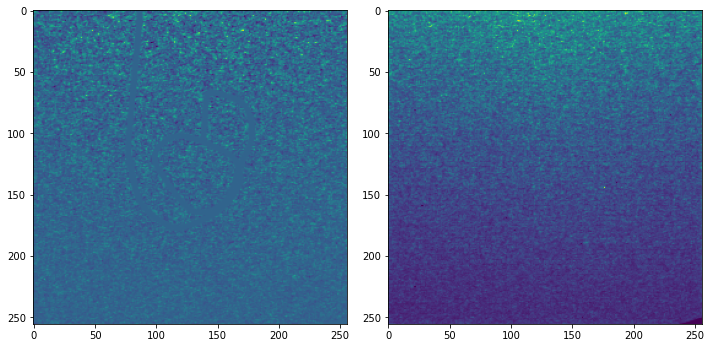

In [114]:

   #Ghost Imaging
    
#     ghost1=np.ndarray(shape=(256,256),dtype=np.float32)
#     ghost2=np.ndarray(shape=(256,256),dtype=np.float32)
#     term1_matrix=np.ndarray(shape=(256,256),dtype=np.float32)
#     term2_matrix=np.ndarray(shape=(256,256),dtype=np.float32)
#     term3_matrix=np.ndarray(shape=(256,256),dtype=np.float32)
start_time=time.time()
ghost1 = np.zeros([256,256])
ghost2 = np.zeros([256,256])
# term1_matrix = np.zeros([256,256])
# term2_matrix = np.zeros([256,256])
# term3_matrix = np.zeros([256,256])



nframes=len(pulses)/2



for i in range(ghost1.shape[0]):
    for j in range(ghost1.shape[1]):
        term1=0
        term2=0
        term3=0
        term=0
        print('[i,j]:','[',i,',',j,']')
        for pulse in range(0,len(pulses)-1,2):
#             obj_data = globals()['obj_data_pulse'+str(pulse)]
#             no_obj_data = globals()['no_obj_data_pulse'+str(pulse+1)]
#             obj_length = obj_data['#Col'].shape[0]
#             no_obj_length = no_obj_data['#Col'].shape[0]
#             print('','obj pulse #:', pulse,'\n', 'obj pulse #:', pulse+1)

#             img_obj = np.zeros([256,256])
#             img_no_obj = np.zeros([256,256])

#             x_obj = obj_data['#Row'].to_numpy()
#             y_obj = obj_data['#Col'].to_numpy()
#             tot_obj = obj_data['#ToT[arb]'].to_numpy()

#             for k in range(obj_length):
#                 i = x_obj[k]
#                 j = y_obj[k]
#                 img_obj[i][j] = img_obj[i][j] + tot_obj[k]


#             x_no_obj = no_obj_data['#Row'].to_numpy()
#             y_no_obj = no_obj_data['#Col'].to_numpy()
#             tot_no_obj = no_obj_data['#ToT[arb]'].to_numpy()

#             for k in range(no_obj_length):
#                 i = x_no_obj[k]
#                 j = y_no_obj[k]
#                 img_no_obj[i][j] = img_no_obj[i][j] + tot_no_obj[k]  

#             obj_data_sum = np.sum(img_obj)
#             no_obj_data_sum =np.sum(img_no_obj)
            term1+=globals()['no_obj_data_sum'+str(pulse+1)]*globals()['img_obj'+str(pulse)][i,j]
            term += globals()['obj_data_sum'+str(pulse)]*globals()['img_no_obj'+str(pulse+1)][i,j]
            term2+=globals()['no_obj_data_sum'+str(pulse+1)]
            term3+=globals()['img_obj'+str(pulse)][i,j]

        ghost1[i,j] = term1/nframes-(term2*term3)/ (nframes ** 2)
        ghost2[i,j] = term/nframes

end_time=time.time()
delta_t=end_time-start_time
print(delta_t, 's')
fig, (ax1,ax2) = plt.subplots(ncols=2,nrows=1, figsize=(10, 10), facecolor='w')

#     ax1.imshow(img_obj, norm=mpl.colors.LogNorm())

#     ax2.imshow(img_no_obj, norm=mpl.colors.LogNorm())

#h=ax[0].imshow(ghost1, norm=mpl.colors.LogNorm())
ax1.imshow(ghost1)
#     fig.colorbar(_)
ax2.imshow(ghost2)

fig.tight_layout()
fig.savefig(file+'_ghosts_pair.png', bbox_inches='tight')
plt.show() 

In [80]:
ON_data_sum = ON_data['#ToT[arb]'].sum()
print(ON_data_sum)
OFF_data_sum = OFF_data['#ToT[arb]'].sum()
print(OFF_data_sum)

2202630425
2303658525


In [65]:
ON_data = toa_section(data1, pulses[2][0], pulses[2][1])
OFF_data = toa_section(data1, pulses[3][0], pulses[3][1])

In [66]:
ON_data

,#Col,#Row,#ToA,#ToT[arb],#ToTtotal[arb],Unnamed: 5
14801985,189,51,4163274024448,350,350,NaN
14801986,181,190,4163278597376,250,250,NaN
14801987,242,57,4163281011968,325,325,NaN
14801988,187,195,4163283094784,225,225,NaN
14801989,187,194,4163283096064,200,200,NaN
...,...,...,...,...,...,...
22038915,128,52,4986698300928,250,250,NaN
22038916,50,74,4986698893056,125,125,NaN
22038917,50,75,4986698905856,50,50,NaN
22038918,227,27,4986699376896,425,425,NaN


In [67]:
OFF_data

,#Col,#Row,#ToA,#ToT[arb],#ToTtotal[arb],Unnamed: 5
22044799,244,112,5886214929920,325,325,NaN
22044800,188,90,5886214956288,375,375,NaN
22044801,169,51,5886215055360,450,450,NaN
22044802,131,36,5886215088896,425,425,NaN
22044803,35,121,5886215205120,325,325,NaN
...,...,...,...,...,...,...
29602129,105,169,6708351075840,400,400,NaN
29602130,173,62,6708351212800,200,200,NaN
29602131,174,62,6708351212800,300,300,NaN
29602132,31,26,6708351247872,375,375,NaN


In [68]:
ON_length = ON_data['#Col'].shape[0]
OFF_length = OFF_data['#Col'].shape[0]
print('ON length:',ON_length, 'OFF length:',OFF_length)

img_ON = np.zeros([256,256])
img_OFF = np.zeros([256,256])

x_ON = ON_data['#Row'].to_numpy()
y_ON = ON_data['#Col'].to_numpy()
tot_ON = ON_data['#ToT[arb]'].to_numpy()

for k in range(ON_length):
    i = x_ON[k]
    j = y_ON[k]
    img_ON[i][j] = img_ON[i][j] + tot_ON[k]


x_OFF = OFF_data['#Row'].to_numpy()
y_OFF = OFF_data['#Col'].to_numpy()
tot_OFF = OFF_data['#ToT[arb]'].to_numpy()

for k in range(OFF_length):
    i = x_OFF[k]
    j = y_OFF[k]
    img_OFF[i][j] = img_OFF[i][j] + tot_OFF[k]   

ON length: 7236935 OFF length: 7557335


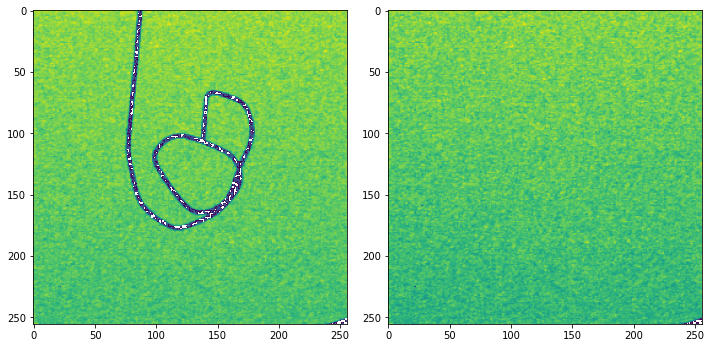

In [69]:
fig, (ax0, ax1) = plt.subplots(ncols=2,nrows=1, figsize=(10, 10), facecolor='w')

h=ax0.imshow(img_ON, norm=mpl.colors.LogNorm())
#fig.colorbar(_)

h=ax1.imshow(img_OFF, norm=mpl.colors.LogNorm())
#fig.colorbar(_)
#fig.colorbar(_)

fig.tight_layout()
fig.savefig(file+'_ToTs_pair1.png', bbox_inches='tight')
plt.show()

In [70]:
ON_sum = np.sum(img_ON)
OFF_sum = np.sum(img_OFF)

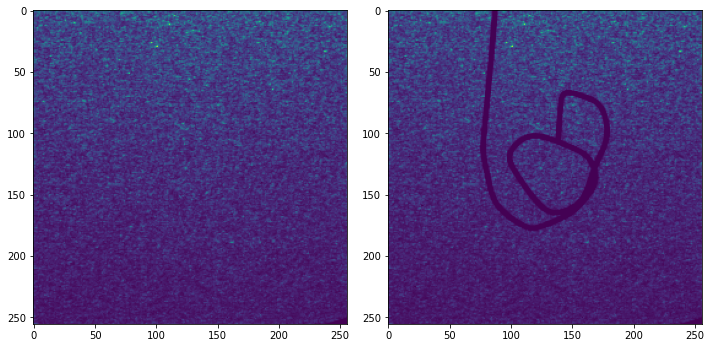

In [72]:
ghost11 = np.zeros([256,256])
ghost12 = np.zeros([256,256])

for i in range(ghost11.shape[0]):
    for j in range(ghost11.shape[1]):

        ghost11[i,j] = ON_sum*img_OFF[i,j]
        ghost12[i,j] = OFF_sum*img_ON[i,j]

        
        
fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(10, 10), facecolor='w')

#h=ax[0].imshow(ghost1, norm=mpl.colors.LogNorm())
h=ax[0].imshow(ghost11)
#fig.colorbar(_)

#h=ax[1].imshow(ghost2, norm=mpl.colors.LogNorm())
h=ax[1].imshow(ghost12)
#fig.colorbar(_)
#fig.colorbar(_)

fig.tight_layout()
# fig.savefig(file+'_ghosts_pair1.png', bbox_inches='tight')
plt.show()

In [63]:
for pulse in range(0,len(pulses)-1,2):
    print(pulse)
    print('pulses[',pulse,'][0], pulses[',pulse,'][1]')
    print(pulse+1)
    print('pulses[',pulse+1,'][0], pulses[',pulse+1,'][1]')
#     obj_data = toa_section(data1, pulses[pulse][0], pulses[pulse][1])
#     no_obj_data = toa_section(data1, pulses[pulse+1][0], pulses[pulse+1][1])
    

0
pulses[ 0 ][0], pulses[ 0 ][1]
1
pulses[ 1 ][0], pulses[ 1 ][1]
2
pulses[ 2 ][0], pulses[ 2 ][1]
3
pulses[ 3 ][0], pulses[ 3 ][1]
4
pulses[ 4 ][0], pulses[ 4 ][1]
5
pulses[ 5 ][0], pulses[ 5 ][1]
6
pulses[ 6 ][0], pulses[ 6 ][1]
7
pulses[ 7 ][0], pulses[ 7 ][1]
